# FIT5148 - Distributed Databases and Big Data

# Assignment 1 - Solution Workbook


**Instructions:**
- You will be using Python 3.
- Read the assignment instruction carefully and implement the algorithms in this workbook. 
- You can use the datasets fireData and climateData (provided below) if you are aiming for Credit Task.
- For Distinction and High Distinction tasks, you are required to read the files FireData.csv and ClimateData.CSV provided with the assignment programatically and prepare the data so that it can be used in your algorithm. 
- You can introduce new cells as necessary.

**Your details**
- Name: Pushan Mukerjee
- Student ID: 29052971

Let's get started!

In [1]:
#Libraries 
import pandas as pd
import datetime
import csv
import multiprocessing as mp # For multiprocessing
import matplotlib.pyplot as plt #For profiling the Fire data
import numpy as np
import os
import time


In [2]:
# You can use the datasets fireData and climateData to implement your algorithms
climateData = [['948700', '2016-12-31', '19', '56.8', '7.9', '11.1', ' 0.00I'], ['948700', '2017-01-02', '15', '50.7', '9.2', '13', ' 0.02G'], ['948700', '2017-01-03', '16', '53.6', '8.1', '15', ' 0.00G'], ['948700', '2017-01-04', '24', '61.6', '7.7', '14', ' 0.00I'], ['948700', '2017-01-05', '24', '62.3', '7', '13', ' 0.00I'], ['948700', '2017-01-06', '26', '60.8', '6.9', '12', ' 0.00I'], ['948700', '2017-01-07', '32', '54.1', '12.8', '19', ' 0.00I'], ['948700', '2017-01-08', '20', '57.7', '9.9', '18.1', ' 0.00I'], ['948700', '2017-01-09', '19', '56.3', '5.8', '8.9', ' 0.00I'], ['948700', '2017-01-10', '20', '57', '8.7', '13', ' 0.00I'], ['948700', '2017-01-11', '18', '53.3', '7.9', '14', ' 0.00I'], ['948700', '2017-01-12', '22', '56.3', '8', '13', ' 0.08G'], ['948700', '2017-01-13', '19', '54.1', '11.2', '18.1', ' 0.31G'], ['948700', '2017-01-14', '17', '50.4', '11.9', '16.9', ' 0.00G'], ['948700', '2017-01-15', '16', '50.8', '5.8', '12', ' 0.00I'], ['948700', '2017-01-16', '24', '55.4', '5.9', '9.9', ' 0.00I'], ['948700', '2017-01-17', '24', '53.4', '9.9', '15.9', ' 0.00I'], ['948700', '2017-01-18', '16', '46.7', '10', '16.9', ' 0.00I'], ['948700', '2017-01-19', '19', '57.2', '8.9', '15', ' 0.98G'], ['948700', '2017-01-20', '16', '50.9', '12.9', '21', ' 0.03G'], ['948700', '2017-01-21', '17', '52.5', '6.7', '12', ' 0.00G'], ['948700', '2017-01-22', '23', '59', '6', '12', ' 0.00I'], ['948700', '2017-01-23', '25', '58.3', '12.2', '22', ' 0.04G'], ['948700', '2017-01-24', '16', '48.2', '9.9', '18.1', ' 0.01G'], ['948700', '2017-01-25', '17', '50.8', '9', '15.9', ' 0.00G'], ['948700', '2017-01-26', '18', '53.5', '8.8', '13', ' 0.00I'], ['948700', '2017-01-27', '19', '56.1', '6.9', '12', ' 0.00A'], ['948700', '2017-01-28', '18', '57', '7.4', '15', ' 0.00I'], ['948700', '2017-01-29', '22', '58', '6.9', '12', ' 0.00I'], ['948700', '2017-01-30', '20', '55.8', '10.5', '15.9', ' 0.01G'], ['948700', '2017-01-31', '16', '48.4', '8.1', '15.9', ' 0.00G'], ['948700', '2017-02-01', '16', '48.9', '5.4', '8.9', ' 0.00I'], ['948700', '2017-02-02', '18', '53', '6.6', '14', ' 0.00I'], ['948700', '2017-02-03', '18', '54.4', '5.7', '9.9', ' 0.00I'], ['948700', '2017-02-04', '26', '53.7', '8.7', '15', ' 0.00I'], ['948700', '2017-02-05', '21', '64.5', '10.6', '15.9', ' 1.26G'], ['948700', '2017-02-06', '16', '48.1', '9.3', '12', ' 0.00G'], ['948700', '2017-02-07', '20', '57.4', '10.9', '22', ' 0.00I'], ['948700', '2017-02-08', '31', '61.9', '14.1', '23.9', ' 0.00I'], ['948700', '2017-02-09', '22', '62.7', '7.6', '18.1', ' 0.00I'], ['948700', '2017-02-10', '21', '60.4', '6.8', '12', ' 0.00I'], ['948700', '2017-02-11', '19', '53.8', '9.2', '15', ' 0.02G'], ['948700', '2017-02-12', '16', '48.3', '14.4', '19', ' 0.00G'], ['948700', '2017-02-13', '16', '53.6', '12.1', '16.9', ' 0.16G'], ['948700', '2017-02-14', '14', '48.5', '7.3', '14', ' 0.00G'], ['948700', '2017-02-15', '22', '53.4', '10.9', '19', ' 0.00I'], ['948700', '2017-02-16', '18', '53.6', '7.2', '15', ' 0.00I'], ['948700', '2017-02-17', '18', '49.4', '9.3', '13', ' 0.00I'], ['948700', '2017-02-18', '15', '44.6', '9.7', '12', ' 0.02G'], ['948700', '2017-02-19', '13', '48.5', '10.7', '14', ' 0.71G'], ['948701', '2017-02-20', '15', '49.1', '9.6', '16.9', ' 0.01G'], ['948701', '2017-02-21', '16', '51', '6', '13', ' 0.00G'], ['948701', '2017-02-22', '23', '49.6', '10', '19', ' 0.00I'], ['948701', '2017-02-23', '18', '55.5', '8.9', '15', ' 0.01G'], ['948701', '2017-02-24', '16', '48.3', '9.4', '14', ' 0.01G'], ['948701', '2017-02-25', '17', '52.6', '10.3', '15.9', ' 0.00G'], ['948701', '2017-02-26', '21', '54.9', '7.4', '16.9', ' 0.00I'], ['948701', '2017-02-27', '24', '55.6', '5.9', '13', ' 0.00I'], ['948701', '2017-02-28', '23', '54.1', '5.7', '14', ' 0.00I'], ['948701', '2017-03-01', '21', '57.3', '5.4', '9.9', ' 0.00I'], ['948701', '2017-03-02', '20', '62.6', '10.1', '15', ' 0.00I'], ['948701', '2017-03-03', '21', '59.5', '12.4', '21', ' 0.00I'], ['948701', '2017-03-04', '22', '62', '7.9', '11.1', ' 0.00I'], ['948701', '2017-03-05', '20', '58.8', '11.5', '15.9', ' 0.00I'], ['948701', '2017-03-06', '20', '52.9', '17', '21', ' 0.00I'], ['948701', '2017-03-07', '19', '51.5', '10.2', '20', ' 0.00I'], ['948701', '2017-03-08', '21', '51.7', '7.2', '13', ' 0.00I'], ['948701', '2017-03-09', '23', '53.4', '6.1', '11.1', ' 0.00I'], ['948701', '2017-03-10', '19', '60.2', '6.4', '12', ' 0.00I'], ['948701', '2017-03-11', '20', '59.7', '8.6', '15.9', ' 0.01G'], ['948701', '2017-03-12', '21', '58.1', '5.3', '11.1', ' 0.00G'], ['948701', '2017-03-13', '20', '62.2', '7.1', '15', ' 0.00I'], ['948701', '2017-03-14', '25', '58.3', '7.1', '13', ' 0.00I'], ['948701', '2017-03-15', '28', '58.4', '11.9', '18.1', ' 0.04G'], ['948701', '2017-03-16', '18', '53.3', '10.8', '15', ' 0.00G'], ['948701', '2017-03-17', '18', '51.1', '8.1', '15', ' 0.00I'], ['948701', '2017-03-18', '21', '52.8', '4.1', '11.1', ' 0.00I'], ['948701', '2017-03-19', '24', '55.2', '5.8', '11.1', ' 0.00I'], ['948701', '2017-03-20', '23', '63.8', '7.1', '15.9', ' 0.08G'], ['948701', '2017-03-21', '20', '67.4', '8.5', '14', ' 0.63G'], ['948701', '2017-03-22', '18', '57.5', '16.1', '21', ' 0.00G'], ['948701', '2017-03-23', '18', '55.6', '12.8', '19', ' 0.00I'], ['948701', '2017-03-24', '20', '58.4', '6.1', '11.1', ' 0.00I'], ['948701', '2017-03-25', '23', '61.9', '8', '15.9', ' 0.00I'], ['948701', '2017-03-26', '23', '60.6', '10.1', '26', ' 0.00I'], ['948701', '2017-03-27', '17', '53.4', '9.4', '25.1', ' 0.16G'], ['948701', '2017-03-28', '18', '50.6', '6', '13', ' 0.00G'], ['948701', '2017-03-29', '17', '49.9', '12.2', '21', ' 0.24G'], ['948701', '2017-03-30', '13', '47', '7.9', '15', ' 0.02G'], ['948701', '2017-03-31', '14', '45.8', '6.5', '9.9', ' 0.00G'], ['948701', '2017-04-01', '14', '45.7', '9.2', '15.9', ' 0.00I'], ['948701', '2017-04-02', '12', '43.4', '9.3', '15', ' 0.00I'], ['948701', '2017-04-03', '15', '47.7', '5.9', '13', ' 0.00I'], ['948701', '2017-04-04', '16', '47.5', '5.4', '12', ' 0.00I'], ['948701', '2017-04-05', '17', '47.2', '4.9', '13', ' 0.00I'], ['948701', '2017-04-06', '19', '44.2', '7.8', '15.9', ' 0.00I'], ['948701', '2017-04-07', '21', '47', '13.2', '20', ' 0.00I'], ['948701', '2017-04-08', '19', '52.8', '12.5', '21', ' 0.47G'], ['948701', '2017-04-09', '11', '48.2', '10.8', '22.9', ' 0.59G'], ['948701', '2017-04-10', '14', '50.4', '12.8', '20', ' 0.01G'], ['948701', '2017-04-11', '14', '52.5', '7', '13', ' 0.00G'], ['948701', '2017-04-12', '14', '52.4', '6.7', '11.1', ' 0.00I'], ['948701', '2017-04-13', '16', '54.9', '5.9', '9.9', ' 0.00I'], ['948701', '2017-04-14', '13', '48.5', '5.3', '11.1', ' 0.08G'], ['948701', '2017-04-15', '12', '44', '4.7', '7', ' 0.00G'], ['948701', '2017-04-16', '15', '49.3', '3.6', '7', ' 0.00I'], ['948701', '2017-04-17', '13', '51.4', '4.6', '8.9', ' 0.00I'], ['948701', '2017-04-18', '15', '56.1', '5.1', '9.9', ' 0.00I'], ['948701', '2017-04-19', '22', '52.8', '9.1', '15', ' 0.00I'], ['948701', '2017-04-20', '20', '53.5', '7.2', '15.9', ' 0.31G'], ['948701', '2017-04-21', '17', '58.1', '11.7', '19', ' 0.04G'], ['948701', '2017-04-22', '18', '58.9', '5.5', '14', ' 0.08G'], ['948701', '2017-04-23', '17', '59.3', '4.2', '7', ' 0.01G'], ['948701', '2017-04-24', '19', '60.5', '7', '11.1', ' 0.83G'], ['948701', '2017-04-25', '14', '52.8', '9.3', '18.1', ' 0.98G'], ['948701', '2017-04-26', '11', '40.8', '12.2', '20', ' 0.24G'], ['948701', '2017-04-27', '12', '48.2', '7.3', '11.1', ' 0.03G'], ['948701', '2017-04-28', '16', '54.8', '8.3', '9.9', ' 0.00G'], ['948701', '2017-04-29', '15', '51.9', '6.6', '12', ' 0.01G'], ['948701', '2017-04-30', '15', '45.6', '10.2', '15', ' 0.00G'], ['948701', '2017-05-01', '14', '49.2', '10.5', '20', ' 0.12G'], ['948701', '2017-05-02', '10', '42.6', '8.9', '15', ' 0.04G'], ['948701', '2017-05-03', '10', '43.1', '4.7', '8', ' 0.00G'], ['948701', '2017-05-04', '10', '43.3', '2.6', '7', ' 0.00I'], ['948701', '2017-05-05', '14', '47.4', '7.1', '14', ' 0.00I'], ['948701', '2017-05-06', '12', '45.1', '11.9', '18.1', ' 0.16G'], ['948701', '2017-05-07', '12', '45', '10.5', '16.9', ' 0.16G'], ['948701', '2017-05-08', '12', '49.9', '6.1', '13', ' 0.02G'], ['948701', '2017-05-09', '12', '49', '4.6', '8.9', ' 0.00G'], ['948701', '2017-05-10', '10', '45.7', '3.7', '8', ' 0.01G'], ['948701', '2017-05-11', '9', '45.3', '2.5', '6', ' 0.00G'], ['948701', '2017-05-12', '14', '47.9', '5.3', '9.9', ' 0.00I'], ['948701', '2017-05-13', '9', '44', '2.8', '8', ' 0.00I'], ['948701', '2017-05-14', '10', '46.8', '5.3', '9.9', ' 0.00I'], ['948701', '2017-05-15', '10', '47', '5.2', '8.9', ' 0.00I'], ['948701', '2017-05-16', '12', '48.8', '4.2', '7', ' 0.00I'], ['948701', '2017-05-17', '13', '49.4', '3.8', '9.9', ' 0.01G'], ['948701', '2017-05-18', '14', '49.9', '6.8', '15.9', ' 0.00G'], ['948701', '2017-05-19', '12', '51.6', '3.4', '11.1', ' 0.05G'], ['948701', '2017-05-20', '14', '50.1', '8.7', '15', ' 0.00G'], ['948701', '2017-05-21', '14', '51', '9.9', '15', ' 0.00I'], ['948701', '2017-05-22', '17', '48.7', '10.5', '15', ' 0.00I'], ['948701', '2017-05-23', '15', '49.9', '7.9', '13', ' 0.01G'], ['948701', '2017-05-24', '14', '48.4', '7.5', '13', ' 0.00G'], ['948701', '2017-05-25', '14', '50.7', '8.6', '13', ' 0.12G'], ['948701', '2017-05-26', '13', '48.5', '7.1', '15.9', ' 0.00G'], ['948701', '2017-05-27', '14', '48.1', '13.7', '19', ' 0.35G'], ['948701', '2017-05-28', '9', '41.2', '10', '13', ' 0.02G'], ['948701', '2017-05-29', '12', '42.8', '12.1', '19', ' 0.04G'], ['948701', '2017-05-30', '8', '41.6', '8.3', '15.9', ' 0.24G'], ['948701', '2017-05-31', '11', '43.8', '6.5', '12', ' 0.02G'], ['948701', '2017-06-01', '11', '43.2', '5.5', '8', ' 0.00G'], ['948701', '2017-06-02', '12', '47', '4.8', '8.9', ' 0.00I'], ['948701', '2017-06-03', '8', '43.3', '3.9', '8', ' 0.00I'], ['948701', '2017-06-04', '9', '43.2', '4.9', '8', ' 0.00I'], ['948701', '2017-06-05', '12', '47.6', '9.1', '13', ' 0.12G'], ['948701', '2017-06-06', '9', '40.8', '6.7', '15', ' 0.01G'], ['948701', '2017-06-07', '8', '40.7', '5.3', '12', ' 0.00G'], ['948701', '2017-06-08', '10', '46.3', '4.6', '8', ' 0.08G'], ['948701', '2017-06-09', '10', '47.1', '4.6', '8.9', ' 0.00G'], ['948701', '2017-06-10', '8', '44.5', '4.7', '7', ' 0.01G'], ['948701', '2017-06-11', '10', '44.9', '5.5', '8.9', ' 0.00G'], ['948701', '2017-06-12', '12', '49.4', '4.4', '8.9', ' 0.00I'], ['948701', '2017-06-13', '8', '43.1', '3.4', '7', ' 0.00I'], ['948701', '2017-06-14', '11', '46.4', '6.5', '8.9', ' 0.00I'], ['948701', '2017-06-15', '11', '45.4', '5.2', '8.9', ' 0.00A'], ['948701', '2017-06-16', '8', '42.6', '2', '6', ' 0.00I'], ['948701', '2017-06-17', '10', '45.6', '4.5', '7', ' 0.00I'], ['948701', '2017-06-18', '10', '47.9', '4.1', '7', ' 0.00I'], ['948701', '2017-06-19', '11', '45.1', '5.6', '9.9', ' 0.00I'], ['948701', '2017-06-20', '11', '45.3', '10.6', '16.9', ' 0.08G'], ['948701', '2017-06-21', '10', '45.9', '3.2', '7', ' 0.00G'], ['948701', '2017-06-22', '10', '41.4', '9.4', '14', ' 0.00I'], ['948701', '2017-06-23', '11', '43.9', '11.2', '16.9', ' 0.12G'], ['948701', '2017-06-24', '10', '37.9', '8.5', '14', ' 0.02G'], ['948701', '2017-06-25', '11', '44.2', '8.7', '15.9', ' 0.04G'], ['948701', '2017-06-26', '10', '45.7', '3.6', '7', ' 0.01G'], ['948701', '2017-06-27', '9', '41', '8.2', '9.9', ' 0.00G'], ['948701', '2017-06-28', '10', '43.7', '7.2', '11.1', ' 0.00I'], ['948701', '2017-06-29', '10', '42.1', '9.4', '15', ' 0.13B'], ['948701', '2017-06-30', '5', '34.9', '4.3', '11.1', ' 0.00A'], ['948701', '2017-07-01', '5', '33.1', '5.8', '14', ' 0.00I'], ['948701', '2017-07-02', '6', '30.8', '5.7', '11.1', ' 0.00I'], ['948701', '2017-07-03', '11', '45.1', '11.5', '18.1', ' 0.20G'], ['948701', '2017-07-04', '12', '47.2', '8.8', '15', ' 0.00G'], ['948701', '2017-07-05', '9', '42.4', '7.2', '9.9', ' 0.00I'], ['948701', '2017-07-06', '9', '40.1', '7.5', '11.1', ' 0.00I'], ['948701', '2017-07-07', '9', '41.2', '9.8', '15.9', ' 0.00I'], ['948701', '2017-07-08', '9', '42.8', '9.3', '13', ' 0.08G'], ['948701', '2017-07-09', '10', '39.4', '9.6', '14', ' 0.00G'], ['948701', '2017-07-10', '10', '44.4', '5.6', '11.1', ' 0.12G'], ['948701', '2017-07-11', '6', '39', '1.8', '5.1', ' 0.01G'], ['948701', '2017-07-12', '9', '39', '5.6', '8.9', ' 0.00G'], ['948701', '2017-07-13', '12', '40.7', '16.7', '21', ' 0.12G'], ['948701', '2017-07-14', '9', '40', '8.6', '15', ' 0.00G'], ['948701', '2017-07-15', '6', '37.1', '5.8', '9.9', ' 0.00I'], ['948701', '2017-07-16', '10', '35.6', '14.5', '20', ' 0.00I'], ['948701', '2017-07-17', '12', '41.8', '14.7', '21', ' 0.00I'], ['948701', '2017-07-18', '10', '44.8', '8.8', '14', ' 0.39G'], ['948701', '2017-07-19', '10', '43.5', '12', '16.9', ' 0.04G'], ['948701', '2017-07-20', '7', '40.5', '8.1', '15', ' 0.12G'], ['948701', '2017-07-21', '8', '39.3', '7.7', '14', ' 0.00G'], ['948701', '2017-07-22', '11', '35.3', '18.2', '25.1', ' 0.00I'], ['948701', '2017-07-23', '10', '44.7', '8', '15.9', ' 0.08G'], ['948701', '2017-07-24', '12', '44.7', '11.4', '18.1', ' 0.00G'], ['948701', '2017-07-25', '13', '44', '13.6', '21', ' 0.04G'], ['948701', '2017-07-26', '8', '43.8', '7.3', '14', ' 0.08G'], ['948701', '2017-07-27', '11', '43.5', '13.1', '21', ' 0.24G'], ['948701', '2017-07-28', '11', '40.5', '13.4', '26', ' 0.00G'], ['948701', '2017-07-29', '15', '41.5', '17', '28.9', ' 0.00I'], ['948701', '2017-07-30', '9', '42', '4.6', '12', ' 0.00I'], ['948701', '2017-07-31', '7', '40.5', '3.1', '8', ' 0.00I'], ['948701', '2017-08-01', '7', '40.7', '3.7', '7', ' 0.00I'], ['948701', '2017-08-02', '5', '38.6', '1.8', '5.1', ' 0.00I'], ['948701', '2017-08-03', '8', '44.6', '3.9', '8', ' 0.39G'], ['948702', '2017-08-04', '10', '41', '14.1', '20', ' 0.02G'], ['948702', '2017-08-05', '11', '40.4', '19.3', '26', ' 0.00G'], ['948702', '2017-08-06', '9', '41.1', '12.7', '19', ' 0.24G'], ['948702', '2017-08-07', '9', '42.9', '8.9', '15.9', ' 0.12G'], ['948702', '2017-08-08', '12', '44.9', '7.9', '11.1', ' 0.00G'], ['948702', '2017-08-09', '14', '43.7', '17', '27', ' 0.00I'], ['948702', '2017-08-10', '15', '41.6', '15', '28', ' 0.00I'], ['948702', '2017-08-11', '12', '43.9', '12', '15.9', ' 0.08G'], ['948702', '2017-08-12', '12', '47', '7.7', '15', ' 0.08G'], ['948702', '2017-08-13', '15', '41.2', '13.8', '16.9', ' 0.00G'], ['948702', '2017-08-14', '14', '44.6', '7.7', '15.9', ' 0.03G'], ['948702', '2017-08-15', '14', '49.9', '13.7', '22', ' 0.03G'], ['948702', '2017-08-16', '13', '42.5', '14', '19', ' 0.04G'], ['948702', '2017-08-17', '10', '39.9', '12.6', '16.9', ' 0.08G'], ['948702', '2017-08-18', '8', '41', '11', '16.9', ' 0.47G'], ['948702', '2017-08-19', '7', '37.9', '5.7', '9.9', ' 0.04G'], ['948702', '2017-08-20', '8', '37.2', '5.5', '11.1', ' 0.00G'], ['948702', '2017-08-21', '9', '40.4', '6.9', '9.9', ' 0.02G'], ['948702', '2017-08-22', '12', '43.3', '7', '11.1', ' 0.00G'], ['948702', '2017-08-23', '10', '44.1', '7.3', '12', ' 0.39G'], ['948702', '2017-08-24', '9', '42.2', '6.4', '9.9', ' 0.01G'], ['948702', '2017-08-25', '12', '40.4', '5.9', '8.9', ' 0.00G'], ['948702', '2017-08-26', '11', '39.7', '11.8', '19', ' 0.28G'], ['948702', '2017-08-27', '7', '37.2', '6.2', '16.9', ' 0.08G'], ['948702', '2017-08-28', '8', '40.8', '5.5', '9.9', ' 0.01G'], ['948702', '2017-08-29', '10', '41.4', '6.9', '8.9', ' 0.00G'], ['948702', '2017-08-30', '8', '39.3', '4.7', '13', ' 0.02G'], ['948702', '2017-08-31', '8', '36.3', '6.3', '13', ' 0.01G'], ['948702', '2017-09-01', '13', '38.4', '11.5', '16.9', ' 0.00G'], ['948702', '2017-09-02', '17', '38.7', '16.8', '22.9', ' 0.00I'], ['948702', '2017-09-03', '12', '41', '12.9', '16.9', ' 0.16G'], ['948702', '2017-09-04', '8', '35', '14.4', '20', ' 0.00G'], ['948702', '2017-09-05', '8', '38.6', '12.8', '18.1', ' 0.31G'], ['948702', '2017-09-06', '10', '43.7', '9.5', '13', ' 0.08G'], ['948702', '2017-09-07', '10', '43.6', '9.7', '14', ' 0.20G'], ['948702', '2017-09-08', '9', '41.9', '9.2', '14', ' 0.12G'], ['948702', '2017-09-09', '9', '43.9', '5.7', '9.9', ' 0.00G'], ['948702', '2017-09-10', '11', '41.7', '8.7', '19', ' 0.00I'], ['948702', '2017-09-11', '14', '47.4', '10.6', '19', ' 0.03G'], ['948702', '2017-09-12', '13', '51.1', '6', '13', ' 0.12G'], ['948702', '2017-09-13', '9', '40.1', '12.1', '15', ' 0.08G'], ['948702', '2017-09-14', '12', '44.5', '11.1', '15', ' 0.00G'], ['948702', '2017-09-15', '11', '46.2', '10.5', '15', ' 0.28G'], ['948702', '2017-09-16', '9', '37.9', '9.1', '15.9', ' 0.00G'], ['948702', '2017-09-17', '14', '36', '15.9', '22', ' 0.00I'], ['948702', '2017-09-18', '14', '39.3', '17.7', '30.9', ' 0.01G'], ['948702', '2017-09-19', '9', '41.2', '6.7', '13', ' 0.01G'], ['948702', '2017-09-20', '14', '41.7', '12.3', '18.1', ' 0.00G'], ['948702', '2017-09-21', '15', '47.3', '8.6', '22.9', ' 0.00I'], ['948702', '2017-09-22', '20', '43.6', '10.3', '15', ' 0.00I'], ['948702', '2017-09-23', '17', '46.3', '11.7', '20', ' 0.02G'], ['948702', '2017-09-24', '14', '44', '14.4', '23.9', ' 0.16G'], ['948702', '2017-09-25', '9', '42.1', '7.6', '12', ' 0.01G'], ['948702', '2017-09-26', '11', '40.8', '6.4', '8.9', ' 0.00G'], ['948702', '2017-09-27', '15', '44.8', '8.3', '19', ' 0.00I'], ['948702', '2017-09-28', '13', '43.6', '9', '15', ' 0.00I'], ['948702', '2017-09-29', '14', '41.6', '13.1', '18.1', ' 0.00I'], ['948702', '2017-09-30', '11', '41.6', '7.9', '15', ' 0.01G'], ['948702', '2017-10-01', '12', '47.9', '6.7', '11.1', ' 0.00G'], ['948702', '2017-10-02', '11', '44.2', '5.8', '9.9', ' 0.00I'], ['948702', '2017-10-03', '13', '46.2', '5.6', '12', ' 0.00I'], ['948702', '2017-10-04', '19', '50.3', '7.7', '11.1', ' 0.00I'], ['948702', '2017-10-05', '12', '47.5', '15', '18.1', ' 0.20G'], ['948702', '2017-10-06', '11', '45.3', '8.5', '15', ' 0.00G'], ['948702', '2017-10-07', '17', '46.4', '9.5', '20', ' 0.00I'], ['948702', '2017-10-08', '18', '54.6', '12', '25.1', ' 0.12G'], ['948702', '2017-10-09', '12', '44.4', '7.8', '14', ' 0.00G'], ['948702', '2017-10-10', '13', '42.5', '8', '15', ' 0.00I'], ['948702', '2017-10-11', '15', '48.2', '14.7', '25.1', ' 0.43G'], ['948702', '2017-10-12', '15', '44.5', '10.2', '14', ' 0.00G'], ['948702', '2017-10-13', '12', '44.2', '6.2', '15', ' 0.00I'], ['948702', '2017-10-14', '11', '43.2', '5.9', '14', ' 0.00I'], ['948702', '2017-10-15', '13', '50.7', '6.1', '13', ' 0.00I'], ['948702', '2017-10-16', '19', '54.3', '5.9', '12', ' 0.00I'], ['948702', '2017-10-17', '22', '46.8', '8', '16.9', ' 0.00I'], ['948702', '2017-10-18', '26', '52.2', '13.7', '16.9', ' 0.00I'], ['948702', '2017-10-19', '15', '51', '9.6', '15.9', ' 0.16G'], ['948702', '2017-10-20', '13', '42', '11.4', '16.9', ' 0.00G'], ['948702', '2017-10-21', '12', '47.3', '9.7', '14', ' 0.02G'], ['948702', '2017-10-22', '13', '50.3', '8.6', '13', ' 0.02G'], ['948702', '2017-10-23', '14', '49.5', '6', '12', ' 0.00G'], ['948702', '2017-10-24', '15', '53.7', '6.8', '11.1', ' 0.51G'], ['948702', '2017-10-25', '14', '51', '9.1', '12', ' 0.00G'], ['948702', '2017-10-26', '13', '50.4', '7.9', '14', ' 0.00I'], ['948702', '2017-10-27', '22', '46.9', '12.9', '19', ' 0.00I'], ['948702', '2017-10-28', '15', '48.7', '8.5', '20', ' 0.01G'], ['948702', '2017-10-29', '17', '44.9', '16.1', '27', ' 0.24G'], ['948702', '2017-10-30', '11', '43.2', '8.1', '14', ' 0.20G'], ['948702', '2017-10-31', '13', '47.1', '8.1', '12', ' 0.01G'], ['948702', '2017-11-01', '13', '50.1', '8.5', '12', ' 0.08G'], ['948702', '2017-11-02', '12', '43.8', '6.7', '14', ' 0.16G'], ['948702', '2017-11-03', '11', '40.4', '9.2', '15', ' 0.04G'], ['948702', '2017-11-04', '11', '41.4', '7.7', '15', ' 0.03G'], ['948702', '2017-11-05', '13', '43.3', '9.4', '14', ' 0.00G'], ['948702', '2017-11-06', '13', '44.1', '12.9', '19', ' 0.02G'], ['948702', '2017-11-07', '12', '42.7', '10', '15.9', ' 0.01G'], ['948702', '2017-11-08', '12', '46.6', '6.7', '14', ' 0.00G'], ['948702', '2017-11-09', '14', '50.9', '5.9', '13', ' 0.00I'], ['948702', '2017-11-10', '18', '53.8', '6.4', '11.1', ' 0.00I'], ['948702', '2017-11-11', '18', '55.6', '8.2', '12', ' 0.00I'], ['948702', '2017-11-12', '18', '53.8', '6.7', '14', ' 0.00I'], ['948702', '2017-11-13', '24', '51.9', '7.3', '13', ' 0.00I'], ['948702', '2017-11-14', '28', '48.3', '11.9', '22', ' 0.00I'], ['948702', '2017-11-15', '21', '58.8', '8.8', '22.9', ' 0.08G'], ['948702', '2017-11-16', '18', '61.5', '5.5', '11.1', ' 0.28G'], ['948702', '2017-11-17', '19', '58.7', '5.5', '12', ' 0.28G'], ['948702', '2017-11-18', '20', '58.4', '4.7', '11.1', ' 0.01G'], ['948702', '2017-11-19', '22', '57', '8.5', '15', ' 0.00G'], ['948702', '2017-11-20', '24', '55.5', '7.9', '15', ' 0.00I'], ['948702', '2017-11-21', '24', '51.8', '7.9', '15', ' 0.00I'], ['948702', '2017-11-22', '23', '49.6', '6.3', '13', ' 0.00I'], ['948702', '2017-11-23', '24', '56.8', '5.7', '9.9', ' 0.00I'], ['948702', '2017-11-24', '23', '58.8', '9.1', '15', ' 0.01G'], ['948702', '2017-11-25', '24', '60.1', '8', '13', ' 0.12G'], ['948702', '2017-11-26', '20', '60.8', '10.4', '16.9', ' 0.08G'], ['948702', '2017-11-27', '17', '52.7', '7.7', '14', ' 0.00G'], ['948702', '2017-11-28', '23', '58.8', '8.8', '15', ' 0.00I'], ['948702', '2017-11-29', '28', '56.7', '9.3', '16.9', ' 0.00I'], ['948702', '2017-11-30', '26', '61', '9.3', '15', ' 0.20G'], ['948702', '2017-12-01', '17', '59', '9.4', '15', ' 0.75G'], ['948702', '2017-12-02', '15', '56.2', '16.9', '20', ' 1.77G'], ['948702', '2017-12-03', '14', '48.2', '12.5', '19', ' 0.03G'], ['948702', '2017-12-04', '14', '48.2', '9.1', '15', ' 0.00G'], ['948702', '2017-12-05', '17', '53', '14.6', '22.9', ' 0.00I'], ['948702', '2017-12-06', '16', '51.7', '7.4', '15', ' 0.00I'], ['948702', '2017-12-07', '15', '51', '9', '13', ' 1.26G'], ['948702', '2017-12-08', '15', '48.1', '7.9', '12', ' 0.00G'], ['948702', '2017-12-09', '17', '53.6', '7.6', '15', ' 0.00I'], ['948702', '2017-12-10', '17', '53.5', '7.3', '14', ' 0.00I'], ['948702', '2017-12-11', '17', '52', '8.8', '15', ' 0.00I'], ['948702', '2017-12-12', '19', '55.3', '6.2', '12', ' 0.00I'], ['948702', '2017-12-13', '28', '49.9', '11', '19', ' 0.00I'], ['948702', '2017-12-14', '17', '52.5', '7.7', '16.9', ' 0.00I'], ['948702', '2017-12-15', '18', '52', '7.1', '14', ' 0.00I'], ['948702', '2017-12-16', '18', '53.7', '9', '13', ' 0.00I'], ['948702', '2017-12-17', '21', '58.7', '7.8', '13', ' 0.00I'], ['948702', '2017-12-18', '25', '60.9', '6.3', '8.9', ' 0.00I'], ['948702', '2017-12-19', '21', '57.4', '10.7', '22.9', ' 0.67G'], ['948702', '2017-12-20', '17', '51.2', '9.9', '18.1', ' 0.00G'], ['948702', '2017-12-21', '17', '52.5', '5.7', '11.1', ' 0.00I'], ['948702', '2017-12-22', '19', '55.8', '6', '11.1', ' 0.00I'], ['948702', '2017-12-23', '19', '53.9', '8.3', '14', ' 0.00I'], ['948702', '2017-12-24', '16', '47', '12', '16.9', ' 0.00I'], ['948702', '2017-12-25', '17', '50.4', '10.8', '16.9', ' 0.00I'], ['948702', '2017-12-26', '22', '55.5', '10.3', '19', ' 0.00I'], ['948702', '2017-12-27', '28', '58.3', '9.3', '15.9', ' 0.00I'], ['948702', '2017-12-28', '21', '61.1', '6.6', '11.1', ' 0.00I'], ['948702', '2017-12-29', '19', '59.7', '7.4', '14', ' 0.63G'], ['948702', '2017-12-30', '16', '51.5', '8.7', '15', ' 0.02G'], ['948702', '2017-12-31', '18', '53.6', '7.9', '15.9', ' 0.00G'], ['948702', '2018-01-01', '19', '52.9', '8.1', '15', ' 0.00I']]
fireData = [['-37.966', '145.051', '341.8', '2017-12-27T04:16:51', '26.7', '78', '2017-12-27', '68'], ['-35.541', '143.311', '336.3', '2017-12-27T00:02:15', '62', '82', '2017-12-27', '63'], ['-35.554', '143.307', '326.8', '2017-12-27T00:02:15', '23.8', '67', '2017-12-27', '53'], ['-35.543', '143.316', '340.4', '2017-12-27T00:02:14', '84.2', '86', '2017-12-27', '67'], ['-37.708', '145.1', '327.8', '2017-12-25T04:29:08', '16.2', '80', '2017-12-25', '54'], ['-35.646', '142.282', '305.6', '2017-12-24T13:12:01', '11.8', '65', '2017-12-24', '32'], ['-38.075', '143.76', '320.1', '2017-12-21T04:53:29', '17.6', '72', '2017-12-21', '46'], ['-37.636', '149.33', '316.7', '2017-12-16T15:38:39', '37.1', '94', '2017-12-16', '43'], ['-37.624', '149.332', '306.8', '2017-12-16T15:38:39', '20.8', '69', '2017-12-16', '33'], ['-37.82', '142.323', '327.6', '2017-12-16T04:35:15', '18.9', '62', '2017-12-16', '54'], ['-37.875', '142.51', '346.2', '2017-12-16T04:35:13', '46', '93', '2017-12-16', '73'], ['-37.608', '149.328', '328.3', '2017-12-16T04:34:58', '69.3', '84', '2017-12-16', '55'], ['-37.613', '149.305', '348.2', '2017-12-16T04:34:58', '160.9', '95', '2017-12-16', '75'], ['-37.644', '149.346', '328.9', '2017-12-16T04:34:57', '63.5', '59', '2017-12-16', '55'], ['-37.624', '149.314', '340.1', '2017-12-16T04:34:57', '113.1', '90', '2017-12-16', '66'], ['-37.661', '149.327', '329.7', '2017-12-16T04:34:57', '64.4', '75', '2017-12-16', '56'], ['-37.649', '149.322', '333.8', '2017-12-16T04:34:57', '78.9', '79', '2017-12-16', '60'], ['-38.057', '144.211', '346.3', '2017-12-16T00:21:12', '48.8', '93', '2017-12-16', '73'], ['-38.046', '144.201', '322', '2017-12-16T00:21:11', '11.8', '60', '2017-12-16', '48'], ['-38.048', '144.213', '329', '2017-12-16T00:21:11', '20', '82', '2017-12-16', '55'], ['-37.651', '149.345', '337.8', '2017-12-16T00:20:53', '42.2', '82', '2017-12-16', '64'], ['-37.63', '149.335', '330.7', '2017-12-16T00:20:53', '27.8', '53', '2017-12-16', '57'], ['-37.627', '149.33', '315.9', '2017-12-15T13:17:17', '23.1', '92', '2017-12-15', '42'], ['-37.658', '149.339', '309.8', '2017-12-15T13:17:17', '17.3', '78', '2017-12-15', '36'], ['-37.623', '149.323', '311.9', '2017-12-15T13:17:17', '17.8', '51', '2017-12-15', '38'], ['-38.038', '142.986', '313.4', '2017-12-15T01:16:23', '32.8', '65', '2017-12-15', '40'], ['-37.95', '142.366', '343.2', '2017-12-14T04:47:25', '58.7', '92', '2017-12-14', '70'], ['-38.231', '147.172', '333.3', '2017-12-13T04:04:19', '17.9', '83', '2017-12-13', '60'], ['-37.903', '145.25', '317.7', '2017-12-12T00:45:38', '10.4', '53', '2017-12-12', '44'], ['-37.987', '144.005', '311.2', '2017-12-10T00:57:59', '10.4', '50', '2017-12-10', '38'], ['-34.289', '141.712', '327.7', '2017-12-10T00:56:57', '12.3', '67', '2017-12-10', '54'], ['-36.294', '146.149', '335.1', '2017-12-09T00:14:34', '28.7', '87', '2017-12-09', '61'], ['-36.285', '146.151', '327.8', '2017-12-09T00:14:34', '18.2', '81', '2017-12-09', '54'], ['-36.277', '146.165', '331.8', '2017-12-09T00:14:33', '24.5', '84', '2017-12-09', '58'], ['-36.275', '146.154', '333.6', '2017-12-09T00:14:33', '26.7', '86', '2017-12-09', '60'], ['-36.273', '146.155', '309.3', '2017-12-08T13:11:44', '11.5', '77', '2017-12-08', '36'], ['-36.284', '146.145', '327.7', '2017-12-08T13:11:44', '27.6', '100', '2017-12-08', '54'], ['-36.282', '146.157', '344.7', '2017-12-08T13:11:44', '53.4', '100', '2017-12-08', '71'], ['-36.293', '146.148', '325.8', '2017-12-08T13:11:43', '25.5', '100', '2017-12-08', '52'], ['-36.291', '146.159', '313.2', '2017-12-08T13:11:43', '13.1', '56', '2017-12-08', '40'], ['-37.635', '149.303', '320.5', '2017-11-30T23:25:57', '71.8', '52', '2017-11-30', '47'], ['-37.591', '149.33', '327', '2017-11-30T15:38:36', '54.7', '100', '2017-11-30', '53'], ['-37.59', '149.31', '315.5', '2017-11-30T15:38:36', '27.7', '51', '2017-11-30', '42'], ['-37.633', '149.264', '316.1', '2017-11-30T15:38:36', '29.5', '64', '2017-11-30', '42'], ['-37.585', '149.336', '327.4', '2017-11-30T15:38:35', '57', '100', '2017-11-30', '54'], ['-37.58', '149.331', '309', '2017-11-30T15:38:35', '18.4', '69', '2017-11-30', '35'], ['-37.583', '149.316', '322.6', '2017-11-30T15:38:35', '44.6', '100', '2017-11-30', '49'], ['-37.38', '149.334', '304.5', '2017-11-30T15:38:32', '14.1', '61', '2017-11-30', '31'], ['-37.602', '149.295', '307.1', '2017-11-30T12:22:15', '24.8', '62', '2017-11-30', '33'], ['-37.598', '149.29', '305.4', '2017-11-30T12:22:15', '21.4', '64', '2017-11-30', '32'], ['-37.596', '149.319', '312.1', '2017-11-30T12:22:15', '40', '84', '2017-11-30', '38'], ['-37.63', '149.232', '316', '2017-11-30T12:22:15', '49.7', '81', '2017-11-30', '42'], ['-37.644', '149.233', '328.7', '2017-11-30T12:22:15', '103.4', '100', '2017-11-30', '55'], ['-37.642', '149.263', '338.6', '2017-11-30T12:22:15', '158.5', '100', '2017-11-30', '65'], ['-37.634', '149.237', '344.4', '2017-11-30T12:22:14', '197.8', '100', '2017-11-30', '71'], ['-37.384', '149.336', '333', '2017-11-30T04:35:00', '82.4', '84', '2017-11-30', '59'], ['-37.389', '149.311', '323.3', '2017-11-30T04:35:00', '47.2', '73', '2017-11-30', '50'], ['-37.605', '149.302', '356.9', '2017-11-30T04:34:57', '209.7', '98', '2017-11-30', '83'], ['-37.627', '149.261', '330.8', '2017-11-30T04:34:57', '64.9', '81', '2017-11-30', '57'], ['-37.623', '149.284', '334.3', '2017-11-30T04:34:57', '79.6', '84', '2017-11-30', '61'], ['-37.6', '149.325', '359.8', '2017-11-30T04:34:57', '232.1', '99', '2017-11-30', '86'], ['-37.61', '149.279', '321.7', '2017-11-30T04:34:57', '35.3', '69', '2017-11-30', '48'], ['-37.637', '146.288', '315.5', '2017-11-30T00:21:00', '10.4', '60', '2017-11-30', '42'], ['-37.608', '149.282', '331.6', '2017-11-30T00:20:53', '29.7', '83', '2017-11-30', '58'], ['-37.62', '149.294', '336.6', '2017-11-30T00:20:53', '38.2', '87', '2017-11-30', '63'], ['-37.618', '149.281', '349.6', '2017-11-30T00:20:53', '69.6', '95', '2017-11-30', '76'], ['-37.61', '149.296', '330.1', '2017-11-30T00:20:53', '26.4', '81', '2017-11-30', '56'], ['-37.603', '149.324', '324.3', '2017-11-30T00:20:53', '18.6', '73', '2017-11-30', '51'], ['-37.602', '149.311', '328.9', '2017-11-30T00:20:53', '26.4', '81', '2017-11-30', '55'], ['-37.6', '149.297', '323.9', '2017-11-30T00:20:53', '17.6', '69', '2017-11-30', '50'], ['-37.382', '149.341', '314.9', '2017-11-30T00:20:49', '10.8', '64', '2017-11-30', '41'], ['-37.611', '149.277', '311.7', '2017-11-29T13:17:24', '16.1', '53', '2017-11-29', '38'], ['-37.608', '149.292', '328.7', '2017-11-29T13:17:24', '42.3', '100', '2017-11-29', '55'], ['-37.605', '149.308', '316.9', '2017-11-29T13:17:24', '22.7', '68', '2017-11-29', '43'], ['-34.282', '142.121', '327.8', '2017-11-29T03:53:16', '39.3', '52', '2017-11-29', '54'], ['-37.606', '149.312', '360.7', '2017-11-29T03:52:10', '100.7', '100', '2017-11-29', '87'], ['-37.605', '149.326', '317.5', '2017-11-29T03:52:10', '12', '64', '2017-11-29', '44'], ['-37.61', '149.307', '353.9', '2017-11-29T03:52:10', '77.7', '97', '2017-11-29', '80'], ['-37.609', '149.32', '357.9', '2017-11-29T03:52:10', '89.7', '99', '2017-11-29', '84'], ['-37.749', '148.297', '315.5', '2017-11-28T00:33:14', '17.4', '50', '2017-11-28', '42'], ['-37.946', '144.342', '333.2', '2017-11-23T04:28:59', '16.8', '84', '2017-11-23', '60'], ['-37.945', '144.354', '346.5', '2017-11-23T04:28:59', '40.1', '93', '2017-11-23', '73'], ['-38.141', '143.183', '319.5', '2017-11-23T00:15:12', '12.9', '68', '2017-11-23', '46'], ['-36.952', '144.972', '333.2', '2017-11-23T00:14:47', '19.9', '63', '2017-11-23', '60'], ['-34.965', '142.031', '328.8', '2017-11-23T00:14:24', '21.3', '70', '2017-11-23', '55'], ['-37.978', '145.623', '332.4', '2017-11-22T03:46:00', '86.6', '84', '2017-11-22', '59'], ['-37.976', '145.649', '338', '2017-11-22T03:46:00', '113.1', '88', '2017-11-22', '64'], ['-37.758', '144.693', '332.5', '2017-11-21T00:27:21', '19.5', '85', '2017-11-21', '59'], ['-37.862', '144.175', '338.9', '2017-11-14T04:35:04', '34.9', '87', '2017-11-14', '65'], ['-38.527', '143.493', '318.7', '2017-11-14T00:21:26', '11', '64', '2017-11-14', '45'], ['-37.332', '143.375', '319.9', '2017-11-14T00:21:07', '11.1', '64', '2017-11-14', '46'], ['-37.621', '143.447', '334.2', '2017-11-13T03:52:15', '104.4', '87', '2017-11-13', '61'], ['-37.614', '143.451', '326.8', '2017-11-13T03:52:14', '69.6', '81', '2017-11-13', '53'], ['-37.954', '143.918', '315.3', '2017-11-13T03:52:08', '16.5', '64', '2017-11-13', '42'], ['-38.167', '143.841', '312.1', '2017-11-13T01:16:38', '40.7', '51', '2017-11-13', '38'], ['-38.16', '143.803', '314.2', '2017-11-13T01:16:37', '49', '62', '2017-11-13', '41'], ['-36.942', '143.282', '326.9', '2017-11-12T04:47:32', '26.7', '63', '2017-11-12', '53'], ['-37.864', '144.174', '314.5', '2017-11-12T04:47:16', '11.5', '58', '2017-11-12', '41'], ['-38.912', '146.272', '321.4', '2017-11-12T04:46:53', '42.2', '56', '2017-11-12', '48'], ['-36.942', '143.292', '327.5', '2017-11-12T00:33:15', '14.5', '67', '2017-11-12', '54'], ['-36.94', '143.281', '342.2', '2017-11-12T00:33:15', '36.8', '89', '2017-11-12', '69'], ['-36.943', '143.286', '302.7', '2017-11-11T15:08:00', '18.8', '51', '2017-11-11', '29'], ['-36.941', '143.268', '310.5', '2017-11-11T13:30:08', '11.6', '80', '2017-11-11', '37'], ['-36.939', '143.28', '332.4', '2017-11-11T13:30:08', '36.7', '100', '2017-11-11', '59'], ['-37.863', '144.17', '333.8', '2017-11-11T04:04:25', '46.5', '86', '2017-11-11', '60'], ['-36.759', '145.179', '325.9', '2017-11-09T04:16:56', '12.6', '68', '2017-11-09', '52'], ['-36.758', '145.19', '324.3', '2017-11-09T04:16:56', '11', '62', '2017-11-09', '51'], ['-37.213', '142.941', '324.7', '2017-11-09T04:16:53', '17.5', '75', '2017-11-09', '51'], ['-37.479', '143.358', '332.5', '2017-11-09T04:16:48', '30.6', '85', '2017-11-09', '59'], ['-37.467', '143.351', '320.2', '2017-11-09T04:16:48', '14.3', '72', '2017-11-09', '47'], ['-37.477', '143.352', '366.7', '2017-11-09T04:16:48', '116.9', '100', '2017-11-09', '93'], ['-37.475', '143.365', '351.1', '2017-11-09T04:16:48', '68.4', '96', '2017-11-09', '77'], ['-37.719', '142.154', '314.4', '2017-11-09T04:16:46', '10.8', '63', '2017-11-09', '41'], ['-37.692', '143.593', '335.2', '2017-11-09T04:16:44', '36.4', '87', '2017-11-09', '62'], ['-37.69', '143.605', '353.9', '2017-11-09T04:16:44', '76.8', '97', '2017-11-09', '80'], ['-36.538', '141.129', '317', '2017-11-08T05:12:08', '21', '60', '2017-11-08', '43'], ['-36.543', '141.138', '321.7', '2017-11-08T05:12:08', '39.4', '72', '2017-11-08', '48'], ['-36.341', '143.636', '332', '2017-11-05T04:41:34', '31.1', '83', '2017-11-05', '58'], ['-36.346', '143.631', '322.4', '2017-11-05T04:41:34', '14.8', '71', '2017-11-05', '49'], ['-37.331', '143.122', '338.8', '2017-11-05T04:41:19', '49.4', '90', '2017-11-05', '65'], ['-37.329', '143.136', '335.7', '2017-11-05T04:41:19', '43.8', '89', '2017-11-05', '62'], ['-37.34', '143.123', '329.2', '2017-10-28T03:52:17', '97.4', '81', '2017-10-28', '56'], ['-36.748', '144.168', '317.2', '2017-10-27T04:47:31', '13.3', '62', '2017-10-27', '44'], ['-36.752', '144.15', '324.7', '2017-10-27T04:47:31', '28.8', '78', '2017-10-27', '51'], ['-36.759', '144.158', '333.3', '2017-10-27T04:47:31', '52.9', '86', '2017-10-27', '60'], ['-36.764', '144.165', '324.1', '2017-10-27T00:33:09', '14.9', '78', '2017-10-27', '50'], ['-36.765', '144.176', '320.7', '2017-10-27T00:33:09', '11.4', '74', '2017-10-27', '47'], ['-35.325', '143.497', '309.2', '2017-10-26T13:30:31', '14.3', '77', '2017-10-26', '36'], ['-35.321', '143.502', '321.2', '2017-10-26T13:30:31', '27', '100', '2017-10-26', '48'], ['-35.323', '143.509', '326.7', '2017-10-26T13:30:31', '33.8', '100', '2017-10-26', '53'], ['-36.156', '143.568', '315.5', '2017-10-26T04:04:53', '11.9', '67', '2017-10-26', '42'], ['-36.152', '143.578', '317.3', '2017-10-26T04:04:53', '13.4', '69', '2017-10-26', '44'], ['-37.297', '144.384', '311.7', '2017-10-23T00:57:55', '25.2', '72', '2017-10-23', '38'], ['-36.1', '143.767', '317.9', '2017-10-21T01:09:55', '59.9', '77', '2017-10-21', '44'], ['-36.098', '143.735', '333.1', '2017-10-21T01:09:55', '139.6', '88', '2017-10-21', '59'], ['-36.1', '143.772', '309.1', '2017-10-21T01:09:54', '28.7', '65', '2017-10-21', '35'], ['-36.098', '143.74', '340.9', '2017-10-21T01:09:54', '196.8', '92', '2017-10-21', '67'], ['-37.586', '141.271', '319.7', '2017-10-20T04:41:19', '16.4', '80', '2017-10-20', '46'], ['-37.588', '141.259', '323.4', '2017-10-20T04:41:19', '20.2', '82', '2017-10-20', '50'], ['-37.296', '144.386', '327.9', '2017-10-20T00:27:12', '25.5', '65', '2017-10-20', '54'], ['-37.287', '144.392', '323.1', '2017-10-18T00:39:27', '20.8', '79', '2017-10-18', '49'], ['-37.295', '144.377', '319.3', '2017-10-18T00:39:27', '16.3', '75', '2017-10-18', '46'], ['-35.364', '141.063', '327.5', '2017-10-18T00:39:03', '14.2', '72', '2017-10-18', '54'], ['-35.89', '145.606', '333', '2017-10-18T00:39:02', '35.9', '84', '2017-10-18', '59'], ['-35.889', '145.614', '329.7', '2017-10-18T00:39:02', '28.8', '82', '2017-10-18', '56'], ['-35.892', '145.62', '322.8', '2017-10-18T00:39:02', '19', '71', '2017-10-18', '49'], ['-37.247', '141.27', '317', '2017-10-17T13:36:12', '17.1', '94', '2017-10-17', '43'], ['-35.937', '145.607', '324.2', '2017-10-17T04:10:59', '13.5', '73', '2017-10-17', '51'], ['-37.247', '141.278', '341.7', '2017-10-17T04:10:45', '88.2', '91', '2017-10-17', '68'], ['-37.587', '142.479', '314.5', '2017-10-17T04:10:38', '11.7', '58', '2017-10-17', '41'], ['-37.805', '144.15', '329.1', '2017-10-17T04:10:32', '28.8', '82', '2017-10-17', '55'], ['-37.288', '144.39', '309.9', '2017-10-16T23:56:43', '22.2', '62', '2017-10-16', '36'], ['-37.294', '141.232', '360.5', '2017-10-15T04:23:01', '107.1', '100', '2017-10-15', '87'], ['-37.293', '141.245', '359', '2017-10-15T04:23:01', '101.7', '99', '2017-10-15', '85'], ['-36.851', '148.117', '319.5', '2017-10-15T00:08:42', '17.4', '78', '2017-10-15', '46'], ['-37.249', '143.413', '313.7', '2017-10-10T04:04:34', '17.4', '72', '2017-10-10', '40'], ['-38.127', '143.82', '350.2', '2017-10-10T04:04:19', '109.2', '96', '2017-10-10', '77'], ['-38.116', '143.818', '317.1', '2017-10-10T04:04:19', '22.7', '76', '2017-10-10', '43'], ['-37.245', '143.426', '317.7', '2017-10-09T00:45:42', '20.6', '78', '2017-10-09', '44'], ['-37.091', '145.362', '315.1', '2017-10-08T04:16:48', '12.9', '72', '2017-10-08', '41'], ['-37.087', '145.363', '315.4', '2017-10-07T12:59:33', '23.1', '91', '2017-10-07', '42'], ['-35.962', '143.791', '315.7', '2017-10-06T04:29:25', '11.5', '76', '2017-10-06', '42'], ['-36.498', '144.877', '319.7', '2017-10-06T04:29:13', '17.8', '77', '2017-10-06', '46'], ['-36.418', '141.596', '314.3', '2017-10-04T04:41:36', '15.7', '50', '2017-10-04', '41'], ['-37.38', '148.053', '319.9', '2017-10-04T04:41:02', '51.1', '80', '2017-10-04', '46'], ['-37.466', '148.143', '319.7', '2017-10-04T04:41:00', '55.4', '80', '2017-10-04', '46'], ['-37.472', '148.119', '327.4', '2017-10-04T04:41:00', '81.4', '85', '2017-10-04', '54'], ['-37.469', '148.125', '332.1', '2017-10-04T04:41:00', '95.3', '88', '2017-10-04', '58'], ['-37.461', '148.109', '306.8', '2017-10-03T15:01:44', '14.5', '69', '2017-10-03', '33'], ['-37.459', '148.092', '315.8', '2017-10-03T13:23:43', '29', '92', '2017-10-03', '42'], ['-37.236', '141.176', '310.2', '2017-10-03T03:58:28', '35.1', '68', '2017-10-03', '37'], ['-37.227', '141.151', '308.4', '2017-10-03T03:58:28', '28.1', '59', '2017-10-03', '35'], ['-37.242', '141.153', '316.9', '2017-10-03T03:58:28', '56.9', '77', '2017-10-03', '43'], ['-37.238', '141.145', '316.3', '2017-10-03T03:58:28', '55.6', '76', '2017-10-03', '43'], ['-37.365', '148.052', '337.1', '2017-10-03T03:58:15', '37.7', '90', '2017-10-03', '63'], ['-37.376', '148.042', '321.2', '2017-10-03T03:58:15', '17.3', '81', '2017-10-03', '48'], ['-37.375', '148.054', '322.6', '2017-10-03T03:58:15', '18.2', '82', '2017-10-03', '49'], ['-37.386', '148.043', '328.4', '2017-10-03T03:58:15', '25.9', '84', '2017-10-03', '55'], ['-37.384', '148.056', '336.5', '2017-10-03T03:58:15', '38.3', '90', '2017-10-03', '63'], ['-37.367', '148.04', '328.5', '2017-10-03T03:58:15', '24.3', '71', '2017-10-03', '55'], ['-37.471', '148.091', '323.4', '2017-10-03T03:58:14', '21.3', '71', '2017-10-03', '50'], ['-37.462', '148.089', '363.8', '2017-10-03T03:58:14', '108', '100', '2017-10-03', '90'], ['-37.46', '148.102', '338.8', '2017-10-03T03:58:14', '41.9', '88', '2017-10-03', '65'], ['-37.469', '148.103', '332.9', '2017-10-03T03:58:14', '33.5', '87', '2017-10-03', '59'], ['-37.229', '141.182', '312.5', '2017-10-03T01:22:44', '69.4', '73', '2017-10-03', '39'], ['-37.227', '141.146', '305.1', '2017-10-03T01:22:44', '41.2', '54', '2017-10-03', '31'], ['-37.466', '148.1', '302.2', '2017-10-02T23:44:31', '10.9', '50', '2017-10-02', '29'], ['-37.475', '148.134', '313.9', '2017-10-02T04:53:10', '62', '59', '2017-10-02', '40'], ['-37.47', '148.089', '323.7', '2017-10-02T04:53:10', '117.5', '83', '2017-10-02', '50'], ['-37.485', '148.095', '316.7', '2017-10-02T04:53:10', '75.9', '71', '2017-10-02', '43'], ['-37.477', '148.097', '334.8', '2017-10-02T04:53:09', '187.8', '85', '2017-10-02', '61'], ['-37.461', '148.105', '316.1', '2017-10-02T00:39:34', '34.1', '76', '2017-10-02', '42'], ['-37.456', '148.11', '313.2', '2017-10-02T00:39:34', '27.1', '68', '2017-10-02', '40'], ['-37.463', '148.109', '307.2', '2017-10-01T15:13:56', '10.9', '62', '2017-10-01', '34'], ['-37.453', '148.111', '327.3', '2017-10-01T15:13:56', '29', '100', '2017-10-01', '54'], ['-37.461', '148.103', '309.2', '2017-10-01T13:36:02', '39.3', '77', '2017-10-01', '36'], ['-37.368', '148.05', '326.3', '2017-10-01T04:10:30', '20.9', '79', '2017-10-01', '53'], ['-37.478', '148.117', '326', '2017-10-01T04:10:28', '21', '84', '2017-10-01', '52'], ['-37.467', '148.127', '334.9', '2017-10-01T04:10:28', '32.2', '89', '2017-10-01', '61'], ['-37.46', '148.113', '325.5', '2017-10-01T04:10:28', '19.9', '64', '2017-10-01', '52'], ['-37.453', '148.099', '317.9', '2017-10-01T04:10:28', '13.3', '78', '2017-10-01', '44'], ['-37.45', '148.097', '310.5', '2017-09-29T04:22:41', '11.9', '70', '2017-09-29', '37'], ['-38.226', '147.167', '323', '2017-09-29T04:22:31', '20.6', '82', '2017-09-29', '49'], ['-35.954', '141.076', '323.4', '2017-09-27T04:35:36', '13.4', '78', '2017-09-27', '50'], ['-35.961', '141.089', '329.7', '2017-09-27T04:35:36', '19.6', '83', '2017-09-27', '56'], ['-35.963', '141.078', '333.7', '2017-09-27T04:35:36', '25.3', '86', '2017-09-27', '60'], ['-36.275', '142.785', '318.4', '2017-09-27T04:35:27', '12.2', '72', '2017-09-27', '45'], ['-36.398', '145.286', '313.1', '2017-09-27T04:35:18', '11.2', '65', '2017-09-27', '39'], ['-35.953', '141.078', '323', '2017-09-27T00:21:05', '26.3', '79', '2017-09-27', '49'], ['-35.957', '141.088', '322.5', '2017-09-27T00:21:05', '24.1', '79', '2017-09-27', '49'], ['-37.087', '145.37', '306.7', '2017-09-26T03:52:14', '17.5', '64', '2017-09-26', '33'], ['-37.758', '148.721', '308.8', '2017-09-24T15:07:50', '11.2', '76', '2017-09-24', '35'], ['-37.561', '148.032', '307.8', '2017-09-24T15:07:49', '11.1', '73', '2017-09-24', '34'], ['-37.446', '148.102', '338.2', '2017-09-24T15:07:47', '46.8', '100', '2017-09-24', '65'], ['-37.448', '148.114', '332.5', '2017-09-24T15:07:47', '35.5', '72', '2017-09-24', '59'], ['-37.453', '148.118', '307.4', '2017-09-24T15:07:47', '10.9', '71', '2017-09-24', '34'], ['-37.457', '148.143', '315', '2017-09-24T15:07:47', '17.1', '90', '2017-09-24', '41'], ['-37.437', '148.104', '335.1', '2017-09-24T15:07:47', '39.7', '99', '2017-09-24', '61'], ['-37.434', '148.091', '325.9', '2017-09-24T15:07:47', '27.4', '70', '2017-09-24', '52'], ['-37.538', '148.895', '308.4', '2017-09-24T15:07:46', '11.6', '74', '2017-09-24', '35'], ['-37.333', '148.099', '316.9', '2017-09-24T15:07:45', '19.2', '94', '2017-09-24', '43'], ['-37.33', '148.087', '334.4', '2017-09-24T15:07:45', '42.3', '100', '2017-09-24', '61'], ['-37.327', '148.083', '321.1', '2017-09-24T13:30:10', '50.4', '100', '2017-09-24', '47'], ['-37.375', '148.063', '309.1', '2017-09-24T13:30:09', '23.4', '59', '2017-09-24', '35'], ['-37.336', '148.073', '311.3', '2017-09-24T13:30:09', '29.2', '82', '2017-09-24', '38'], ['-37.332', '148.091', '322', '2017-09-24T13:30:09', '51.5', '100', '2017-09-24', '48'], ['-37.363', '148.06', '322.1', '2017-09-24T13:30:09', '48.6', '100', '2017-09-24', '48'], ['-37.438', '148.09', '324', '2017-09-24T13:30:07', '50.8', '84', '2017-09-24', '50'], ['-37.406', '148.123', '361.6', '2017-09-24T04:04:19', '85.2', '100', '2017-09-24', '88'], ['-37.397', '148.121', '332.1', '2017-09-24T04:04:19', '26.6', '58', '2017-09-24', '58'], ['-37.452', '148.115', '350.6', '2017-09-24T04:04:18', '56.6', '68', '2017-09-24', '77'], ['-37.465', '148.153', '336.6', '2017-09-24T04:04:18', '33.1', '68', '2017-09-24', '63'], ['-37.45', '148.126', '343', '2017-09-24T04:04:18', '39.9', '64', '2017-09-24', '69'], ['-37.436', '148.088', '349.9', '2017-09-24T04:04:18', '58.2', '86', '2017-09-24', '76'], ['-37.444', '148.101', '340', '2017-09-24T04:04:18', '39.5', '73', '2017-09-24', '66'], ['-37.562', '148.05', '345.3', '2017-09-24T04:04:17', '47', '61', '2017-09-24', '72'], ['-38.5', '146.938', '313.4', '2017-09-24T04:04:04', '12.2', '74', '2017-09-24', '40'], ['-38.498', '146.95', '325.8', '2017-09-24T04:04:04', '25.7', '84', '2017-09-24', '52'], ['-38.495', '146.944', '327', '2017-09-24T04:04:04', '28.8', '56', '2017-09-24', '53'], ['-37.497', '147.266', '310.6', '2017-09-23T23:50:45', '21.3', '70', '2017-09-23', '37'], ['-37.57', '148.034', '329.7', '2017-09-23T23:50:44', '50.1', '86', '2017-09-23', '56'], ['-37.559', '148.037', '314.6', '2017-09-23T23:50:43', '21.8', '56', '2017-09-23', '41'], ['-37.379', '148.126', '355.6', '2017-09-23T23:50:40', '127.2', '58', '2017-09-23', '82'], ['-37.379', '148.132', '351.9', '2017-09-23T23:50:40', '112.7', '62', '2017-09-23', '78'], ['-37.434', '148.123', '329.7', '2017-09-23T12:47:12', '45.6', '100', '2017-09-23', '56'], ['-37.396', '148.086', '338.3', '2017-09-23T12:47:12', '62.3', '100', '2017-09-23', '65'], ['-37.406', '148.088', '321.2', '2017-09-23T12:47:12', '32.4', '100', '2017-09-23', '48'], ['-37.415', '148.105', '325.9', '2017-09-23T12:47:12', '39.6', '100', '2017-09-23', '52'], ['-37.425', '148.107', '323.4', '2017-09-23T12:47:12', '35.7', '100', '2017-09-23', '50'], ['-37.391', '148.066', '312.9', '2017-09-23T12:47:12', '20.6', '75', '2017-09-23', '39'], ['-37.399', '148.081', '358', '2017-09-23T12:47:12', '118', '100', '2017-09-23', '84'], ['-37.401', '148.067', '352.9', '2017-09-23T12:47:12', '101.9', '100', '2017-09-23', '79'], ['-36.984', '148.25', '308.6', '2017-09-23T04:59:18', '40.9', '50', '2017-09-23', '35'], ['-37.335', '148.064', '333.4', '2017-09-23T04:59:13', '229.4', '88', '2017-09-23', '60'], ['-37.347', '148.019', '309.3', '2017-09-23T04:59:13', '37', '61', '2017-09-23', '36'], ['-37.569', '148.024', '333.6', '2017-09-23T04:59:11', '206.2', '87', '2017-09-23', '60'], ['-37.585', '148.032', '323.6', '2017-09-23T04:59:11', '115.8', '80', '2017-09-23', '50'], ['-37.586', '148.038', '321.1', '2017-09-23T04:59:10', '102.1', '77', '2017-09-23', '47'], ['-36.996', '148.228', '313.7', '2017-09-23T03:21:28', '60.7', '70', '2017-09-23', '40'], ['-36.995', '148.268', '310.5', '2017-09-23T03:21:28', '41.3', '56', '2017-09-23', '37'], ['-37.554', '148.073', '310.9', '2017-09-23T03:21:19', '29.2', '63', '2017-09-23', '37'], ['-37.564', '147.992', '317.8', '2017-09-23T03:21:19', '69.6', '74', '2017-09-23', '44'], ['-36.012', '141.341', '318.3', '2017-09-22T04:17:10', '11.6', '71', '2017-09-22', '45'], ['-37.227', '142.138', '312.7', '2017-09-21T05:11:47', '51', '73', '2017-09-21', '39'], ['-37.228', '142.146', '315.4', '2017-09-21T05:11:46', '60.2', '76', '2017-09-21', '42'], ['-37.235', '142.153', '317.8', '2017-09-20T04:29:03', '14.7', '78', '2017-09-20', '44'], ['-37.246', '142.143', '333.9', '2017-09-20T04:29:03', '32.9', '89', '2017-09-20', '60'], ['-37.237', '142.141', '385.8', '2017-09-20T04:29:03', '180.1', '100', '2017-09-20', '112'], ['-37.238', '142.13', '316', '2017-09-20T04:29:03', '13.4', '73', '2017-09-20', '42'], ['-38.002', '144.514', '333.5', '2017-09-20T04:28:45', '33', '88', '2017-09-20', '60'], ['-34.2695', '142.2025', '327.2', '2017-09-10T04:00:00', '26.4', '80', '2017-09-10', '54'], ['-34.2838', '142.204', '331.8', '2017-09-10T03:53:00', '33.6', '84', '2017-09-10', '58'], ['-34.2803', '142.1964', '333.7', '2017-09-10T03:50:30', '36.5', '86', '2017-09-10', '60'], ['-34.2782', '142.2253', '327.9', '2017-09-10T03:50:10', '28.2', '81', '2017-09-10', '54'], ['-37.4421', '148.259', '312.8', '2017-08-14T04:15:40', '15.2', '56', '2017-08-14', '39'], ['-38.0173', '144.0571', '314.3', '2017-08-14T04:11:00', '15.9', '61', '2017-08-14', '41'], ['-37.4754', '148.161', '317', '2017-08-14T04:10:20', '20', '67', '2017-08-14', '43'], ['-37.443', '147.3064', '314.3', '2017-08-14T04:09:30', '16.6', '61', '2017-08-14', '41'], ['-37.7836', '143.9688', '313.5', '2017-08-14T04:07:50', '17.6', '58', '2017-08-14', '40'], ['-34.848', '141.5002', '314.3', '2017-08-13T05:13:30', '13', '54', '2017-08-13', '41'], ['-34.7919', '141.6231', '335.3', '2017-08-13T05:08:00', '41.3', '87', '2017-08-13', '62'], ['-34.8421', '141.5266', '319.1', '2017-08-13T05:06:10', '18.3', '71', '2017-08-13', '45'], ['-34.7872', '141.6164', '327.1', '2017-08-13T05:05:10', '28.5', '80', '2017-08-13', '53'], ['-34.8425', '141.4933', '315.3', '2017-08-13T05:05:00', '14.5', '63', '2017-08-13', '42'], ['-34.793', '141.5898', '315.3', '2017-08-13T05:03:10', '14', '63', '2017-08-13', '42'], ['-34.8006', '141.6209', '324.1', '2017-08-13T05:03:00', '24.9', '77', '2017-08-13', '50'], ['-34.7979', '141.5966', '324.1', '2017-08-13T05:02:40', '24.8', '77', '2017-08-13', '50'], ['-34.8368', '141.5197', '329.7', '2017-08-13T05:02:30', '32.8', '83', '2017-08-13', '56'], ['-37.5537', '141.9264', '337.1', '2017-08-10T04:32:00', '47.5', '74', '2017-08-10', '63'], ['-37.8519', '147.2555', '313.8', '2017-08-05T04:20:10', '19.7', '59', '2017-08-05', '40'], ['-37.4796', '141.9403', '360.2', '2017-08-02T03:45:40', '103.1', '94', '2017-08-02', '87'], ['-37.491', '141.936', '313.2', '2017-08-02T03:45:00', '20.4', '54', '2017-08-02', '40'], ['-38.3998', '147.064', '338.2', '2017-08-01T00:20:30', '54.6', '89', '2017-08-01', '65'], ['-38.3982', '147.0509', '324.5', '2017-08-01T00:19:30', '33.7', '78', '2017-08-01', '51'], ['-37.8641', '143.4276', '324.5', '2017-07-31T13:21:00', '38.8', '100', '2017-07-31', '51'], ['-37.8658', '143.4162', '316.7', '2017-07-31T13:21:00', '29.5', '92', '2017-07-31', '43'], ['-37.8475', '147.2512', '323.4', '2017-07-29T04:07:50', '26', '76', '2017-07-29', '50'], ['-37.8565', '147.2532', '319.6', '2017-07-29T04:07:50', '21.7', '71', '2017-07-29', '46'], ['-38.5194', '143.4522', '315.2', '2017-07-14T04:58:10', '24.4', '63', '2017-07-14', '42'], ['-38.5233', '143.433', '314.5', '2017-07-14T04:50:20', '23.6', '61', '2017-07-14', '41'], ['-37.8662', '143.4082', '329.9', '2017-07-06T04:08:00', '40.2', '83', '2017-07-06', '56'], ['-37.8644', '143.4263', '342.2', '2017-07-06T04:02:00', '60.6', '91', '2017-07-06', '69'], ['-37.8757', '143.428', '316.6', '2017-07-06T04:02:00', '24', '66', '2017-07-06', '43'], ['-38.4031', '147.0701', '318.2', '2017-07-05T23:44:00', '27.6', '69', '2017-07-05', '45'], ['-37.8067', '141.7598', '313.2', '2017-07-04T04:14:00', '21.2', '57', '2017-07-04', '40'], ['-36.397', '142.254', '325.3', '2017-07-02T04:29:18', '24.4', '84', '2017-07-02', '52'], ['-36.397', '142.254', '325.3', '2017-07-02T04:29:18', '24.4', '84', '2017-07-02', '52'], ['-37.067', '141.379', '309.8', '2017-07-02T04:29:10', '12.6', '69', '2017-07-02', '36'], ['-37.067', '141.379', '309.8', '2017-07-02T04:29:10', '12.6', '69', '2017-07-02', '36'], ['-37.333', '143.534', '332.1', '2017-07-02T04:29:00', '34.8', '88', '2017-07-02', '58'], ['-37.333', '143.534', '332.1', '2017-07-02T04:29:00', '34.8', '88', '2017-07-02', '58'], ['-37.886', '147.207', '302', '2017-07-02T04:28:42', '10.7', '50', '2017-07-02', '28'], ['-37.886', '147.207', '302', '2017-07-02T04:28:42', '10.7', '50', '2017-07-02', '28'], ['-37.062', '141.373', '303.1', '2017-07-01T13:11:41', '16.1', '53', '2017-07-01', '29'], ['-37.062', '141.373', '303.1', '2017-07-01T13:11:41', '16.1', '53', '2017-07-01', '29'], ['-36.779', '146.108', '305.3', '2017-07-01T03:46:08', '25.7', '61', '2017-07-01', '32'], ['-36.779', '146.108', '305.3', '2017-07-01T03:46:08', '25.7', '61', '2017-07-01', '32'], ['-36.834', '142.524', '318', '2017-06-30T04:41:25', '21.4', '78', '2017-06-30', '44'], ['-36.834', '142.524', '318', '2017-06-30T04:41:25', '21.4', '78', '2017-06-30', '44'], ['-37.858', '143.428', '321.2', '2017-06-30T00:27:19', '21.4', '81', '2017-06-30', '48'], ['-37.856', '143.416', '314.4', '2017-06-30T00:27:19', '15.1', '75', '2017-06-30', '41'], ['-37.856', '143.416', '314.4', '2017-06-30T00:27:19', '15.1', '75', '2017-06-30', '41'], ['-37.858', '143.428', '321.2', '2017-06-30T00:27:19', '21.4', '81', '2017-06-30', '48'], ['-36.4274', '142.1944', '319.3', '2017-06-22T03:50:20', '22.3', '71', '2017-06-22', '46'], ['-36.3674', '143.7295', '324.9', '2017-06-20T04:05:20', '29.2', '78', '2017-06-20', '51'], ['-36.3782', '143.7313', '324.6', '2017-06-20T04:02:00', '28.9', '78', '2017-06-20', '51'], ['-36.3774', '143.7079', '341.3', '2017-06-20T04:02:00', '55.4', '91', '2017-06-20', '68'], ['-36.3756', '143.7243', '361.9', '2017-06-20T04:02:00', '102.9', '100', '2017-06-20', '88'], ['-36.369', '143.7132', '353.2', '2017-06-20T04:02:00', '80.8', '97', '2017-06-20', '80'], ['-36.3799', '143.7149', '362.4', '2017-06-20T04:02:00', '104.5', '100', '2017-06-20', '89'], ['-36.7179', '142.2536', '318.6', '2017-06-18T04:14:00', '22.7', '70', '2017-06-18', '45'], ['-37.8387', '144.6301', '312.2', '2017-06-18T04:14:00', '17.6', '53', '2017-06-18', '39'], ['-37.3583', '143.0203', '316.5', '2017-06-16T04:34:30', '23.2', '66', '2017-06-16', '43'], ['-36.7084', '142.7354', '315.5', '2017-06-16T04:26:10', '21.4', '64', '2017-06-16', '42'], ['-36.2669', '143.1906', '318.8', '2017-06-14T04:44:10', '22.1', '61', '2017-06-14', '45'], ['-36.2693', '143.1768', '358.9', '2017-06-14T04:43:00', '95.7', '94', '2017-06-14', '85'], ['-36.3769', '144.7505', '312.6', '2017-06-14T04:40:10', '16.9', '55', '2017-06-14', '39'], ['-36.059', '143.7718', '317.8', '2017-06-14T04:38:30', '23', '69', '2017-06-14', '44'], ['-36.0201', '143.7775', '314.9', '2017-06-13T04:02:00', '18.2', '62', '2017-06-13', '41'], ['-37.6767', '142.9892', '314.7', '2017-06-11T04:09:40', '20.4', '62', '2017-06-11', '41'], ['-37.6662', '142.9874', '315.7', '2017-06-11T04:08:00', '21.4', '64', '2017-06-11', '42'], ['-36.009', '143.185', '312.2', '2017-06-09T04:23:25', '11.9', '72', '2017-06-09', '39'], ['-36.358', '143.113', '325.4', '2017-06-09T04:23:20', '24.5', '84', '2017-06-09', '52'], ['-36.701', '142.538', '329.6', '2017-06-09T04:23:16', '31.4', '86', '2017-06-09', '56'], ['-36.5775', '142.6076', '323.2', '2017-06-07T04:39:00', '29.4', '76', '2017-06-07', '50'], ['-36.1858', '143.885', '312.6', '2017-06-07T04:36:00', '18.3', '55', '2017-06-07', '39'], ['-36.0966', '142.3635', '334.3', '2017-06-07T04:35:50', '43.5', '86', '2017-06-07', '61'], ['-36.2111', '141.505', '317.3', '2017-06-07T04:35:40', '22.1', '68', '2017-06-07', '44'], ['-36.5794', '142.5959', '312.2', '2017-06-07T04:35:30', '17.1', '53', '2017-06-07', '39'], ['-36.1002', '142.3405', '351.7', '2017-06-07T04:33:50', '77.1', '96', '2017-06-07', '78'], ['-36.3096', '142.7722', '333.1', '2017-06-07T04:32:10', '42.8', '85', '2017-06-07', '59'], ['-36.2229', '143.4245', '314.3', '2017-06-07T04:32:10', '18.7', '61', '2017-06-07', '41'], ['-36.0279', '146.0244', '311.9', '2017-06-07T04:32:10', '16.7', '52', '2017-06-07', '38'], ['-37.1405', '144.1375', '327.8', '2017-06-07T04:32:10', '37.5', '81', '2017-06-07', '54'], ['-37.7052', '144.6926', '319.7', '2017-06-07T04:32:10', '27.3', '72', '2017-06-07', '46'], ['-36.2127', '141.4938', '324.6', '2017-06-07T04:32:10', '31.2', '78', '2017-06-07', '51'], ['-36.3114', '142.7605', '333.1', '2017-06-07T04:32:10', '42.9', '85', '2017-06-07', '59'], ['-36.4325', '144.3142', '340.3', '2017-06-07T04:32:10', '55.3', '90', '2017-06-07', '67'], ['-36.6851', '141.6125', '319.6', '2017-06-04T04:08:30', '24.2', '71', '2017-06-04', '46'], ['-36.6833', '141.6347', '334.9', '2017-06-04T04:08:20', '45.6', '86', '2017-06-04', '61'], ['-36.7685', '142.7134', '342.6', '2017-06-04T04:08:10', '59.5', '91', '2017-06-04', '69'], ['-37.4661', '143.2419', '313.4', '2017-06-04T04:02:30', '19.6', '58', '2017-06-04', '40'], ['-37.9243', '144.1064', '321.3', '2017-06-04T04:02:10', '29', '74', '2017-06-04', '48'], ['-36.7801', '142.7151', '342.1', '2017-06-04T04:02:10', '58.5', '91', '2017-06-04', '68'], ['-37.926', '144.0898', '332.4', '2017-06-04T04:02:10', '44.5', '85', '2017-06-04', '59'], ['-36.4422', '141.427', '312.4', '2017-06-04T04:02:10', '17.4', '54', '2017-06-04', '39'], ['-36.251', '142.5651', '313.9', '2017-06-04T04:02:10', '17.4', '59', '2017-06-04', '40'], ['-37.5865', '143.0246', '318.7', '2017-06-03T04:56:40', '25', '70', '2017-06-03', '45'], ['-37.5915', '143.0015', '322.2', '2017-06-03T04:56:40', '30', '75', '2017-06-03', '49'], ['-36.4553', '142.8786', '323', '2017-06-02T04:23:00', '27.8', '76', '2017-06-02', '49'], ['-36.6296', '142.5191', '318.5', '2017-06-02T04:20:50', '22.3', '70', '2017-06-02', '45'], ['-36.0005', '143.1847', '318.9', '2017-06-02T04:15:00', '23.4', '70', '2017-06-02', '45'], ['-36.2032', '145.3025', '315.8', '2017-06-02T04:14:40', '21.6', '64', '2017-06-02', '42'], ['-35.779', '143.1057', '316', '2017-06-02T04:14:10', '20.1', '65', '2017-06-02', '42'], ['-36.0459', '143.8907', '321.2', '2017-06-02T04:14:10', '27.5', '74', '2017-06-02', '48'], ['-36.404', '142.5467', '321.3', '2017-06-02T04:14:10', '26.4', '74', '2017-06-02', '48'], ['-36.4025', '142.5598', '330.4', '2017-06-02T04:14:10', '38.8', '83', '2017-06-02', '57'], ['-36.5507', '142.5788', '330.8', '2017-06-02T04:14:10', '38.7', '83', '2017-06-02', '57'], ['-36.6312', '142.5058', '314.6', '2017-06-02T04:14:10', '17.8', '62', '2017-06-02', '41'], ['-36.837', '142.0391', '324.4', '2017-06-02T04:14:10', '31.3', '77', '2017-06-02', '51'], ['-36.6732', '142.5162', '326.1', '2017-06-01T05:10:50', '34.5', '79', '2017-06-01', '52'], ['-36.6686', '142.5195', '329.5', '2017-06-01T05:09:20', '39', '82', '2017-06-01', '56'], ['-37.1815', '146.7777', '319.6', '2017-05-26T04:12:00', '27.7', '71', '2017-05-26', '46'], ['-36.3334', '141.1515', '314.2', '2017-05-26T04:08:10', '17.6', '60', '2017-05-26', '41'], ['-37.1875', '146.8024', '325.7', '2017-05-26T04:08:10', '33.2', '79', '2017-05-26', '52'], ['-37.189', '146.791', '332.6', '2017-05-26T04:08:10', '43.5', '85', '2017-05-26', '59'], ['-37.0585', '143.8589', '314.3', '2017-05-24T04:20:20', '19.3', '61', '2017-05-24', '41'], ['-36.6859', '146.8907', '313.9', '2017-05-24T00:04:20', '21.2', '59', '2017-05-24', '40'], ['-36.575', '146.6668', '313.7', '2017-05-24T00:01:50', '20.3', '56', '2017-05-24', '40'], ['-38.0427', '141.0271', '323.9', '2017-05-23T00:59:40', '31.7', '77', '2017-05-23', '50'], ['-37.903', '141.0975', '332.2', '2017-05-23T00:58:00', '41.5', '84', '2017-05-23', '59'], ['-38.0446', '141.0458', '322.1', '2017-05-23T00:55:10', '29.3', '75', '2017-05-23', '48'], ['-37.9004', '141.0921', '317.3', '2017-05-23T00:54:50', '22.2', '68', '2017-05-23', '44'], ['-37.9022', '141.1109', '328.5', '2017-05-23T00:54:50', '36.3', '81', '2017-05-23', '55'], ['-36.6396', '146.8973', '309.5', '2017-05-22T15:30:20', '19.4', '66', '2017-05-22', '36'], ['-36.8323', '146.6635', '326.9', '2017-05-22T04:43:30', '34.8', '80', '2017-05-22', '53'], ['-36.7889', '146.6495', '323.1', '2017-05-22T04:42:20', '27.9', '59', '2017-05-22', '49'], ['-36.4794', '144.5752', '315', '2017-05-22T04:38:50', '17.1', '63', '2017-05-22', '41'], ['-37.6198', '143.0357', '311.9', '2017-05-22T04:37:20', '15.3', '52', '2017-05-22', '38'], ['-36.606', '141.8923', '328.5', '2017-05-22T04:35:50', '33.7', '73', '2017-05-22', '55'], ['-37.4857', '143.5322', '313.5', '2017-05-22T04:34:50', '18.5', '58', '2017-05-22', '40'], ['-36.477', '144.5887', '374.3', '2017-05-22T04:34:10', '142.5', '100', '2017-05-22', '101'], ['-36.4767', '142.0793', '320.2', '2017-05-22T04:34:10', '23.7', '72', '2017-05-22', '47'], ['-38.3871', '146.3082', '325.1', '2017-05-22T04:34:00', '30.1', '78', '2017-05-22', '51'], ['-37.4976', '143.1585', '321.6', '2017-05-22T04:33:10', '26.5', '74', '2017-05-22', '48'], ['-36.7842', '146.9658', '312.3', '2017-05-22T04:32:50', '17.9', '53', '2017-05-22', '39'], ['-38.1647', '144.0538', '319.1', '2017-05-22T04:32:20', '24.4', '71', '2017-05-22', '45'], ['-36.4858', '142.0815', '323.2', '2017-05-22T04:32:20', '27.8', '76', '2017-05-22', '50'], ['-36.4909', '146.7406', '320.6', '2017-05-22T04:32:20', '27.5', '73', '2017-05-22', '47'], ['-36.5708', '146.7537', '323.2', '2017-05-22T04:32:20', '28.4', '76', '2017-05-22', '50'], ['-36.7783', '146.6449', '329.5', '2017-05-22T04:32:20', '36.5', '70', '2017-05-22', '56'], ['-36.7746', '146.6642', '341.3', '2017-05-22T04:32:20', '56', '91', '2017-05-22', '68'], ['-36.7855', '146.6675', '328.9', '2017-05-22T04:32:20', '35.7', '76', '2017-05-22', '55'], ['-36.8359', '146.6448', '352.1', '2017-05-22T04:32:20', '80.7', '96', '2017-05-22', '78'], ['-36.7871', '146.9604', '315.8', '2017-05-22T04:32:20', '22.5', '65', '2017-05-22', '42'], ['-37.5158', '142.8257', '315.9', '2017-05-22T04:32:20', '18.4', '64', '2017-05-22', '42'], ['-37.9085', '141.1038', '355.7', '2017-05-22T04:32:20', '87.7', '98', '2017-05-22', '82'], ['-37.7287', '143.1682', '314.3', '2017-05-22T04:32:20', '18', '61', '2017-05-22', '41'], ['-37.7379', '143.1706', '313.4', '2017-05-22T04:32:20', '16.8', '58', '2017-05-22', '40'], ['-38.4349', '146.3122', '366.6', '2017-05-22T04:32:20', '117.4', '100', '2017-05-22', '93'], ['-38.4792', '146.3081', '338.6', '2017-05-22T04:32:20', '53.2', '89', '2017-05-22', '65'], ['-36.5722', '146.7572', '332.5', '2017-05-22T00:15:00', '44.7', '85', '2017-05-22', '59'], ['-38.4412', '146.3188', '321.3', '2017-05-22T00:13:10', '27.5', '74', '2017-05-22', '48'], ['-38.4322', '146.3208', '315.6', '2017-05-22T00:13:00', '20.4', '61', '2017-05-22', '42'], ['-37.9077', '141.1101', '316.4', '2017-05-22T00:13:00', '21.8', '66', '2017-05-22', '43'], ['-37.9047', '141.0945', '363.6', '2017-05-22T00:13:00', '111.1', '100', '2017-05-22', '90'], ['-38.4888', '146.5226', '338.1', '2017-05-22T00:13:00', '53.8', '89', '2017-05-22', '64'], ['-36.1337', '146.1243', '314.4', '2017-05-18T03:25:00', '16.5', '61', '2017-05-18', '41'], ['-36.8431', '147.5395', '317.6', '2017-05-18T03:21:10', '25.6', '68', '2017-05-18', '44'], ['-36.8403', '147.5354', '318.2', '2017-05-18T03:21:10', '26.3', '69', '2017-05-18', '45'], ['-36.1369', '146.116', '315.5', '2017-05-18T03:21:10', '17.5', '64', '2017-05-18', '42'], ['-37.164', '148.915', '315.5', '2017-05-18T00:43:10', '21.3', '55', '2017-05-18', '42'], ['-37.1521', '148.9446', '320.1', '2017-05-18T00:38:10', '25.6', '66', '2017-05-18', '46'], ['-37.166', '148.9436', '322.4', '2017-05-18T00:37:20', '29.2', '75', '2017-05-18', '49'], ['-36.1841', '145.1836', '325.9', '2017-05-17T04:14:10', '32.2', '79', '2017-05-17', '52'], ['-36.1875', '143.5158', '312.3', '2017-05-16T03:37:40', '14.5', '53', '2017-05-16', '39'], ['-36.1887', '143.4722', '312.8', '2017-05-16T03:32:50', '14.8', '56', '2017-05-16', '39'], ['-37.2465', '144.3795', '314.5', '2017-05-16T00:48:40', '20.1', '61', '2017-05-16', '41'], ['-36.9826', '143.6671', '324.5', '2017-05-15T04:36:40', '26.8', '78', '2017-05-15', '51'], ['-36.4437', '143.5726', '315.5', '2017-05-15T04:35:20', '17.4', '64', '2017-05-15', '42'], ['-36.3987', '142.6332', '313.6', '2017-05-15T04:34:50', '12.9', '59', '2017-05-15', '40'], ['-37.4984', '142.9739', '346.4', '2017-05-15T04:34:30', '64.2', '93', '2017-05-15', '73'], ['-37.253', '144.3681', '351.5', '2017-05-15T04:34:30', '78.6', '96', '2017-05-15', '78'], ['-36.2993', '143.2461', '323.2', '2017-05-15T04:33:50', '25.9', '76', '2017-05-15', '50'], ['-36.3065', '141.4495', '318', '2017-05-15T04:33:20', '17.5', '69', '2017-05-15', '44'], ['-37.5074', '142.976', '316.4', '2017-05-15T04:33:20', '18.1', '66', '2017-05-15', '43'], ['-36.3636', '141.3622', '330.5', '2017-05-15T04:33:00', '33.9', '83', '2017-05-15', '57'], ['-36.9396', '143.1462', '343.7', '2017-05-15T04:33:00', '60', '92', '2017-05-15', '70'], ['-37.2622', '144.3704', '312.6', '2017-05-15T04:32:50', '18.1', '55', '2017-05-15', '39'], ['-36.3111', '143.7704', '318.1', '2017-05-15T04:32:50', '19.9', '69', '2017-05-15', '44'], ['-36.7159', '141.4716', '311.9', '2017-05-15T04:32:50', '13.2', '51', '2017-05-15', '38'], ['-36.5963', '144.0066', '311.8', '2017-05-15T04:32:50', '12.3', '51', '2017-05-15', '38'], ['-36.5738', '142.3038', '374.4', '2017-05-15T04:32:50', '137.4', '100', '2017-05-15', '101'], ['-36.4293', '141.2933', '332.1', '2017-05-15T04:32:50', '36.7', '84', '2017-05-15', '58'], ['-36.3387', '141.7542', '350.8', '2017-05-15T04:31:20', '71.5', '96', '2017-05-15', '77'], ['-37.2793', '143.8934', '335.3', '2017-05-15T04:31:10', '45.3', '87', '2017-05-15', '62'], ['-37.2512', '144.3799', '333.8', '2017-05-15T04:30:00', '44.4', '86', '2017-05-15', '60'], ['-38.0395', '146.0486', '336.7', '2017-05-15T04:29:50', '50.8', '83', '2017-05-15', '63'], ['-36.5828', '142.3058', '331.5', '2017-05-15T04:29:50', '34.7', '84', '2017-05-15', '58'], ['-36.4216', '141.2799', '314', '2017-05-15T04:29:40', '14.3', '60', '2017-05-15', '40'], ['-36.4317', '143.0967', '315.6', '2017-05-15T04:29:40', '14.3', '64', '2017-05-15', '42'], ['-36.2538', '145.5929', '315.3', '2017-05-15T04:29:30', '17.9', '63', '2017-05-15', '42'], ['-36.437', '144.1478', '316.3', '2017-05-15T04:29:30', '17.1', '66', '2017-05-15', '43'], ['-36.6217', '142.0944', '312.7', '2017-05-15T04:29:10', '11.4', '55', '2017-05-15', '39'], ['-36.3652', '141.3508', '317', '2017-05-15T04:28:40', '16.2', '66', '2017-05-15', '43'], ['-36.8241', '145.1274', '313', '2017-05-15T04:28:20', '15.9', '56', '2017-05-15', '39'], ['-36.3296', '141.7522', '315', '2017-05-15T04:28:10', '14.6', '63', '2017-05-15', '41'], ['-35.7542', '142.5039', '315.6', '2017-05-15T04:28:10', '14', '64', '2017-05-15', '42'], ['-36.3433', '143.4369', '367.6', '2017-05-15T04:28:00', '117.3', '100', '2017-05-15', '94'], ['-36.3728', '141.3641', '319.4', '2017-05-15T04:28:00', '19.5', '71', '2017-05-15', '46'], ['-36.4371', '141.7692', '321.3', '2017-05-15T04:28:00', '23.8', '74', '2017-05-15', '48'], ['-37.0167', '143.8586', '335.9', '2017-05-15T04:28:00', '44.5', '87', '2017-05-15', '62'], ['-36.345', '143.4256', '360.5', '2017-05-15T04:28:00', '96.4', '100', '2017-05-15', '87'], ['-36.7032', '144.0992', '340', '2017-05-15T04:27:50', '52.1', '90', '2017-05-15', '66'], ['-37.9308', '144.3325', '324.8', '2017-05-15T04:27:40', '31.2', '78', '2017-05-15', '51'], ['-36.4348', '141.3', '325.2', '2017-05-15T04:27:10', '26.7', '78', '2017-05-15', '52'], ['-36.3019', '146.4343', '317.1', '2017-05-15T04:27:10', '18.2', '67', '2017-05-15', '43'], ['-36.3638', '143.9086', '319.2', '2017-05-15T04:27:10', '21.3', '71', '2017-05-15', '46'], ['-36.3542', '141.0935', '315', '2017-05-15T04:27:10', '14.2', '63', '2017-05-15', '41'], ['-36.4277', '141.3047', '325.9', '2017-05-15T04:27:00', '27.7', '79', '2017-05-15', '52'], ['-36.3362', '141.4973', '325.3', '2017-05-15T04:26:40', '26.6', '78', '2017-05-15', '52'], ['-35.6785', '143.5077', '313.1', '2017-05-15T04:26:40', '12.4', '57', '2017-05-15', '39'], ['-36.6755', '141.5039', '318.3', '2017-05-15T04:26:40', '18.7', '68', '2017-05-15', '45'], ['-35.4591', '142.062', '321.4', '2017-05-15T04:26:40', '22.2', '74', '2017-05-15', '48'], ['-34.5019', '141.3528', '319.6', '2017-05-15T04:26:30', '18', '71', '2017-05-15', '46'], ['-36.1648', '143.3362', '328.8', '2017-05-15T04:26:30', '33.4', '77', '2017-05-15', '55'], ['-36.301', '143.2349', '318.7', '2017-05-15T04:26:20', '20.4', '70', '2017-05-15', '45'], ['-36.3156', '141.4514', '331.1', '2017-05-15T04:26:20', '34', '84', '2017-05-15', '57'], ['-36.3402', '141.7429', '351.1', '2017-05-15T04:26:20', '72.3', '96', '2017-05-15', '77'], ['-36.3971', '142.6444', '317.9', '2017-05-15T04:26:20', '17.6', '69', '2017-05-15', '44'], ['-36.3704', '143.0191', '323.1', '2017-05-15T04:26:20', '24.7', '76', '2017-05-15', '49'], ['-36.4226', '143.0946', '312.8', '2017-05-15T04:26:20', '11.4', '56', '2017-05-15', '39'], ['-36.674', '141.5154', '326.7', '2017-05-15T04:26:20', '28.8', '80', '2017-05-15', '53'], ['-36.5661', '142.2956', '338.5', '2017-05-15T04:26:20', '48.5', '89', '2017-05-15', '65'], ['-36.5646', '142.3068', '321.5', '2017-05-15T04:26:20', '23.3', '52', '2017-05-15', '48'], ['-36.5754', '142.2926', '384.8', '2017-05-15T04:26:20', '179.1', '100', '2017-05-15', '111'], ['-36.3073', '144.2678', '318.8', '2017-05-15T04:26:20', '19.6', '70', '2017-05-15', '45'], ['-36.7126', '141.6358', '315.5', '2017-05-15T04:26:20', '15.1', '64', '2017-05-15', '42'], ['-36.4347', '143.5704', '315.2', '2017-05-15T04:26:20', '17', '63', '2017-05-15', '42'], ['-36.7217', '141.6378', '330', '2017-05-15T04:26:20', '33.2', '83', '2017-05-15', '56'], ['-36.7536', '141.6092', '318.8', '2017-05-15T04:26:20', '20.7', '70', '2017-05-15', '45'], ['-36.7611', '141.6048', '317.6', '2017-05-15T04:26:20', '17.7', '68', '2017-05-15', '44'], ['-36.5664', '142.9892', '316.1', '2017-05-15T04:26:20', '15.8', '65', '2017-05-15', '42'], ['-36.5648', '143.0004', '328.7', '2017-05-15T04:26:20', '31.7', '82', '2017-05-15', '55'], ['-36.6483', '142.4878', '314.2', '2017-05-15T04:26:20', '14.1', '60', '2017-05-15', '41'], ['-36.5023', '143.6038', '339.7', '2017-05-15T04:26:20', '51.3', '85', '2017-05-15', '66'], ['-36.4617', '144.6381', '321.9', '2017-05-15T04:26:20', '24.9', '70', '2017-05-15', '48'], ['-36.8616', '142.8025', '351.6', '2017-05-15T04:26:20', '75.2', '90', '2017-05-15', '78'], ['-36.86', '142.8137', '318.7', '2017-05-15T04:26:20', '20.1', '66', '2017-05-15', '45'], ['-36.3119', '146.4371', '318', '2017-05-15T04:26:20', '19.3', '69', '2017-05-15', '44'], ['-36.7215', '144.1037', '334.1', '2017-05-15T04:26:20', '42.1', '86', '2017-05-15', '60'], ['-36.6463', '144.7594', '314.8', '2017-05-15T04:26:20', '19.2', '59', '2017-05-15', '41'], ['-36.6288', '144.8682', '320.3', '2017-05-15T04:26:20', '24.1', '72', '2017-05-15', '47'], ['-36.6664', '144.7828', '328.8', '2017-05-15T04:26:20', '35.8', '82', '2017-05-15', '55'], ['-36.8221', '145.1397', '325.4', '2017-05-15T04:26:20', '30.1', '78', '2017-05-15', '52'], ['-37.2794', '143.5903', '317.3', '2017-05-15T04:26:20', '22.2', '51', '2017-05-15', '44'], ['-37.2777', '143.6017', '329.9', '2017-05-15T04:26:20', '38.7', '83', '2017-05-15', '56'], ['-37.1402', '144.6153', '334.6', '2017-05-15T04:26:20', '47.7', '86', '2017-05-15', '61'], ['-37.2811', '143.8819', '316.6', '2017-05-15T04:26:20', '19.8', '66', '2017-05-15', '43'], ['-38.0372', '146.0616', '340.9', '2017-05-15T04:26:20', '58.2', '90', '2017-05-15', '67'], ['-38.049', '146.0513', '347.3', '2017-05-15T04:26:20', '71', '94', '2017-05-15', '74'], ['-38.0468', '146.0644', '383.2', '2017-05-15T04:26:20', '181', '100', '2017-05-15', '110'], ['-34.4929', '141.3558', '319.3', '2017-05-15T04:26:20', '19.2', '71', '2017-05-15', '46'], ['-35.4666', '142.0749', '338.8', '2017-05-15T04:26:20', '47.6', '89', '2017-05-15', '65'], ['-35.7632', '142.5059', '320.3', '2017-05-15T04:26:20', '19.6', '72', '2017-05-15', '47'], ['-36.0411', '141.7071', '318.1', '2017-05-15T04:26:20', '17.4', '69', '2017-05-15', '44'], ['-36.0396', '141.7183', '350', '2017-05-15T04:26:20', '69', '95', '2017-05-15', '76'], ['-35.9903', '142.2708', '318.2', '2017-05-15T04:26:20', '17.4', '69', '2017-05-15', '45'], ['-36.4058', '141.5175', '320', '2017-05-15T04:26:20', '20.9', '72', '2017-05-15', '46'], ['-36.1631', '143.3475', '318.9', '2017-05-15T04:26:20', '20.6', '70', '2017-05-15', '45'], ['-36.7018', '143.1431', '327.6', '2017-05-15T04:26:20', '31.2', '81', '2017-05-15', '54'], ['-36.2775', '146.1026', '347.4', '2017-05-15T04:26:20', '66.1', '94', '2017-05-15', '74'], ['-36.3178', '145.9308', '333.7', '2017-05-15T04:26:20', '41.9', '86', '2017-05-15', '60'], ['-36.3831', '145.7276', '319.1', '2017-05-15T04:26:20', '22.1', '71', '2017-05-15', '45'], ['-37.446', '142.8978', '320.2', '2017-05-15T04:26:20', '22.6', '72', '2017-05-15', '47'], ['-37.4444', '142.9091', '319.1', '2017-05-15T04:26:20', '21.4', '71', '2017-05-15', '45'], ['-38.0219', '141.2238', '335.7', '2017-05-15T04:26:20', '47.2', '76', '2017-05-15', '62'], ['-37.7481', '143.4151', '315.6', '2017-05-15T04:26:20', '20.5', '64', '2017-05-15', '42'], ['-38.0361', '146.0567', '363.2', '2017-05-15T00:12:10', '112.2', '100', '2017-05-15', '90'], ['-38.038', '146.0685', '322.8', '2017-05-15T00:07:50', '31.7', '76', '2017-05-15', '49'], ['-36.4212', '141.2381', '322.5', '2017-05-14T01:00:50', '24.8', '75', '2017-05-14', '49'], ['-36.1431', '143.5499', '375.4', '2017-05-13T04:45:40', '143.3', '100', '2017-05-13', '102'], ['-36.4365', '145.845', '319.9', '2017-05-13T04:45:30', '20.8', '72', '2017-05-13', '46'], ['-36.3254', '144.3638', '350.7', '2017-05-13T04:43:30', '73.6', '95', '2017-05-13', '77'], ['-36.353', '144.5977', '311.7', '2017-05-13T04:42:20', '12.9', '50', '2017-05-13', '38'], ['-36.4489', '144.1445', '318.3', '2017-05-13T04:42:00', '20.6', '69', '2017-05-13', '45'], ['-34.9917', '141.8885', '322.7', '2017-05-13T04:42:00', '21.8', '52', '2017-05-13', '49'], ['-36.4032', '144.0604', '318.2', '2017-05-13T04:42:00', '19.8', '69', '2017-05-13', '45'], ['-36.0816', '145.859', '371.4', '2017-05-13T04:41:50', '126.2', '100', '2017-05-13', '98'], ['-36.3011', '145.9395', '323.4', '2017-05-13T04:40:30', '25.2', '76', '2017-05-13', '50'], ['-36.3883', '143.7526', '312.8', '2017-05-13T04:40:20', '13.9', '56', '2017-05-13', '39'], ['-34.9938', '141.876', '394', '2017-05-13T04:40:20', '223.8', '100', '2017-05-13', '120'], ['-36.1532', '143.5527', '363.9', '2017-05-13T04:40:10', '106.4', '100', '2017-05-13', '90'], ['-36.5513', '144.1473', '316.6', '2017-05-13T04:40:10', '18.4', '66', '2017-05-13', '43'], ['-36.3636', '144.4821', '328.2', '2017-05-13T04:39:50', '32.1', '81', '2017-05-13', '55'], ['-36.4837', '142.6042', '336.3', '2017-05-13T04:39:30', '47.8', '83', '2017-05-13', '63'], ['-36.6361', '144.5124', '316.6', '2017-05-13T04:39:10', '20.4', '66', '2017-05-13', '43'], ['-36.4763', '142.5887', '325', '2017-05-13T04:39:00', '30.3', '74', '2017-05-13', '51'], ['-36.0097', '141.7625', '333.5', '2017-05-13T04:39:00', '38.9', '85', '2017-05-13', '60'], ['-36.3742', '144.4851', '322.6', '2017-05-13T04:39:00', '25.4', '75', '2017-05-13', '49'], ['-36.0077', '141.7747', '367.1', '2017-05-13T04:38:50', '115.4', '100', '2017-05-13', '93'], ['-36.4005', '144.0756', '324.6', '2017-05-13T04:38:40', '27.8', '78', '2017-05-13', '51'], ['-37.9378', '144.3115', '336', '2017-05-13T04:38:40', '50.2', '87', '2017-05-13', '62'], ['-37.1999', '143.6425', '314.8', '2017-05-13T04:38:40', '20.4', '62', '2017-05-13', '41'], ['-36.4477', '145.8352', '328', '2017-05-13T04:38:40', '32', '81', '2017-05-13', '54'], ['-34.9959', '141.8635', '322.2', '2017-05-13T04:38:40', '21.9', '53', '2017-05-13', '49'], ['-34.9843', '141.8736', '321.2', '2017-05-13T04:38:40', '20.4', '53', '2017-05-13', '48'], ['-36.4403', '145.826', '333.9', '2017-05-13T04:38:40', '40.3', '86', '2017-05-13', '60'], ['-36.2972', '145.9588', '331.1', '2017-05-13T04:38:40', '35.7', '84', '2017-05-13', '57'], ['-36.391', '144.5747', '333.4', '2017-05-13T04:38:40', '40.8', '85', '2017-05-13', '60'], ['-36.3712', '144.5011', '335.4', '2017-05-13T04:38:40', '43.6', '87', '2017-05-13', '62'], ['-36.3606', '144.498', '331.6', '2017-05-13T04:38:40', '36.8', '84', '2017-05-13', '58'], ['-36.0828', '145.873', '348.4', '2017-05-13T04:38:40', '63.1', '94', '2017-05-13', '75'], ['-36.075', '145.8501', '324.9', '2017-05-13T04:38:40', '25', '78', '2017-05-13', '51'], ['-36.1404', '143.5643', '386.2', '2017-05-13T04:38:40', '187.5', '100', '2017-05-13', '113'], ['-36.1411', '143.5727', '324.7', '2017-05-13T04:38:40', '27.6', '78', '2017-05-13', '51'], ['-36.1462', '143.5438', '325', '2017-05-13T04:38:40', '26.2', '74', '2017-05-13', '51'], ['-36.174', '142.737', '325.5', '2017-05-13T04:38:40', '32.4', '79', '2017-05-13', '52'], ['-35.9979', '143.6803', '329.2', '2017-05-13T04:38:40', '33.3', '82', '2017-05-13', '56'], ['-36.5541', '144.1321', '342.7', '2017-05-13T04:38:40', '57.4', '91', '2017-05-13', '69'], ['-36.8399', '142.6291', '313.1', '2017-05-13T04:38:40', '18.5', '57', '2017-05-13', '39'], ['-35.708', '143.7987', '311.6', '2017-05-13T04:38:40', '12.5', '50', '2017-05-13', '38'], ['-35.6819', '143.5275', '342.9', '2017-05-13T04:38:40', '54.9', '91', '2017-05-13', '69'], ['-35.6846', '143.5129', '328.6', '2017-05-13T04:38:40', '31.2', '82', '2017-05-13', '55'], ['-36.3148', '144.3607', '322.6', '2017-05-13T04:38:40', '25.7', '75', '2017-05-13', '49'], ['-35.6871', '143.5235', '341.2', '2017-05-13T04:38:40', '51.8', '90', '2017-05-13', '68'], ['-36.3832', '143.7566', '317.4', '2017-05-13T04:38:40', '19', '68', '2017-05-13', '44'], ['-36.304', '143.7445', '313.9', '2017-05-13T04:38:40', '15.2', '59', '2017-05-13', '40'], ['-36.591', '141.7194', '313.6', '2017-05-13T04:38:40', '16.9', '55', '2017-05-13', '40'], ['-36.8377', '142.642', '317.3', '2017-05-13T04:38:40', '23', '68', '2017-05-13', '44'], ['-36.1506', '143.5671', '368.9', '2017-05-13T04:38:40', '122.3', '100', '2017-05-13', '95'], ['-35.7108', '143.7836', '333.9', '2017-05-13T04:38:40', '41.1', '86', '2017-05-13', '60'], ['-36.0518', '141.6846', '315.2', '2017-05-13T04:38:40', '15.3', '63', '2017-05-13', '42'], ['-36.3984', '144.0271', '333.4', '2017-05-13T04:38:40', '40.2', '85', '2017-05-13', '60'], ['-36.7321', '143.1978', '319.2', '2017-05-13T04:38:40', '22.5', '54', '2017-05-13', '46'], ['-36.5375', '146.0866', '315.5', '2017-05-12T04:02:30', '18.6', '64', '2017-05-12', '42'], ['-37.82', '145.9954', '330.7', '2017-05-12T03:57:40', '42.1', '83', '2017-05-12', '57'], ['-36.358', '144.4905', '318.5', '2017-05-12T03:56:10', '23.3', '70', '2017-05-12', '45'], ['-34.9194', '140.9678', '317.1', '2017-05-12T03:56:10', '18.8', '66', '2017-05-12', '43'], ['-37.4671', '145.9962', '346.3', '2017-05-12T03:56:10', '71.6', '93', '2017-05-12', '73'], ['-36.4061', '143.0987', '315.5', '2017-05-12T03:56:10', '17.4', '64', '2017-05-12', '42'], ['-37.9742', '141.1855', '324.8', '2017-05-12T03:56:10', '33.4', '78', '2017-05-12', '51'], ['-37.4688', '145.98', '335.2', '2017-05-12T03:56:10', '51.2', '87', '2017-05-12', '62'], ['-36.5509', '144.1143', '323.2', '2017-05-12T03:56:10', '27.7', '76', '2017-05-12', '50'], ['-37.9774', '141.2029', '324', '2017-05-12T01:15:30', '33.8', '67', '2017-05-12', '50'], ['-36.2911', '141.1664', '340.7', '2017-05-11T04:57:20', '53.2', '90', '2017-05-11', '67'], ['-36.2842', '141.1741', '352.6', '2017-05-11T04:57:20', '79.3', '96', '2017-05-11', '79'], ['-36.3492', '140.9727', '336.4', '2017-05-11T04:54:00', '49.1', '88', '2017-05-11', '63'], ['-36.7218', '141.6411', '339.1', '2017-05-11T04:51:00', '53', '89', '2017-05-11', '65'], ['-37.3656', '141.3903', '352', '2017-05-11T04:50:40', '82.6', '84', '2017-05-11', '78'], ['-36.1188', '145.156', '316', '2017-05-11T04:50:40', '21.7', '65', '2017-05-11', '42'], ['-36.4179', '144.2924', '348.2', '2017-05-11T04:50:40', '73.7', '94', '2017-05-11', '75'], ['-35.4173', '143.2041', '312.5', '2017-05-11T04:50:40', '17.6', '54', '2017-05-11', '39'], ['-36.3207', '140.9737', '343.2', '2017-05-11T04:50:40', '58.7', '92', '2017-05-11', '70'], ['-36.3493', '141.5238', '318.8', '2017-05-11T04:50:40', '24.9', '70', '2017-05-11', '45'], ['-36.3909', '141.1843', '312.5', '2017-05-11T04:50:40', '14.1', '54', '2017-05-11', '39'], ['-36.2882', '141.1821', '359.2', '2017-05-11T04:50:40', '95.3', '99', '2017-05-11', '86'], ['-36.3153', '140.9789', '342.8', '2017-05-11T04:50:40', '57.7', '91', '2017-05-11', '69'], ['-36.1271', '145.1541', '321.9', '2017-05-11T04:50:40', '29.4', '75', '2017-05-11', '48'], ['-36.4169', '144.2994', '354.8', '2017-05-11T04:50:40', '89', '97', '2017-05-11', '81'], ['-36.422', '144.2761', '326.9', '2017-05-11T04:50:40', '36.4', '80', '2017-05-11', '53'], ['-36.4713', '144.4747', '313.5', '2017-05-11T04:50:40', '22.1', '58', '2017-05-11', '40'], ['-38.5657', '146.438', '318.5', '2017-05-11T00:33:30', '27', '70', '2017-05-11', '45'], ['-38.5675', '146.4563', '317.4', '2017-05-11T00:33:20', '25.5', '68', '2017-05-11', '44'], ['-36.8094', '142.8885', '350.9', '2017-05-10T04:16:30', '71.2', '96', '2017-05-10', '77'], ['-38.0765', '143.9516', '326.2', '2017-05-10T04:16:10', '30.3', '79', '2017-05-10', '53'], ['-35.1175', '141.1396', '331.6', '2017-05-10T04:16:10', '34.8', '84', '2017-05-10', '58'], ['-37.4522', '142.9279', '319.2', '2017-05-10T04:15:50', '20.9', '71', '2017-05-10', '46'], ['-36.7937', '141.3669', '316.7', '2017-05-10T04:14:30', '19.5', '66', '2017-05-10', '43'], ['-37.687', '143.4397', '337.6', '2017-05-10T04:14:20', '49.8', '88', '2017-05-10', '64'], ['-36.3455', '141.5655', '322.4', '2017-05-10T04:14:20', '21.9', '75', '2017-05-10', '49'], ['-36.2359', '141.3007', '314.5', '2017-05-10T04:14:10', '13.3', '55', '2017-05-10', '41'], ['-37.5657', '143.0689', '376.7', '2017-05-10T04:14:10', '151.2', '100', '2017-05-10', '103'], ['-36.587', '142.87', '316.1', '2017-05-10T04:14:00', '16.1', '65', '2017-05-10', '42'], ['-35.2312', '141.0149', '319.1', '2017-05-10T04:13:30', '17.8', '71', '2017-05-10', '45'], ['-36.3933', '144.1287', '336.2', '2017-05-10T04:12:50', '43.6', '87', '2017-05-10', '63'], ['-36.8142', '142.8947', '333.9', '2017-05-10T04:12:50', '39.4', '86', '2017-05-10', '60'], ['-36.9299', '142.9671', '319.5', '2017-05-10T04:11:40', '20.6', '71', '2017-05-10', '46'], ['-37.6518', '142.9159', '330.3', '2017-05-10T04:11:30', '37.1', '83', '2017-05-10', '57'], ['-36.9731', '143.9437', '318.1', '2017-05-10T04:11:10', '19.5', '69', '2017-05-10', '44'], ['-37.8323', '147.2232', '341.8', '2017-05-10T04:11:10', '54.5', '84', '2017-05-10', '68'], ['-36.7532', '141.7986', '315.2', '2017-05-10T04:11:10', '17.1', '63', '2017-05-10', '42'], ['-36.9664', '142.1561', '328.4', '2017-05-10T04:11:10', '33.8', '81', '2017-05-10', '55'], ['-36.7227', '144.5374', '324', '2017-05-10T04:11:10', '27.7', '77', '2017-05-10', '50'], ['-36.6258', '142.9987', '315.5', '2017-05-10T04:11:10', '15.3', '64', '2017-05-10', '42'], ['-36.0236', '143.2158', '317', '2017-05-10T04:10:10', '16', '67', '2017-05-10', '43'], ['-37.4574', '142.9354', '313.7', '2017-05-10T04:10:00', '15', '59', '2017-05-10', '40'], ['-37.3317', '143.822', '314.3', '2017-05-10T04:09:50', '15.8', '57', '2017-05-10', '41'], ['-36.6329', '142.9903', '316.7', '2017-05-10T04:09:40', '16.2', '57', '2017-05-10', '43'], ['-36.884', '145.8938', '316.5', '2017-05-10T04:09:40', '23.3', '66', '2017-05-10', '43'], ['-37.5263', '143.0882', '326.5', '2017-05-10T04:09:40', '27.7', '56', '2017-05-10', '53'], ['-37.7006', '143.2124', '321.9', '2017-05-10T04:09:30', '25.5', '75', '2017-05-10', '48'], ['-36.5741', '143.8891', '321.5', '2017-05-10T04:09:20', '24.3', '74', '2017-05-10', '48'], ['-36.2455', '141.3205', '316.2', '2017-05-10T04:09:20', '15', '62', '2017-05-10', '43'], ['-36.5757', '143.8756', '328.9', '2017-05-10T04:08:50', '34.5', '82', '2017-05-10', '55'], ['-37.7461', '142.7369', '312.8', '2017-05-10T04:08:50', '15.5', '56', '2017-05-10', '39'], ['-38.2853', '145.9519', '356.5', '2017-05-10T04:08:50', '90.5', '98', '2017-05-10', '83'], ['-38.2375', '142.8363', '356', '2017-05-10T04:08:50', '90.7', '98', '2017-05-10', '82'], ['-36.797', '141.3621', '328.8', '2017-05-10T04:08:50', '34.2', '82', '2017-05-10', '55'], ['-37.4463', '142.7829', '343.4', '2017-05-10T04:08:50', '59.3', '92', '2017-05-10', '70'], ['-38.5214', '146.4027', '331.1', '2017-05-10T04:08:30', '41.6', '84', '2017-05-10', '57'], ['-37.4366', '143.1352', '321.3', '2017-05-10T04:08:30', '23.5', '74', '2017-05-10', '48'], ['-36.2443', '141.3069', '334.3', '2017-05-10T04:08:30', '38.2', '86', '2017-05-10', '61'], ['-36.7954', '141.3483', '330.1', '2017-05-10T04:08:30', '37', '83', '2017-05-10', '56'], ['-36.4312', '143.9942', '319.4', '2017-05-10T04:08:30', '21.2', '71', '2017-05-10', '46'], ['-38.294', '143.7227', '314.2', '2017-05-10T04:08:20', '17.4', '60', '2017-05-10', '41'], ['-37.4381', '143.1201', '324.5', '2017-05-10T04:08:20', '27.1', '78', '2017-05-10', '51'], ['-37.2068', '142.9226', '322.8', '2017-05-10T04:08:20', '27.3', '76', '2017-05-10', '49'], ['-37.6659', '143.186', '314.2', '2017-05-10T04:08:10', '16.1', '61', '2017-05-10', '41'], ['-37.7506', '142.7265', '315.1', '2017-05-10T04:08:10', '18.9', '63', '2017-05-10', '41'], ['-37.6854', '143.4543', '349.2', '2017-05-10T04:08:10', '72.7', '95', '2017-05-10', '76'], ['-37.7637', '143.4072', '320.5', '2017-05-10T04:08:10', '23.6', '73', '2017-05-10', '47'], ['-37.959', '143.5497', '314', '2017-05-10T04:08:10', '17', '60', '2017-05-10', '40'], ['-37.3655', '148.2821', '333', '2017-05-10T04:08:10', '45.1', '85', '2017-05-10', '59'], ['-38.0189', '143.6406', '317.4', '2017-05-10T04:08:10', '21.3', '68', '2017-05-10', '44'], ['-38.0781', '143.9374', '327.2', '2017-05-10T04:08:10', '31.9', '80', '2017-05-10', '54'], ['-38.0881', '143.9391', '357.6', '2017-05-10T04:08:10', '91.2', '99', '2017-05-10', '84'], ['-38.0866', '143.9534', '351.4', '2017-05-10T04:08:10', '75.9', '96', '2017-05-10', '78'], ['-38.2391', '142.82', '344.6', '2017-05-10T04:08:10', '64.4', '92', '2017-05-10', '71'], ['-38.2481', '142.8381', '317.6', '2017-05-10T04:08:10', '25.4', '68', '2017-05-10', '44'], ['-37.8158', '147.2077', '326.7', '2017-05-10T04:08:10', '32.3', '80', '2017-05-10', '53'], ['-38.5123', '146.4007', '363', '2017-05-10T04:08:10', '110.5', '100', '2017-05-10', '89'], ['-38.5138', '146.3889', '323.1', '2017-05-10T04:08:10', '31.4', '76', '2017-05-10', '49'], ['-38.293', '145.966', '316.2', '2017-05-10T04:08:10', '23', '65', '2017-05-10', '43'], ['-38.2946', '145.9538', '321.2', '2017-05-10T04:08:10', '28.2', '74', '2017-05-10', '48'], ['-38.2838', '145.9641', '327', '2017-05-10T04:08:10', '34.5', '80', '2017-05-10', '53'], ['-37.8339', '147.2118', '386.3', '2017-05-10T04:08:10', '189.2', '100', '2017-05-10', '113'], ['-37.8265', '147.1984', '323', '2017-05-10T04:08:10', '27.7', '76', '2017-05-10', '49'], ['-36.9827', '141.4064', '314.7', '2017-05-10T04:08:10', '18.7', '62', '2017-05-10', '41'], ['-36.9647', '142.1729', '321.9', '2017-05-10T04:08:10', '24.9', '74', '2017-05-10', '48'], ['-36.7185', '144.5427', '328.4', '2017-05-10T04:08:10', '34.3', '81', '2017-05-10', '55'], ['-36.754', '141.7932', '315.8', '2017-05-10T04:08:10', '16.9', '64', '2017-05-10', '42'], ['-36.7212', '144.5501', '333.6', '2017-05-10T04:08:10', '41.2', '86', '2017-05-10', '60'], ['-36.9315', '142.9519', '326.5', '2017-05-10T04:08:10', '29.6', '80', '2017-05-10', '53'], ['-36.9054', '143.9176', '328.4', '2017-05-10T04:08:10', '32.6', '81', '2017-05-10', '55'], ['-36.7988', '141.3436', '319.2', '2017-05-10T04:08:10', '21.9', '71', '2017-05-10', '46'], ['-36.5886', '142.8549', '312.5', '2017-05-10T04:08:10', '12.4', '55', '2017-05-10', '39'], ['-36.9748', '143.9369', '312.7', '2017-05-10T04:08:10', '13.5', '55', '2017-05-10', '39'], ['-37.3456', '141.1885', '336.1', '2017-05-10T04:08:10', '49.1', '87', '2017-05-10', '62'], ['-36.8084', '145.9198', '317', '2017-05-10T04:08:10', '22.2', '67', '2017-05-10', '43'], ['-37.3405', '141.1927', '331.3', '2017-05-10T04:08:10', '40.9', '84', '2017-05-10', '58'], ['-37.2549', '142.7719', '312.1', '2017-05-10T04:08:10', '14.9', '53', '2017-05-10', '38'], ['-36.1672', '145.8389', '327.5', '2017-05-10T04:08:10', '28.8', '81', '2017-05-10', '54'], ['-36.1687', '145.8275', '317.6', '2017-05-10T04:08:10', '16.3', '68', '2017-05-10', '44'], ['-36.3355', '144.5241', '311.8', '2017-05-10T04:08:10', '10.5', '51', '2017-05-10', '38'], ['-36.3371', '144.5115', '322.9', '2017-05-10T04:08:10', '23.1', '76', '2017-05-10', '49'], ['-36.4944', '141.8992', '313.5', '2017-05-10T04:08:10', '15.8', '58', '2017-05-10', '40'], ['-37.1749', '143.9573', '318', '2017-05-10T04:08:10', '20.4', '69', '2017-05-10', '44'], ['-37.3025', '143.4635', '312.8', '2017-05-10T04:08:10', '16', '52', '2017-05-10', '39'], ['-37.3009', '143.4777', '312.6', '2017-05-10T04:08:10', '15.4', '52', '2017-05-10', '39'], ['-36.3438', '141.5832', '351.5', '2017-05-10T04:08:10', '72.5', '96', '2017-05-10', '78'], ['-35.9423', '145.0943', '325.7', '2017-05-10T04:08:10', '30.4', '79', '2017-05-10', '52'], ['-35.9438', '145.0824', '325.3', '2017-05-10T04:08:10', '29.8', '78', '2017-05-10', '52'], ['-37.2991', '143.4681', '324.4', '2017-05-10T04:08:10', '29.2', '77', '2017-05-10', '51'], ['-37.4373', '142.7654', '335.3', '2017-05-10T04:08:10', '44.4', '87', '2017-05-10', '62'], ['-36.2715', '141.0081', '334.6', '2017-05-10T04:08:10', '39.8', '86', '2017-05-10', '61'], ['-36.2341', '141.3188', '314.6', '2017-05-10T04:08:10', '13.3', '57', '2017-05-10', '41'], ['-37.4357', '142.7813', '347.6', '2017-05-10T04:08:10', '67.8', '94', '2017-05-10', '74'], ['-37.3233', '143.8061', '323', '2017-05-10T04:08:10', '25.5', '76', '2017-05-10', '49'], ['-36.2646', '141.0021', '328.7', '2017-05-10T04:08:10', '32', '82', '2017-05-10', '55'], ['-35.7421', '142.5634', '313.9', '2017-05-10T04:08:10', '12.3', '60', '2017-05-10', '40'], ['-37.4479', '142.7671', '335.8', '2017-05-10T04:08:10', '45.3', '87', '2017-05-10', '62'], ['-37.3333', '143.8079', '321.9', '2017-05-10T04:08:10', '24.5', '75', '2017-05-10', '48'], ['-37.4304', '143.1275', '320.5', '2017-05-10T04:08:10', '22.2', '60', '2017-05-10', '47'], ['-37.459', '142.9198', '312.3', '2017-05-10T04:08:10', '13.6', '54', '2017-05-10', '39'], ['-36.8158', '142.8794', '316.5', '2017-05-10T04:08:10', '15.9', '66', '2017-05-10', '43'], ['-37.4732', '143.1877', '321.2', '2017-05-10T04:08:10', '23.7', '74', '2017-05-10', '48'], ['-37.4716', '143.2027', '322.3', '2017-05-10T04:08:10', '25.2', '75', '2017-05-10', '49'], ['-37.5005', '143.1305', '326', '2017-05-10T04:08:10', '29.8', '79', '2017-05-10', '52'], ['-37.4988', '143.1458', '332.8', '2017-05-10T04:08:10', '40.7', '85', '2017-05-10', '59'], ['-37.5529', '142.9882', '326', '2017-05-10T04:08:10', '30.6', '79', '2017-05-10', '52'], ['-37.5553', '143.0672', '326.3', '2017-05-10T04:08:10', '29', '78', '2017-05-10', '53'], ['-37.5673', '143.0535', '317.9', '2017-05-10T04:08:10', '20.4', '69', '2017-05-10', '44'], ['-37.522', '143.4742', '319.6', '2017-05-10T04:08:10', '23.1', '71', '2017-05-10', '46'], ['-37.6158', '142.6931', '322.7', '2017-05-10T04:08:10', '26.8', '76', '2017-05-10', '49'], ['-37.597', '143.0741', '312.1', '2017-05-10T04:08:10', '14.4', '52', '2017-05-10', '38'], ['-37.5954', '143.0895', '326.9', '2017-05-10T04:08:10', '31.8', '80', '2017-05-10', '53'], ['-37.5867', '143.6256', '358.8', '2017-05-10T04:08:10', '96.1', '99', '2017-05-10', '85'], ['-37.527', '143.4752', '313', '2017-05-09T12:56:40', '25.2', '81', '2017-05-09', '39'], ['-36.2685', '141.0912', '314', '2017-05-09T05:09:50', '15.2', '60', '2017-05-09', '40'], ['-36.0195', '141.6772', '319.4', '2017-05-09T05:03:40', '21.5', '71', '2017-05-09', '46'], ['-36.6519', '142.8362', '313', '2017-05-09T05:02:50', '14.7', '57', '2017-05-09', '39'], ['-36.2635', '141.1145', '313.4', '2017-05-09T05:02:50', '14.6', '58', '2017-05-09', '40'], ['-36.3488', '141.148', '327.6', '2017-05-09T05:02:50', '30.6', '81', '2017-05-09', '54'], ['-36.6497', '142.8306', '311.9', '2017-05-09T05:02:50', '13.9', '51', '2017-05-09', '38'], ['-36.0841', '141.1426', '314', '2017-05-09T05:02:50', '15.5', '60', '2017-05-09', '40'], ['-36.2748', '145.7718', '313.6', '2017-05-09T03:32:10', '14', '59', '2017-05-09', '40'], ['-36.2727', '145.8181', '321.1', '2017-05-09T03:27:10', '22.5', '74', '2017-05-09', '47'], ['-36.2779', '145.7794', '320.4', '2017-05-09T03:26:50', '20.2', '72', '2017-05-09', '47'], ['-36.2761', '145.8256', '316.2', '2017-05-09T03:26:50', '15.4', '53', '2017-05-09', '43'], ['-38.3849', '146.6745', '312.6', '2017-05-09T00:42:30', '20.3', '55', '2017-05-09', '39'], ['-36.3182', '141.6684', '315.6', '2017-05-08T04:26:50', '16', '64', '2017-05-08', '42'], ['-36.2306', '143.6408', '345.5', '2017-05-08T04:26:50', '63.5', '93', '2017-05-08', '72'], ['-36.4001', '143.1512', '313.8', '2017-05-08T04:24:40', '17.6', '59', '2017-05-08', '40'], ['-36.4183', '141.6816', '335.7', '2017-05-08T04:24:00', '43', '87', '2017-05-08', '62'], ['-35.9225', '143.5451', '316.7', '2017-05-08T04:21:40', '18.8', '66', '2017-05-08', '43'], ['-36.3012', '141.163', '318.7', '2017-05-08T04:21:10', '18.3', '70', '2017-05-08', '45'], ['-36.3492', '145.9333', '321', '2017-05-08T04:20:40', '23.1', '73', '2017-05-08', '47'], ['-36.3864', '141.3034', '327.3', '2017-05-08T04:20:40', '31.1', '80', '2017-05-08', '54'], ['-36.4532', '143.1564', '330.1', '2017-05-08T04:20:20', '35.1', '83', '2017-05-08', '56'], ['-36.3493', '145.8723', '333.9', '2017-05-08T04:20:10', '41.9', '86', '2017-05-08', '60'], ['-36.4226', '141.6752', '318.2', '2017-05-08T04:20:10', '17.2', '69', '2017-05-08', '45'], ['-36.4168', '141.6939', '341.7', '2017-05-08T04:20:10', '53.8', '91', '2017-05-08', '68'], ['-36.2396', '143.6427', '326.2', '2017-05-08T04:20:10', '30.7', '79', '2017-05-08', '53'], ['-36.4547', '143.145', '321.2', '2017-05-08T04:20:10', '23.8', '74', '2017-05-08', '48'], ['-36.4196', '141.6999', '323.5', '2017-05-08T04:20:10', '24.5', '76', '2017-05-08', '50'], ['-36.1963', '145.194', '320.1', '2017-05-08T04:20:10', '24.5', '72', '2017-05-08', '46'], ['-36.0744', '146.688', '311.9', '2017-05-08T04:20:10', '13.2', '51', '2017-05-08', '38'], ['-36.2756', '145.811', '312.6', '2017-05-08T04:20:10', '12.6', '50', '2017-05-08', '39'], ['-36.2848', '145.8133', '375.1', '2017-05-08T04:20:10', '142.5', '100', '2017-05-08', '101'], ['-36.2829', '145.825', '388.4', '2017-05-08T04:20:10', '197.9', '100', '2017-05-08', '115'], ['-36.3511', '145.9216', '325.4', '2017-05-08T04:20:10', '29', '79', '2017-05-08', '52'], ['-37.5304', '143.4714', '323.7', '2017-05-08T04:20:10', '33.6', '77', '2017-05-08', '50'], ['-36.4211', '141.6875', '354.9', '2017-05-08T04:20:10', '82.3', '97', '2017-05-08', '81'], ['-38.4068', '147.0682', '318.1', '2017-05-08T00:01:40', '24.6', '69', '2017-05-08', '44'], ['-36.5134', '142.4682', '327.1', '2017-05-07T03:44:00', '34.3', '70', '2017-05-07', '53'], ['-36.5152', '142.4765', '331.2', '2017-05-07T03:39:30', '40.4', '73', '2017-05-07', '58'], ['-36.1214', '143.7078', '313.7', '2017-05-07T00:55:00', '18.2', '59', '2017-05-07', '40'], ['-36.2936', '145.1053', '320.4', '2017-05-06T04:39:30', '23.4', '73', '2017-05-06', '47'], ['-36.0914', '145.0299', '324.6', '2017-05-06T04:39:00', '26.3', '78', '2017-05-06', '51'], ['-36.7317', '142.0162', '315.4', '2017-05-06T04:39:00', '20', '64', '2017-05-06', '42'], ['-35.6138', '143.8666', '341.8', '2017-05-06T04:39:00', '54.7', '91', '2017-05-06', '68'], ['-36.5141', '145.0292', '314.8', '2017-05-06T04:37:40', '17.9', '62', '2017-05-06', '41'], ['-36.3011', '141.5705', '313.8', '2017-05-06T04:34:10', '17.2', '59', '2017-05-06', '40'], ['-36.0885', '145.0359', '349.8', '2017-05-06T04:33:00', '70.1', '95', '2017-05-06', '76'], ['-36.3193', '145.9162', '351.4', '2017-05-06T04:32:50', '77.1', '96', '2017-05-06', '78'], ['-36.0889', '145.0443', '332.7', '2017-05-06T04:32:30', '38', '85', '2017-05-06', '59'], ['-36.0652', '146.0764', '356', '2017-05-06T04:32:20', '84.2', '98', '2017-05-06', '82'], ['-36.2961', '144.861', '313.1', '2017-05-06T04:32:20', '14.2', '57', '2017-05-06', '39'], ['-36.0682', '146.0602', '363.7', '2017-05-06T04:32:20', '105.2', '100', '2017-05-06', '90'], ['-36.2861', '144.8582', '316.5', '2017-05-06T04:32:20', '18.2', '66', '2017-05-06', '43'], ['-36.6892', '145.5397', '322.6', '2017-05-06T04:32:20', '26.7', '75', '2017-05-06', '49'], ['-35.33', '142.4127', '330.6', '2017-05-06T00:16:40', '35.6', '83', '2017-05-06', '57'], ['-37.7889', '143.1324', '344.2', '2017-05-06T00:13:50', '60.9', '92', '2017-05-06', '71'], ['-37.7772', '143.1222', '318.5', '2017-05-06T00:13:00', '22.3', '70', '2017-05-06', '45'], ['-36.6139', '143.501', '350.7', '2017-05-05T03:59:10', '74.1', '95', '2017-05-05', '77'], ['-36.2558', '143.6443', '327.9', '2017-05-05T03:57:00', '30', '81', '2017-05-05', '54'], ['-37.547', '142.9081', '315.4', '2017-05-05T03:56:40', '20.3', '51', '2017-05-05', '42'], ['-36.4251', '142.2216', '313.4', '2017-05-05T03:56:00', '17.8', '58', '2017-05-05', '40'], ['-36.1147', '147.4958', '336.3', '2017-05-05T03:53:20', '51.9', '87', '2017-05-05', '63'], ['-36.4426', '140.9954', '331.1', '2017-05-05T03:53:10', '34.9', '84', '2017-05-05', '57'], ['-37.9509', '143.9599', '349.3', '2017-05-05T03:53:10', '74.3', '95', '2017-05-05', '76'], ['-37.5406', '142.9301', '319.7', '2017-05-05T03:52:30', '23.6', '59', '2017-05-05', '46'], ['-36.3086', '141.135', '329.1', '2017-05-05T03:51:50', '32.6', '82', '2017-05-05', '55'], ['-35.9839', '143.6719', '320.3', '2017-05-05T03:50:40', '19.6', '57', '2017-05-05', '47'], ['-36.2987', '141.1294', '325.9', '2017-05-05T03:50:40', '28.5', '79', '2017-05-05', '52'], ['-36.2542', '143.6256', '312', '2017-05-05T03:50:20', '12.4', '52', '2017-05-05', '38'], ['-36.7145', '143.471', '325.3', '2017-05-05T03:50:20', '28.6', '78', '2017-05-05', '52'], ['-36.2523', '143.6509', '321.7', '2017-05-05T03:50:20', '23.1', '74', '2017-05-05', '48'], ['-36.4528', '141.0038', '328.8', '2017-05-05T03:50:20', '33.1', '82', '2017-05-05', '55'], ['-36.7072', '143.4655', '320', '2017-05-05T03:50:20', '21.4', '72', '2017-05-05', '46'], ['-36.4425', '141.1907', '322.1', '2017-05-05T03:50:20', '24.6', '75', '2017-05-05', '48'], ['-36.3596', '141.0646', '312.1', '2017-05-05T03:50:20', '11.6', '53', '2017-05-05', '38'], ['-37.5576', '143.5687', '329.4', '2017-05-05T03:50:20', '39.1', '82', '2017-05-05', '56'], ['-36.6224', '143.5092', '353.4', '2017-05-05T03:50:20', '80.3', '97', '2017-05-05', '80'], ['-36.3452', '145.8969', '315.6', '2017-05-05T03:50:20', '22.1', '64', '2017-05-05', '42'], ['-36.686', '143.8575', '319.5', '2017-05-05T03:50:20', '22.2', '71', '2017-05-05', '46'], ['-36.3617', '141.0269', '319', '2017-05-05T03:50:20', '19.6', '71', '2017-05-05', '45'], ['-36.6118', '143.5275', '324', '2017-05-05T03:50:20', '27.8', '77', '2017-05-05', '50'], ['-37.785', '143.092', '314.7', '2017-05-05T03:50:20', '20.8', '56', '2017-05-05', '41'], ['-36.0786', '144.229', '324.5', '2017-05-05T03:50:20', '26.6', '78', '2017-05-05', '51'], ['-37.8254', '143.3904', '316.5', '2017-05-05T03:50:20', '24.2', '62', '2017-05-05', '43'], ['-36.1369', '141.8122', '322', '2017-05-05T03:50:20', '26', '75', '2017-05-05', '48'], ['-36.2966', '141.1662', '312.4', '2017-05-05T03:50:20', '12.9', '54', '2017-05-05', '39'], ['-38.0933', '143.9824', '352', '2017-05-05T03:50:20', '81.1', '96', '2017-05-05', '78'], ['-37.7068', '141.3149', '323.4', '2017-05-05T01:07:10', '34', '76', '2017-05-05', '50'], ['-36.663', '142.8567', '344.5', '2017-05-04T04:53:10', '58.4', '92', '2017-05-04', '71'], ['-36.6963', '141.8645', '325.5', '2017-05-04T04:52:00', '27.5', '79', '2017-05-04', '52'], ['-36.5489', '143.1093', '314', '2017-05-04T04:51:50', '14.6', '60', '2017-05-04', '40'], ['-36.8202', '141.802', '327.4', '2017-05-04T04:51:40', '32.3', '80', '2017-05-04', '54'], ['-36.6248', '142.2042', '319.6', '2017-05-04T04:51:30', '19.6', '71', '2017-05-04', '46'], ['-36.4195', '141.2093', '315.5', '2017-05-04T04:51:20', '13.9', '60', '2017-05-04', '42'], ['-36.7063', '141.8673', '313.8', '2017-05-04T04:51:20', '14.3', '59', '2017-05-04', '40'], ['-36.343', '143.3324', '326.8', '2017-05-04T04:51:20', '30', '80', '2017-05-04', '53'], ['-36.3256', '141.095', '320.3', '2017-05-04T04:51:20', '20.1', '72', '2017-05-04', '47'], ['-37.7714', '142.8339', '323.9', '2017-05-04T04:51:20', '28.1', '77', '2017-05-04', '50'], ['-37.6982', '143.0549', '347', '2017-05-04T04:48:50', '66.9', '94', '2017-05-04', '73'], ['-37.4621', '143.0869', '321.9', '2017-05-04T04:48:40', '25.5', '75', '2017-05-04', '48'], ['-36.3911', '141.1262', '320.4', '2017-05-04T04:48:30', '19.8', '73', '2017-05-04', '47'], ['-36.7187', '143.805', '349.2', '2017-05-04T04:48:20', '71', '95', '2017-05-04', '76'], ['-36.2185', '141.5941', '326.5', '2017-05-04T04:48:10', '29.1', '80', '2017-05-04', '53'], ['-37.5991', '143.1517', '335.6', '2017-05-04T04:48:10', '44.5', '87', '2017-05-04', '62'], ['-36.7742', '145.1991', '362.7', '2017-05-04T04:48:10', '105', '100', '2017-05-04', '89'], ['-36.943', '141.863', '313.9', '2017-05-04T04:48:00', '14.2', '50', '2017-05-04', '40'], ['-36.3484', '141.4983', '314.3', '2017-05-04T04:48:00', '13.3', '61', '2017-05-04', '41'], ['-37.7741', '142.8188', '323.7', '2017-05-04T04:47:30', '27.9', '77', '2017-05-04', '50'], ['-36.3164', '141.1475', '314.7', '2017-05-04T04:47:20', '14', '62', '2017-05-04', '41'], ['-36.4379', '141.3392', '336.2', '2017-05-04T04:46:50', '43.8', '87', '2017-05-04', '63'], ['-36.5177', '144.5711', '313.8', '2017-05-04T04:46:30', '14.9', '52', '2017-05-04', '40'], ['-37.7011', '143.0393', '327.9', '2017-05-04T04:46:30', '33.3', '81', '2017-05-04', '54'], ['-36.5642', '142.5943', '311.8', '2017-05-04T04:46:20', '12.1', '51', '2017-05-04', '38'], ['-36.5061', '144.5675', '341.8', '2017-05-04T04:46:20', '54.2', '91', '2017-05-04', '68'], ['-37.032', '143.4464', '317.9', '2017-05-04T04:46:20', '20.3', '69', '2017-05-04', '44'], ['-36.4361', '141.1724', '331.4', '2017-05-04T04:46:20', '33.7', '84', '2017-05-04', '58'], ['-38.4378', '146.6124', '328.9', '2017-05-04T04:46:20', '38.9', '82', '2017-05-04', '55'], ['-36.4035', '140.9935', '368.6', '2017-05-04T04:46:20', '119.4', '100', '2017-05-04', '95'], ['-36.3736', '143.8447', '320.1', '2017-05-04T04:46:20', '20.7', '61', '2017-05-04', '46'], ['-36.0963', '145.6162', '317.4', '2017-05-04T04:46:20', '18.4', '68', '2017-05-04', '44'], ['-36.5077', '144.5817', '320.7', '2017-05-04T04:46:20', '22.6', '73', '2017-05-04', '47'], ['-36.4309', '141.1436', '327.2', '2017-05-04T04:46:00', '29.5', '80', '2017-05-04', '54'], ['-36.2239', '144.6922', '328.7', '2017-05-04T04:45:40', '33', '82', '2017-05-04', '55'], ['-37.5915', '143.1328', '327.9', '2017-05-04T04:45:40', '33', '81', '2017-05-04', '54'], ['-37.6953', '143.0704', '313.6', '2017-05-04T04:45:40', '16.2', '59', '2017-05-04', '40'], ['-36.4315', '141.1987', '323.1', '2017-05-04T04:45:40', '22.4', '76', '2017-05-04', '49'], ['-36.4286', '141.1567', '357.7', '2017-05-04T04:45:30', '88.5', '99', '2017-05-04', '84'], ['-36.4402', '141.3259', '334.9', '2017-05-04T04:45:30', '41.7', '87', '2017-05-04', '61'], ['-36.8059', '142.9103', '311.6', '2017-05-04T04:45:20', '12', '50', '2017-05-04', '38'], ['-36.3635', '142.2809', '341.8', '2017-05-04T04:45:10', '54.3', '91', '2017-05-04', '68'], ['-36.664', '142.8802', '360.8', '2017-05-04T04:45:10', '96.3', '100', '2017-05-04', '87'], ['-37.956', '143.5461', '324', '2017-05-04T04:45:00', '29.5', '77', '2017-05-04', '50'], ['-36.6564', '142.8615', '342.6', '2017-05-04T04:45:00', '54.8', '91', '2017-05-04', '69'], ['-36.0959', '145.6233', '311.8', '2017-05-04T04:45:00', '11.5', '50', '2017-05-04', '38'], ['-36.5607', '144.1913', '326.9', '2017-05-04T04:45:00', '31.3', '80', '2017-05-04', '53'], ['-37.5811', '143.1297', '319.7', '2017-05-04T04:45:00', '22.6', '72', '2017-05-04', '46'], ['-38.4398', '146.6093', '328.1', '2017-05-04T04:44:50', '37.6', '81', '2017-05-04', '54'], ['-36.4057', '140.9806', '392.2', '2017-05-04T04:44:50', '214.4', '100', '2017-05-04', '119'], ['-36.3815', '143.8529', '318.6', '2017-05-04T04:44:50', '18.8', '58', '2017-05-04', '45'], ['-36.9455', '141.849', '324.2', '2017-05-04T04:44:50', '27.1', '77', '2017-05-04', '51'], ['-36.4384', '141.7444', '328.4', '2017-05-04T04:44:50', '32.9', '81', '2017-05-04', '55'], ['-36.3711', '145.8311', '313.6', '2017-05-04T04:44:40', '14.4', '59', '2017-05-04', '40'], ['-36.3268', '142.3643', '312.1', '2017-05-04T04:44:40', '12.9', '53', '2017-05-04', '38'], ['-36.767', '142.6811', '312.7', '2017-05-04T04:44:40', '12.9', '55', '2017-05-04', '39'], ['-36.2257', '144.2904', '320.1', '2017-05-04T04:44:40', '21.9', '72', '2017-05-04', '46'], ['-36.0169', '141.6868', '327', '2017-05-04T04:44:40', '30.2', '80', '2017-05-04', '53'], ['-36.3489', '141.4916', '312.5', '2017-05-04T04:44:40', '11.8', '55', '2017-05-04', '39'], ['-36.3661', '145.8545', '330.1', '2017-05-04T04:44:40', '35.2', '83', '2017-05-04', '56'], ['-36.8452', '142.2483', '315.7', '2017-05-04T04:44:40', '16.7', '64', '2017-05-04', '42'], ['-36.2933', '141.6923', '331.3', '2017-05-04T04:44:40', '35.8', '84', '2017-05-04', '58'], ['-36.6657', '143.1675', '345.4', '2017-05-04T04:44:40', '61.5', '93', '2017-05-04', '72'], ['-36.0144', '141.7008', '311.8', '2017-05-04T04:44:40', '12', '51', '2017-05-04', '38'], ['-36.2957', '141.6783', '324', '2017-05-04T04:44:40', '25.1', '77', '2017-05-04', '50'], ['-36.4438', '145.8052', '319.7', '2017-05-04T04:44:40', '22.7', '71', '2017-05-04', '46'], ['-36.6669', '142.8645', '383.8', '2017-05-04T04:44:40', '176.1', '100', '2017-05-04', '110'], ['-36.0133', '141.8094', '314.4', '2017-05-04T04:44:40', '14.2', '61', '2017-05-04', '41'], ['-36.7544', '141.5341', '314.1', '2017-05-04T04:44:40', '16.1', '60', '2017-05-04', '40'], ['-36.2417', '143.6232', '321.7', '2017-05-04T04:44:40', '21.9', '74', '2017-05-04', '48'], ['-36.448', '145.7893', '320.2', '2017-05-04T04:44:40', '23.4', '72', '2017-05-04', '47'], ['-36.6535', '142.8771', '321.2', '2017-05-04T04:44:40', '21.9', '74', '2017-05-04', '48'], ['-36.2218', '141.3385', '312.8', '2017-05-04T04:44:40', '13.4', '56', '2017-05-04', '39'], ['-36.2833', '141.6896', '317.7', '2017-05-04T04:44:40', '17.5', '68', '2017-05-04', '44'], ['-36.7338', '144.5479', '316.6', '2017-05-04T04:44:40', '20.6', '66', '2017-05-04', '43'], ['-36.2209', '141.5804', '317.1', '2017-05-04T04:44:40', '17.4', '67', '2017-05-04', '43'], ['-36.8742', '142.7177', '357.5', '2017-05-04T04:44:40', '89.5', '98', '2017-05-04', '84'], ['-36.3257', '141.0896', '325.2', '2017-05-04T04:44:40', '27.1', '78', '2017-05-04', '52'], ['-36.6601', '142.8724', '381.5', '2017-05-04T04:44:40', '167.5', '100', '2017-05-04', '108'], ['-36.8714', '142.733', '324', '2017-05-04T04:44:40', '26', '77', '2017-05-04', '50'], ['-36.7751', '145.1696', '341.6', '2017-05-04T04:44:40', '55.6', '91', '2017-05-04', '68'], ['-36.3168', '141.1422', '316.4', '2017-05-04T04:44:40', '16.7', '66', '2017-05-04', '43'], ['-36.2394', '143.628', '320.7', '2017-05-04T04:44:40', '22', '73', '2017-05-04', '47'], ['-36.3278', '141.082', '312.3', '2017-05-04T04:44:40', '11.8', '54', '2017-05-04', '39'], ['-36.3961', '140.9781', '342.2', '2017-05-04T04:44:40', '53.6', '91', '2017-05-04', '69'], ['-36.3939', '140.991', '316.4', '2017-05-04T04:44:40', '15.4', '66', '2017-05-04', '43'], ['-36.7708', '145.1908', '371.9', '2017-05-04T04:44:40', '133.7', '100', '2017-05-04', '98'], ['-38.4025', '146.6501', '322.9', '2017-05-04T04:44:40', '29.9', '76', '2017-05-04', '49'], ['-36.6173', '142.1868', '330', '2017-05-04T04:44:40', '32.9', '83', '2017-05-04', '56'], ['-37.8701', '142.8066', '324.7', '2017-05-04T04:44:40', '29.4', '78', '2017-05-04', '51'], ['-37.758', '143.179', '356', '2017-05-04T04:44:40', '87.4', '98', '2017-05-04', '82'], ['-37.7609', '143.1633', '347.4', '2017-05-04T04:44:40', '67.2', '94', '2017-05-04', '74'], ['-36.5116', '144.562', '339.2', '2017-05-04T04:44:40', '50.2', '89', '2017-05-04', '66'], ['-36.4338', '141.1856', '385.4', '2017-05-04T04:44:40', '181.9', '100', '2017-05-04', '112'], ['-36.803', '142.9261', '344.1', '2017-05-04T04:44:40', '59.1', '92', '2017-05-04', '70'], ['-37.7505', '143.1601', '324.8', '2017-05-04T04:44:40', '29.8', '78', '2017-05-04', '51'], ['-36.5493', '144.1879', '336.1', '2017-05-04T04:44:40', '45.4', '87', '2017-05-04', '62'], ['-36.6146', '142.2013', '324.3', '2017-05-04T04:44:40', '25.2', '77', '2017-05-04', '51'], ['-36.4399', '141.0914', '313.6', '2017-05-04T04:44:40', '13.1', '59', '2017-05-04', '40'], ['-36.4143', '143.272', '338.5', '2017-05-04T04:44:40', '48.6', '89', '2017-05-04', '65'], ['-37.0434', '142.001', '314.8', '2017-05-04T04:44:40', '16.2', '54', '2017-05-04', '41'], ['-36.049', '143.175', '315.8', '2017-05-04T04:44:40', '16.3', '65', '2017-05-04', '42'], ['-36.0399', '143.6437', '313.9', '2017-05-04T04:44:40', '14.2', '60', '2017-05-04', '40'], ['-36.7153', '143.8226', '360', '2017-05-04T04:44:40', '97.4', '99', '2017-05-04', '86'], ['-36.4207', '141.6093', '317.1', '2017-05-04T04:44:40', '16.2', '67', '2017-05-04', '43'], ['-36.3295', '142.3494', '331.3', '2017-05-04T04:44:40', '36.6', '84', '2017-05-04', '58'], ['-36.8791', '142.7261', '367', '2017-05-04T04:44:40', '115.2', '100', '2017-05-04', '93'], ['-36.7786', '145.178', '378.9', '2017-05-04T04:44:40', '159.5', '100', '2017-05-04', '105'], ['-36.7038', '141.8813', '318.9', '2017-05-04T04:44:40', '19.9', '70', '2017-05-04', '45'], ['-36.7309', '142.3633', '361.3', '2017-05-04T04:44:40', '99.3', '100', '2017-05-04', '88'], ['-36.882', '142.7108', '343.9', '2017-05-04T04:44:40', '57.8', '92', '2017-05-04', '70'], ['-36.3739', '141.108', '324.8', '2017-05-04T04:44:40', '25.2', '78', '2017-05-04', '51'], ['-37.6403', '142.8696', '321.6', '2017-05-04T04:44:40', '25.9', '74', '2017-05-04', '48'], ['-36.055', '144.605', '312.4', '2017-05-04T04:44:40', '14.8', '54', '2017-05-04', '39'], ['-37.6456', '142.6646', '312.3', '2017-05-04T04:44:40', '15.4', '53', '2017-05-04', '39'], ['-37.5334', '143.0587', '314.5', '2017-05-04T04:44:40', '16.3', '57', '2017-05-04', '41'], ['-36.3462', '143.3157', '320.5', '2017-05-04T04:44:40', '22', '73', '2017-05-04', '47'], ['-37.5135', '142.7238', '345.7', '2017-05-04T04:44:40', '63.9', '93', '2017-05-04', '72'], ['-36.2121', '144.6885', '347.6', '2017-05-04T04:44:40', '66.9', '94', '2017-05-04', '74'], ['-36.8237', '141.4881', '331.5', '2017-05-04T04:44:40', '39.3', '84', '2017-05-04', '58'], ['-36.8261', '141.4747', '311.9', '2017-05-04T04:44:40', '14.9', '52', '2017-05-04', '38'], ['-36.334', '144.0309', '314.9', '2017-05-04T04:44:40', '15.4', '62', '2017-05-04', '41'], ['-36.228', '144.6721', '312.8', '2017-05-04T04:44:40', '13.7', '56', '2017-05-04', '39'], ['-36.2206', '144.6856', '353.2', '2017-05-04T04:44:40', '79.3', '97', '2017-05-04', '80'], ['-36.7904', '141.7938', '321.2', '2017-05-04T04:44:40', '24.1', '74', '2017-05-04', '48'], ['-36.788', '141.8077', '334.5', '2017-05-04T04:44:40', '43.3', '86', '2017-05-04', '61'], ['-37.3466', '143.123', '316.7', '2017-05-04T04:44:40', '21.6', '66', '2017-05-04', '43'], ['-38.4395', '146.6166', '323.7', '2017-05-04T00:30:50', '33.3', '77', '2017-05-04', '50'], ['-38.0132', '146.5269', '347.1', '2017-05-04T00:28:30', '72.6', '88', '2017-05-04', '73'], ['-37.6143', '142.958', '322.9', '2017-05-04T00:25:30', '28.6', '76', '2017-05-04', '49'], ['-38.0148', '146.5413', '344.7', '2017-05-04T00:25:30', '67.4', '87', '2017-05-04', '71'], ['-37.8412', '147.2536', '360.6', '2017-05-04T00:25:10', '101.8', '100', '2017-05-04', '87'], ['-37.8429', '147.2691', '351.5', '2017-05-04T00:25:00', '79.2', '96', '2017-05-04', '78'], ['-37.7177', '143.2919', '314.2', '2017-05-04T00:24:50', '19', '61', '2017-05-04', '41'], ['-38.0233', '146.5253', '376.4', '2017-05-04T00:24:50', '156.1', '94', '2017-05-04', '103'], ['-36.5454', '144.7402', '370', '2017-05-03T04:12:40', '128.1', '100', '2017-05-03', '96'], ['-36.5039', '142.8384', '321.7', '2017-05-03T04:09:50', '21.9', '74', '2017-05-03', '48'], ['-36.3557', '145.5993', '326.1', '2017-05-03T04:09:40', '29.8', '79', '2017-05-03', '52'], ['-36.6088', '145.2514', '388.8', '2017-05-03T04:09:40', '202.2', '100', '2017-05-03', '115'], ['-36.7593', '142.895', '343.1', '2017-05-03T04:09:20', '55.1', '92', '2017-05-03', '69'], ['-36.3441', '141.5806', '314.7', '2017-05-03T04:08:50', '14.5', '62', '2017-05-03', '41'], ['-36.3753', '146.6914', '313.2', '2017-05-03T04:08:20', '18.3', '57', '2017-05-03', '40'], ['-36.3051', '143.1445', '312.4', '2017-05-03T04:08:20', '13.3', '54', '2017-05-03', '39'], ['-36.3851', '141.8256', '328.9', '2017-05-03T04:08:10', '32', '82', '2017-05-03', '55'], ['-36.7597', '142.9068', '322', '2017-05-03T04:08:10', '22.2', '73', '2017-05-03', '48'], ['-35.4603', '143.5411', '334.1', '2017-05-03T04:06:40', '41.1', '86', '2017-05-03', '60'], ['-36.7483', '142.9052', '327.8', '2017-05-03T04:05:40', '29.5', '76', '2017-05-03', '54'], ['-36.0574', '141.5856', '331', '2017-05-03T04:05:20', '34.5', '84', '2017-05-03', '57'], ['-36.1247', '145.1437', '319.5', '2017-05-03T04:05:20', '22.6', '71', '2017-05-03', '46'], ['-36.3435', '141.5513', '340.8', '2017-05-03T04:05:20', '51', '90', '2017-05-03', '67'], ['-36.6595', '143.8887', '320.1', '2017-05-03T04:05:10', '22.5', '72', '2017-05-03', '46'], ['-36.0555', '141.6071', '377.8', '2017-05-03T04:05:10', '152.3', '100', '2017-05-03', '104'], ['-37.5583', '142.9318', '319.5', '2017-05-03T04:03:50', '22.3', '71', '2017-05-03', '46'], ['-36.4952', '143.971', '383.2', '2017-05-03T04:03:50', '176.2', '100', '2017-05-03', '110'], ['-36.1021', '145.7792', '321.1', '2017-05-03T04:03:20', '21.5', '74', '2017-05-03', '47'], ['-36.6942', '143.8021', '345.2', '2017-05-03T04:03:10', '62', '93', '2017-05-03', '72'], ['-36.1961', '141.6376', '311.9', '2017-05-03T04:03:00', '11.8', '52', '2017-05-03', '38'], ['-36.3584', '145.9225', '315.5', '2017-05-03T04:03:00', '17.5', '64', '2017-05-03', '42'], ['-36.3459', '141.5586', '364.4', '2017-05-03T04:03:00', '107.6', '100', '2017-05-03', '91'], ['-36.6072', '145.2651', '333.8', '2017-05-03T04:03:00', '41.8', '86', '2017-05-03', '60'], ['-36.3526', '146.3686', '320.2', '2017-05-03T04:02:50', '24.5', '72', '2017-05-03', '47'], ['-36.1603', '141.2905', '313.9', '2017-05-03T04:02:40', '14.5', '59', '2017-05-03', '40'], ['-36.1267', '147.6711', '317.3', '2017-05-03T04:02:40', '25.5', '68', '2017-05-03', '44'], ['-36.4046', '141.1534', '346.4', '2017-05-03T04:02:40', '61.9', '93', '2017-05-03', '73'], ['-36.6612', '143.8726', '323.4', '2017-05-03T04:02:40', '26.6', '76', '2017-05-03', '50'], ['-36.3891', '141.0253', '317.7', '2017-05-03T04:02:30', '17.4', '68', '2017-05-03', '44'], ['-36.8763', '142.7266', '317.3', '2017-05-03T04:02:20', '19.1', '68', '2017-05-03', '44'], ['-35.4619', '143.5251', '313.4', '2017-05-03T04:02:20', '14.1', '58', '2017-05-03', '40'], ['-36.0594', '141.5907', '352.7', '2017-05-03T04:02:20', '76', '96', '2017-05-03', '79'], ['-36.0576', '141.6122', '367.9', '2017-05-03T04:02:20', '117.9', '100', '2017-05-03', '94'], ['-36.1614', '141.2978', '320.2', '2017-05-03T04:02:20', '20.1', '72', '2017-05-03', '47'], ['-36.2549', '141.9908', '317.9', '2017-05-03T04:02:20', '18.5', '69', '2017-05-03', '44'], ['-36.2531', '142.0113', '318.9', '2017-05-03T04:02:20', '19.7', '70', '2017-05-03', '45'], ['-36.1629', '143.093', '324.5', '2017-05-03T04:02:20', '26.9', '78', '2017-05-03', '51'], ['-36.3415', '141.5733', '337.6', '2017-05-03T04:02:20', '45.3', '88', '2017-05-03', '64'], ['-36.3884', '141.0322', '315.8', '2017-05-03T04:02:20', '15.8', '65', '2017-05-03', '42'], ['-36.0106', '144.9927', '320.7', '2017-05-03T04:02:20', '24.1', '73', '2017-05-03', '47'], ['-36.4173', '141.1549', '331.5', '2017-05-03T04:02:20', '34.9', '84', '2017-05-03', '58'], ['-36.3973', '141.8273', '323.1', '2017-05-03T04:02:20', '24.9', '76', '2017-05-03', '49'], ['-36.388', '141.8309', '346.3', '2017-05-03T04:02:20', '62.7', '93', '2017-05-03', '73'], ['-36.081', '145.5175', '333.4', '2017-05-03T04:02:20', '41.3', '85', '2017-05-03', '60'], ['-36.094', '145.7646', '340.5', '2017-05-03T04:02:20', '50.2', '90', '2017-05-03', '67'], ['-36.0925', '145.7774', '331.9', '2017-05-03T04:02:20', '35.5', '84', '2017-05-03', '58'], ['-36.1036', '145.7664', '336.3', '2017-05-03T04:02:20', '43.5', '87', '2017-05-03', '63'], ['-36.0205', '146.4492', '319.5', '2017-05-03T04:02:20', '21.8', '71', '2017-05-03', '46'], ['-36.5153', '142.8401', '323.9', '2017-05-03T04:02:20', '25', '77', '2017-05-03', '50'], ['-36.4969', '143.9552', '312.3', '2017-05-03T04:02:20', '13.3', '51', '2017-05-03', '39'], ['-36.4936', '143.9868', '320.1', '2017-05-03T04:02:20', '21.7', '72', '2017-05-03', '46'], ['-36.36', '145.9097', '331.2', '2017-05-03T04:02:20', '37.8', '84', '2017-05-03', '58'], ['-36.4208', '145.5629', '322.1', '2017-05-03T04:02:20', '25.7', '75', '2017-05-03', '48'], ['-36.5438', '144.7548', '357.9', '2017-05-03T04:02:20', '92.3', '99', '2017-05-03', '84'], ['-36.3511', '146.3809', '311.6', '2017-05-03T04:02:20', '14.7', '50', '2017-05-03', '38'], ['-36.7501', '142.8867', '322.9', '2017-05-03T04:02:20', '22.9', '56', '2017-05-03', '49'], ['-36.6537', '143.8781', '350.1', '2017-05-03T04:02:20', '72.6', '95', '2017-05-03', '76'], ['-36.2476', '147.5281', '312.7', '2017-05-03T04:02:20', '21', '55', '2017-05-03', '39'], ['-36.7124', '143.8381', '319.6', '2017-05-03T04:02:20', '23', '71', '2017-05-03', '46'], ['-36.8691', '142.7205', '326.3', '2017-05-03T04:02:20', '28.4', '79', '2017-05-03', '53'], ['-36.8781', '142.7074', '325', '2017-05-03T04:02:20', '28.7', '78', '2017-05-03', '51'], ['-37.0908', '143.906', '319.3', '2017-05-03T04:02:20', '22.9', '71', '2017-05-03', '46'], ['-38.1917', '147.0745', '367.5', '2017-05-02T23:48:10', '123.8', '100', '2017-05-02', '94'], ['-38.1873', '147.0702', '325.4', '2017-05-02T23:46:40', '35', '79', '2017-05-02', '52'], ['-38.1987', '147.0666', '349.3', '2017-05-02T23:44:00', '76.3', '95', '2017-05-02', '76'], ['-38.1913', '147.0894', '313.4', '2017-05-02T23:44:00', '20.6', '58', '2017-05-02', '40'], ['-38.2026', '147.0856', '328.1', '2017-05-02T23:44:00', '38.2', '81', '2017-05-02', '54'], ['-36.3126', '145.8104', '336.7', '2017-05-02T04:56:40', '49.5', '76', '2017-05-02', '63'], ['-36.309', '141.4964', '322', '2017-05-02T04:56:40', '26.7', '75', '2017-05-02', '48'], ['-36.3028', '141.5016', '316.2', '2017-05-02T04:56:40', '18.6', '65', '2017-05-02', '43'], ['-34.339', '142.2459', '315', '2017-05-02T00:36:40', '18', '63', '2017-05-02', '41'], ['-37.4786', '141.4578', '319', '2017-05-02T00:36:40', '26.8', '70', '2017-05-02', '45'], ['-36.8725', '143.4125', '323.6', '2017-05-01T04:20:40', '26.7', '77', '2017-05-01', '50'], ['-36.9363', '143.0852', '376.9', '2017-05-01T04:17:50', '148.9', '94', '2017-05-01', '103'], ['-36.3401', '143.0453', '325.3', '2017-05-01T04:16:20', '25.8', '77', '2017-05-01', '52'], ['-36.2929', '142.9282', '312.5', '2017-05-01T04:16:00', '12.3', '55', '2017-05-01', '39'], ['-36.1144', '142.9724', '315.1', '2017-05-01T04:15:40', '15.9', '63', '2017-05-01', '41'], ['-36.0063', '142.4512', '314.6', '2017-05-01T04:14:40', '14.2', '62', '2017-05-01', '41'], ['-36.2731', '143.1668', '328.9', '2017-05-01T04:14:30', '33.7', '82', '2017-05-01', '55'], ['-36.9664', '143.4752', '328.5', '2017-05-01T04:14:30', '33.2', '82', '2017-05-01', '55'], ['-36.2913', '142.9408', '327.4', '2017-05-01T04:14:20', '30.6', '80', '2017-05-01', '54'], ['-36.9303', '143.1034', '345.8', '2017-05-01T04:14:20', '60.9', '70', '2017-05-01', '72'], ['-36.9318', '143.0907', '396', '2017-05-01T04:14:20', '236', '100', '2017-05-01', '122'], ['-36.3195', '146.0601', '350.3', '2017-05-01T04:14:20', '72.5', '83', '2017-05-01', '77'], ['-36.5839', '143.0588', '372.9', '2017-05-01T04:14:20', '132.6', '100', '2017-05-01', '99'], ['-36.5854', '143.0462', '367.4', '2017-05-01T04:14:20', '114.5', '100', '2017-05-01', '94'], ['-36.3863', '143.339', '335.5', '2017-05-01T04:14:20', '42.3', '82', '2017-05-01', '62'], ['-36.3014', '143.203', '350.1', '2017-05-01T04:14:20', '69.9', '95', '2017-05-01', '76'], ['-36.3029', '143.1906', '321.6', '2017-05-01T04:14:20', '21.1', '74', '2017-05-01', '48'], ['-36.2493', '143.1244', '325.4', '2017-05-01T04:14:20', '28.9', '79', '2017-05-01', '52'], ['-36.1128', '142.9849', '332.9', '2017-05-01T04:14:20', '39.5', '85', '2017-05-01', '59'], ['-36.9348', '143.098', '391.1', '2017-05-01T04:14:20', '208.4', '87', '2017-05-01', '117'], ['-36.3332', '145.8594', '363.8', '2017-04-29T04:33:00', '108.5', '87', '2017-04-29', '90'], ['-36.272', '145.5501', '321.7', '2017-04-29T04:26:20', '25.1', '74', '2017-04-29', '48'], ['-36.3235', '145.8568', '325', '2017-04-29T04:26:20', '29.5', '59', '2017-04-29', '51'], ['-36.5511', '146.7819', '307.6', '2017-04-26T13:26:10', '18.7', '56', '2017-04-26', '34'], ['-36.6995', '142.9146', '329.2', '2017-04-25T05:02:30', '34.4', '82', '2017-04-25', '56'], ['-36.7063', '142.0025', '312.4', '2017-04-25T04:57:30', '13.7', '54', '2017-04-25', '39'], ['-36.704', '142.9089', '324.5', '2017-04-25T04:50:50', '28', '78', '2017-04-25', '51'], ['-36.1926', '146.3074', '318.7', '2017-04-24T04:14:30', '24', '70', '2017-04-24', '45'], ['-37.6865', '148.5154', '323.3', '2017-04-24T04:09:50', '24.1', '66', '2017-04-24', '50'], ['-36.7621', '143.8879', '320.5', '2017-04-24T04:08:30', '26', '72', '2017-04-24', '47'], ['-37.6505', '149.2134', '317.7', '2017-04-24T04:08:30', '20.6', '68', '2017-04-24', '44'], ['-37.6775', '148.5131', '351.5', '2017-04-24T04:08:20', '70.7', '86', '2017-04-24', '78'], ['-36.8383', '143.9358', '320.6', '2017-04-24T04:08:20', '23.7', '73', '2017-04-24', '47'], ['-37.6684', '148.5109', '381.8', '2017-04-24T04:08:20', '165.6', '94', '2017-04-24', '108'], ['-37.7105', '148.6047', '329.6', '2017-04-24T04:08:20', '32.9', '77', '2017-04-24', '56'], ['-37.2142', '148.822', '312.5', '2017-04-23T23:56:20', '19.6', '55', '2017-04-23', '39'], ['-36.8373', '146.1811', '323.9', '2017-04-23T12:55:00', '33.9', '100', '2017-04-23', '50'], ['-36.8299', '146.1897', '316.4', '2017-04-23T12:50:50', '25', '91', '2017-04-23', '43'], ['-36.8357', '146.1961', '328.7', '2017-04-23T12:50:40', '40.5', '100', '2017-04-23', '55'], ['-36.3045', '141.0771', '321.7', '2017-04-23T05:13:00', '20.3', '74', '2017-04-23', '48'], ['-36.3114', '141.0499', '317.8', '2017-04-23T05:04:30', '15.9', '68', '2017-04-23', '44'], ['-36.9077', '142.6861', '337.8', '2017-04-23T05:03:40', '43.7', '88', '2017-04-23', '64'], ['-36.9111', '142.692', '346', '2017-04-23T05:03:10', '60.3', '93', '2017-04-23', '72'], ['-36.9175', '142.6639', '323.9', '2017-04-23T05:03:10', '24', '77', '2017-04-23', '50'], ['-36.8147', '142.8375', '321.8', '2017-04-23T05:03:00', '21', '74', '2017-04-23', '48'], ['-36.8679', '142.7328', '313.8', '2017-04-23T05:02:50', '12.5', '59', '2017-04-23', '40'], ['-36.8081', '142.8665', '318.6', '2017-04-23T05:02:50', '17.1', '70', '2017-04-23', '45'], ['-36.4188', '141.0484', '313.4', '2017-04-23T05:02:50', '10.6', '58', '2017-04-23', '40'], ['-37.5115', '143.14', '359.7', '2017-04-23T05:02:50', '94.4', '99', '2017-04-23', '86'], ['-36.3094', '141.0543', '325.1', '2017-04-23T05:02:50', '24.9', '78', '2017-04-23', '51'], ['-36.9521', '143.0574', '320.8', '2017-04-23T05:02:50', '20.3', '73', '2017-04-23', '47'], ['-36.9454', '143.0869', '320.5', '2017-04-23T05:02:50', '20.1', '73', '2017-04-23', '47'], ['-37.5181', '143.1111', '374.3', '2017-04-23T05:02:50', '139.8', '100', '2017-04-23', '101'], ['-36.3066', '141.0728', '327.6', '2017-04-23T05:02:50', '28.3', '81', '2017-04-23', '54'], ['-37.722', '148.6026', '320.4', '2017-04-22T04:20:20', '21.2', '62', '2017-04-22', '47'], ['-37.732', '148.6059', '335.3', '2017-04-22T04:20:20', '42.3', '87', '2017-04-22', '62'], ['-36.8871', '145.1536', '331.9', '2017-04-20T04:44:20', '32.9', '84', '2017-04-20', '58'], ['-38.4685', '146.673', '313.8', '2017-04-20T04:36:00', '13.3', '59', '2017-04-20', '40'], ['-36.8922', '145.1252', '314', '2017-04-20T04:34:10', '11.2', '60', '2017-04-20', '40'], ['-37.769', '147.94', '345.9', '2017-04-20T04:34:10', '59.6', '93', '2017-04-20', '72'], ['-36.0799', '146.0784', '323.6', '2017-04-20T04:33:40', '20', '77', '2017-04-20', '50'], ['-36.0829', '146.0621', '336.7', '2017-04-20T04:33:20', '41', '88', '2017-04-20', '63'], ['-36.1303', '146.3606', '340.2', '2017-04-20T04:32:50', '53.1', '90', '2017-04-20', '67'], ['-37.7615', '147.9169', '318.6', '2017-04-20T04:32:50', '17.3', '67', '2017-04-20', '45'], ['-36.8079', '145.1409', '315.2', '2017-04-20T04:32:30', '13.2', '63', '2017-04-20', '42'], ['-37.7783', '147.9284', '333.5', '2017-04-20T04:32:30', '38.8', '85', '2017-04-20', '60'], ['-36.8846', '145.1679', '325.9', '2017-04-20T04:32:30', '24.2', '79', '2017-04-20', '52'], ['-37.2341', '149.1736', '326.6', '2017-04-20T04:32:30', '32.3', '80', '2017-04-20', '53'], ['-36.9189', '147.5603', '325.8', '2017-04-20T04:32:30', '29.5', '63', '2017-04-20', '52'], ['-36.1345', '146.351', '357.5', '2017-04-20T04:32:30', '91.6', '98', '2017-04-20', '84'], ['-36.9246', '147.5559', '335.3', '2017-04-20T04:32:30', '45.5', '87', '2017-04-20', '62'], ['-36.085', '145.9096', '315.4', '2017-04-20T00:19:00', '10.2', '64', '2017-04-20', '42'], ['-38.1301', '143.9398', '336.9', '2017-04-20T00:18:40', '49', '88', '2017-04-20', '63'], ['-37.7087', '145.5499', '318.2', '2017-04-20T00:18:20', '20.9', '69', '2017-04-20', '45'], ['-36.5865', '145.2081', '384.2', '2017-04-20T00:18:20', '175.9', '100', '2017-04-20', '111'], ['-36.8702', '144.0381', '320.6', '2017-04-20T00:17:10', '20.5', '73', '2017-04-20', '47'], ['-36.1586', '145.6666', '359.1', '2017-04-20T00:17:10', '89.4', '99', '2017-04-20', '85'], ['-37.8672', '143.8194', '321.5', '2017-04-20T00:16:50', '25.6', '74', '2017-04-20', '48'], ['-36.5956', '145.206', '324.5', '2017-04-20T00:15:30', '24.5', '78', '2017-04-20', '51'], ['-37.2197', '148.8134', '323.8', '2017-04-20T00:14:20', '31.3', '77', '2017-04-20', '50'], ['-36.5847', '145.1968', '351.4', '2017-04-20T00:14:10', '70.3', '96', '2017-04-20', '78'], ['-37.6997', '145.5519', '338.1', '2017-04-20T00:13:40', '48.9', '89', '2017-04-20', '64'], ['-37.932', '146.1845', '323.8', '2017-04-20T00:13:30', '25.6', '61', '2017-04-20', '50'], ['-36.6407', '144.2957', '323.2', '2017-04-20T00:13:10', '27', '76', '2017-04-20', '50'], ['-36.1569', '145.6554', '315.1', '2017-04-20T00:13:00', '11.8', '63', '2017-04-20', '41'], ['-36.6363', '144.3033', '314', '2017-04-20T00:13:00', '15.9', '54', '2017-04-20', '40'], ['-37.2212', '148.8262', '323', '2017-04-20T00:12:50', '30.3', '76', '2017-04-20', '49'], ['-36.7388', '145.8792', '312.9', '2017-04-19T13:23:10', '18.8', '80', '2017-04-19', '39'], ['-36.7498', '145.8699', '313.7', '2017-04-19T13:18:20', '19.1', '83', '2017-04-19', '40'], ['-36.759', '145.8719', '313', '2017-04-19T13:15:10', '19.4', '81', '2017-04-19', '39'], ['-37.7021', '145.5536', '315.4', '2017-04-19T13:15:10', '21.2', '88', '2017-04-19', '42'], ['-35.9187', '143.9828', '326.1', '2017-04-19T03:54:50', '25.3', '79', '2017-04-19', '52'], ['-37.4385', '143.6244', '318', '2017-04-19T03:54:40', '24.2', '60', '2017-04-19', '44'], ['-36.5123', '144.4448', '326.3', '2017-04-19T03:54:40', '26.2', '79', '2017-04-19', '53'], ['-36.8515', '146.1707', '319.7', '2017-04-19T03:54:20', '25', '71', '2017-04-19', '46'], ['-37.8934', '143.34', '324.3', '2017-04-19T03:54:00', '27.9', '73', '2017-04-19', '51'], ['-36.5125', '144.4496', '336', '2017-04-19T03:53:20', '41.6', '87', '2017-04-19', '62'], ['-37.175', '148.9347', '314.1', '2017-04-19T03:52:40', '15.4', '51', '2017-04-19', '40'], ['-38.0771', '144.2044', '311.9', '2017-04-19T03:52:30', '13', '52', '2017-04-19', '38'], ['-37.876', '143.7804', '339.1', '2017-04-19T03:52:10', '50.2', '89', '2017-04-19', '65'], ['-36.1546', '141.8146', '347.4', '2017-04-19T03:52:10', '59', '88', '2017-04-19', '74'], ['-36.5104', '144.4674', '337.3', '2017-04-19T03:52:10', '42.8', '88', '2017-04-19', '64'], ['-37.4756', '145.6779', '319.7', '2017-04-19T03:52:00', '21.5', '72', '2017-04-19', '46'], ['-37.9091', '143.5105', '343.3', '2017-04-19T03:52:00', '55', '87', '2017-04-19', '70'], ['-36.5107', '144.4722', '331.3', '2017-04-19T03:51:50', '33.7', '84', '2017-04-19', '58'], ['-36.9199', '143.0507', '329.5', '2017-04-19T03:51:50', '34.7', '82', '2017-04-19', '56'], ['-36.0064', '146.4606', '315', '2017-04-19T03:51:20', '11.9', '63', '2017-04-19', '41'], ['-36.1559', '141.8102', '339.9', '2017-04-19T03:51:20', '45.2', '80', '2017-04-19', '66'], ['-35.9326', '143.9772', '315.4', '2017-04-19T03:51:10', '12.8', '57', '2017-04-19', '42'], ['-36.3735', '147.3154', '334.4', '2017-04-19T03:50:50', '39.9', '86', '2017-04-19', '61'], ['-36.2724', '146.4168', '317.5', '2017-04-19T03:50:50', '13.2', '60', '2017-04-19', '44'], ['-37.9071', '143.538', '361.4', '2017-04-19T03:50:40', '97.6', '100', '2017-04-19', '88'], ['-38.0229', '143.749', '320.8', '2017-04-19T03:50:40', '20.6', '73', '2017-04-19', '47'], ['-36.0047', '146.4774', '315.7', '2017-04-19T03:50:30', '12.8', '64', '2017-04-19', '42'], ['-38.1403', '144.2187', '331.8', '2017-04-19T03:50:30', '37.9', '84', '2017-04-19', '58'], ['-38.0171', '143.7532', '324.3', '2017-04-19T03:50:30', '24.8', '77', '2017-04-19', '51'], ['-37.6841', '147.5667', '313.5', '2017-04-19T03:50:30', '15', '58', '2017-04-19', '40'], ['-37.3902', '148.2955', '371.5', '2017-04-19T03:50:30', '129.7', '100', '2017-04-19', '98'], ['-37.7856', '143.4095', '317.1', '2017-04-19T03:50:30', '20.5', '67', '2017-04-19', '43'], ['-37.5027', '146.347', '368.9', '2017-04-19T03:50:30', '126.7', '100', '2017-04-19', '95'], ['-37.5043', '146.3299', '366.7', '2017-04-19T03:50:30', '119.2', '100', '2017-04-19', '93'], ['-37.4854', '145.7008', '318', '2017-04-19T03:50:30', '18.7', '64', '2017-04-19', '44'], ['-37.4737', '145.6985', '317.1', '2017-04-19T03:50:30', '17.9', '67', '2017-04-19', '43'], ['-37.2166', '143.8674', '311.7', '2017-04-19T03:50:30', '13.1', '50', '2017-04-19', '38'], ['-36.9733', '146.0788', '313.3', '2017-04-19T03:50:30', '14.7', '57', '2017-04-19', '40'], ['-36.6141', '146.6331', '331.1', '2017-04-19T03:50:30', '33.2', '78', '2017-04-19', '57'], ['-36.914', '143.0283', '337.8', '2017-04-19T03:50:30', '49', '88', '2017-04-19', '64'], ['-36.6217', '145.2537', '322.4', '2017-04-19T03:50:30', '26', '75', '2017-04-19', '49'], ['-36.634', '144.5408', '321', '2017-04-19T03:50:30', '20.8', '73', '2017-04-19', '47'], ['-36.3631', '147.3135', '326.5', '2017-04-19T03:50:30', '26.9', '73', '2017-04-19', '53'], ['-36.309', '145.6878', '315.5', '2017-04-19T03:50:30', '18.5', '64', '2017-04-19', '42'], ['-36.1964', '144.5217', '345.7', '2017-04-19T03:50:30', '55.3', '93', '2017-04-19', '72'], ['-35.9316', '143.9843', '331.5', '2017-04-19T03:50:30', '33.1', '84', '2017-04-19', '58'], ['-35.9197', '143.9757', '332.2', '2017-04-19T03:50:30', '34.5', '85', '2017-04-19', '59'], ['-36.6801', '141.7315', '321.9', '2017-04-19T01:17:50', '24.6', '65', '2017-04-19', '48'], ['-36.6778', '141.7388', '323.1', '2017-04-19T01:11:50', '27.2', '76', '2017-04-19', '49'], ['-36.6756', '141.708', '330.7', '2017-04-19T01:07:10', '37.3', '63', '2017-04-19', '57'], ['-36.9654', '140.981', '318.1', '2017-04-18T04:57:10', '18.2', '69', '2017-04-18', '44'], ['-38.0631', '143.6433', '319.7', '2017-04-18T04:56:30', '19.4', '68', '2017-04-18', '46'], ['-37.4514', '142.9998', '334.9', '2017-04-18T04:56:20', '37.3', '86', '2017-04-18', '61'], ['-37.6646', '142.9131', '329.2', '2017-04-18T04:55:00', '29.4', '82', '2017-04-18', '56'], ['-36.6707', '143.8452', '324.6', '2017-04-18T04:54:50', '23.7', '78', '2017-04-18', '51'], ['-36.5223', '144.5934', '318.6', '2017-04-18T04:54:40', '13.8', '70', '2017-04-18', '45'], ['-37.4022', '143.2016', '318.3', '2017-04-18T04:54:40', '15.3', '69', '2017-04-18', '45'], ['-37.6397', '142.5968', '341.6', '2017-04-18T04:54:40', '49.3', '91', '2017-04-18', '68'], ['-36.4469', '142.4565', '318.2', '2017-04-18T04:54:40', '14.9', '69', '2017-04-18', '45'], ['-37.7893', '142.7953', '313.5', '2017-04-18T04:54:20', '10.3', '58', '2017-04-18', '40'], ['-37.0135', '143.5822', '318', '2017-04-18T04:54:00', '13.6', '69', '2017-04-18', '44'], ['-37.4983', '145.55', '322', '2017-04-18T04:53:20', '25.2', '62', '2017-04-18', '48'], ['-37.6267', '142.9993', '339.6', '2017-04-18T04:53:00', '45.1', '90', '2017-04-18', '66'], ['-36.6204', '145.4205', '333.6', '2017-04-18T04:52:20', '33.3', '86', '2017-04-18', '60'], ['-38.1187', '143.7662', '323.5', '2017-04-18T04:52:10', '22.1', '76', '2017-04-18', '50'], ['-38.1665', '143.062', '397.5', '2017-04-18T04:52:00', '239.8', '100', '2017-04-18', '124'], ['-37.8077', '142.5193', '332.2', '2017-04-18T04:52:00', '34.2', '85', '2017-04-18', '59'], ['-37.3526', '143.9342', '322.5', '2017-04-18T04:51:50', '22.2', '75', '2017-04-18', '49'], ['-36.7422', '141.8511', '321.5', '2017-04-18T04:51:50', '16.3', '66', '2017-04-18', '48'], ['-37.579', '144.1483', '312.6', '2017-04-18T04:51:40', '14.5', '55', '2017-04-18', '39'], ['-36.3585', '141.5686', '320.4', '2017-04-18T04:51:40', '15.6', '72', '2017-04-18', '47'], ['-36.5871', '144.4958', '345.5', '2017-04-18T04:51:40', '56.4', '93', '2017-04-18', '72'], ['-36.6665', '141.7502', '323.8', '2017-04-18T04:51:30', '21.3', '77', '2017-04-18', '50'], ['-36.1048', '145.5791', '326.8', '2017-04-18T04:51:30', '22.3', '80', '2017-04-18', '53'], ['-36.2618', '141.8783', '338.6', '2017-04-18T04:51:30', '42.1', '89', '2017-04-18', '65'], ['-37.7208', '142.9624', '331.3', '2017-04-18T04:51:30', '30.8', '82', '2017-04-18', '58'], ['-36.6828', '144.784', '339.6', '2017-04-18T04:51:30', '45', '90', '2017-04-18', '66'], ['-36.807', '144.3933', '315', '2017-04-18T04:51:30', '13.4', '63', '2017-04-18', '41'], ['-37.1286', '141.7076', '321.4', '2017-04-18T04:51:30', '17.1', '74', '2017-04-18', '48'], ['-37.4843', '143.0592', '339.5', '2017-04-18T04:51:30', '44.5', '89', '2017-04-18', '66'], ['-34.9057', '142.0623', '325', '2017-04-18T04:51:30', '18.6', '68', '2017-04-18', '51'], ['-37.9881', '143.5436', '316.4', '2017-04-18T04:51:30', '13.5', '66', '2017-04-18', '43'], ['-37.136', '141.7239', '317.3', '2017-04-18T04:51:20', '12.1', '68', '2017-04-18', '44'], ['-36.8299', '142.2781', '329.5', '2017-04-18T04:51:20', '26.1', '82', '2017-04-18', '56'], ['-36.9912', '142.0122', '328.4', '2017-04-18T04:51:20', '25.7', '81', '2017-04-18', '55'], ['-37.7349', '142.6477', '326.2', '2017-04-18T04:51:20', '25.6', '79', '2017-04-18', '53'], ['-37.8051', '142.5339', '321', '2017-04-18T04:51:20', '18.5', '73', '2017-04-18', '47'], ['-38.0427', '146.3979', '330', '2017-04-18T04:51:20', '37.6', '78', '2017-04-18', '56'], ['-36.381', '145.5436', '327', '2017-04-18T04:50:20', '23.9', '80', '2017-04-18', '53'], ['-37.7905', '143.1764', '321.1', '2017-04-18T04:50:10', '17.8', '74', '2017-04-18', '47'], ['-37.7194', '143.3497', '318.8', '2017-04-18T04:49:50', '15.8', '70', '2017-04-18', '45'], ['-37.1262', '141.7213', '336.5', '2017-04-18T04:49:50', '39', '88', '2017-04-18', '63'], ['-38.1536', '144.1275', '324', '2017-04-18T04:49:50', '23.4', '77', '2017-04-18', '50'], ['-35.7866', '143.4796', '319.2', '2017-04-18T04:49:00', '12.6', '59', '2017-04-18', '46'], ['-37.0411', '142.996', '324.3', '2017-04-18T04:49:00', '24.3', '77', '2017-04-18', '51'], ['-37.7303', '142.9382', '319.4', '2017-04-18T04:49:00', '16.6', '71', '2017-04-18', '46'], ['-36.925', '143.9798', '314.9', '2017-04-18T04:49:00', '10', '57', '2017-04-18', '41'], ['-37.9049', '142.8528', '320.8', '2017-04-18T04:48:30', '16.1', '59', '2017-04-18', '47'], ['-36.1581', '142.7434', '316.2', '2017-04-18T04:48:30', '10.6', '65', '2017-04-18', '43'], ['-36.9045', '141.9823', '386.7', '2017-04-18T04:48:20', '181.2', '100', '2017-04-18', '113'], ['-37.6593', '142.6655', '330', '2017-04-18T04:48:20', '30.3', '83', '2017-04-18', '56'], ['-36.2851', '145.8', '337.5', '2017-04-18T04:48:20', '37.7', '88', '2017-04-18', '64'], ['-36.5577', '145.3929', '337.5', '2017-04-18T04:48:10', '40.6', '88', '2017-04-18', '64'], ['-37.7751', '143.0494', '334.6', '2017-04-18T04:48:10', '37.1', '86', '2017-04-18', '61'], ['-37.7274', '142.9536', '347.1', '2017-04-18T04:48:10', '60.4', '94', '2017-04-18', '73'], ['-37.6964', '142.8583', '342.4', '2017-04-18T04:48:10', '51.2', '91', '2017-04-18', '69'], ['-36.7448', '141.8369', '332.3', '2017-04-18T04:48:10', '31.3', '85', '2017-04-18', '59'], ['-37.6868', '142.3949', '313.8', '2017-04-18T04:48:10', '12', '59', '2017-04-18', '40'], ['-36.9206', '141.0574', '320.4', '2017-04-18T04:48:10', '22', '73', '2017-04-18', '47'], ['-38.0509', '143.9423', '355.5', '2017-04-18T04:48:10', '79.3', '98', '2017-04-18', '82'], ['-36.1021', '146.6853', '315.9', '2017-04-18T04:48:10', '11.7', '52', '2017-04-18', '42'], ['-37.9284', '143.108', '343.6', '2017-04-18T04:48:10', '53.4', '92', '2017-04-18', '70'], ['-37.1216', '141.8644', '326', '2017-04-18T04:48:10', '23.3', '79', '2017-04-18', '52'], ['-37.6674', '142.2687', '316', '2017-04-18T04:47:40', '13.5', '65', '2017-04-18', '42'], ['-37.7181', '141.6962', '314.7', '2017-04-18T04:47:20', '11.1', '62', '2017-04-18', '41'], ['-37.5701', '142.6497', '367.5', '2017-04-18T04:47:20', '113.5', '100', '2017-04-18', '94'], ['-37.7785', '143.1232', '316.8', '2017-04-18T04:46:50', '13.6', '64', '2017-04-18', '43'], ['-37.4322', '143.1602', '318.3', '2017-04-18T04:46:50', '14.5', '69', '2017-04-18', '45'], ['-37.8025', '143.4677', '323.9', '2017-04-18T04:46:40', '23.7', '77', '2017-04-18', '50'], ['-36.526', '144.7931', '315.3', '2017-04-18T04:46:40', '11.4', '63', '2017-04-18', '42'], ['-37.7134', '143.3818', '332.9', '2017-04-18T04:46:30', '34.3', '85', '2017-04-18', '59'], ['-37.0595', '142.8366', '326.8', '2017-04-18T04:46:30', '28.2', '80', '2017-04-18', '53'], ['-37.9538', '143.1487', '314.6', '2017-04-18T04:46:30', '11.7', '62', '2017-04-18', '41'], ['-37.9171', '143.2873', '320.1', '2017-04-18T04:46:30', '19.5', '72', '2017-04-18', '46'], ['-36.9887', '142.0263', '324.9', '2017-04-18T04:46:30', '20.7', '78', '2017-04-18', '51'], ['-36.7101', '142.3865', '341.1', '2017-04-18T04:46:30', '45.6', '90', '2017-04-18', '67'], ['-36.7348', '141.8343', '321', '2017-04-18T04:46:30', '16.3', '73', '2017-04-18', '47'], ['-36.6704', '141.3197', '318.2', '2017-04-18T04:46:30', '13', '69', '2017-04-18', '45'], ['-34.8892', '142.0679', '322.8', '2017-04-18T04:46:30', '18', '76', '2017-04-18', '49'], ['-37.4903', '143.5786', '313.2', '2017-04-18T04:46:10', '12.8', '57', '2017-04-18', '40'], ['-38.1693', '143.0466', '346.2', '2017-04-18T04:46:00', '58.4', '93', '2017-04-18', '73'], ['-38.0574', '143.6523', '315.8', '2017-04-18T04:45:50', '14.1', '64', '2017-04-18', '42'], ['-36.7128', '142.3717', '350.5', '2017-04-18T04:45:50', '64.3', '95', '2017-04-18', '77'], ['-37.4885', '142.0658', '354.4', '2017-04-18T04:45:50', '81.4', '97', '2017-04-18', '81'], ['-36.7689', '141.1047', '328.6', '2017-04-18T04:45:50', '28.8', '82', '2017-04-18', '55'], ['-37.591', '142.593', '324.2', '2017-04-18T04:45:40', '21.7', '77', '2017-04-18', '51'], ['-36.9908', '141.2448', '314.5', '2017-04-18T04:45:40', '13.7', '61', '2017-04-18', '41'], ['-36.932', '141.9456', '326.4', '2017-04-18T04:45:40', '20.4', '79', '2017-04-18', '53'], ['-37.8189', '143.2016', '320', '2017-04-18T04:45:40', '18', '72', '2017-04-18', '46'], ['-36.4428', '145.5639', '316.4', '2017-04-18T04:45:40', '10.5', '63', '2017-04-18', '43'], ['-36.5378', '144.7969', '329', '2017-04-18T04:45:40', '27.8', '82', '2017-04-18', '55'], ['-37.9199', '145.8475', '322.8', '2017-04-18T04:45:40', '28.8', '76', '2017-04-18', '49'], ['-38.1159', '143.7887', '334.6', '2017-04-18T04:45:40', '36.3', '67', '2017-04-18', '61'], ['-37.8084', '143.1985', '319.5', '2017-04-18T04:45:40', '16.2', '54', '2017-04-18', '46'], ['-36.902', '141.9965', '333.7', '2017-04-18T04:45:30', '30.3', '86', '2017-04-18', '60'], ['-36.7101', '142.981', '341.6', '2017-04-18T04:45:20', '48.4', '77', '2017-04-18', '68'], ['-37.0959', '143.8206', '338.3', '2017-04-18T04:45:20', '43.7', '89', '2017-04-18', '65'], ['-36.7302', '141.6234', '327.6', '2017-04-18T04:45:20', '25.4', '81', '2017-04-18', '54'], ['-36.4147', '141.0669', '312.9', '2017-04-18T04:45:10', '14.2', '56', '2017-04-18', '39'], ['-38.5533', '143.4927', '323.5', '2017-04-18T04:45:10', '25.1', '74', '2017-04-18', '50'], ['-37.9594', '143.5638', '361', '2017-04-18T04:45:10', '95.2', '100', '2017-04-18', '87'], ['-37.9625', '143.5474', '332.1', '2017-04-18T04:45:10', '33.7', '84', '2017-04-18', '58'], ['-36.8689', '141.9507', '318.8', '2017-04-18T04:45:10', '13.3', '70', '2017-04-18', '45'], ['-38.1748', '143.0552', '317.9', '2017-04-18T04:45:10', '16', '69', '2017-04-18', '44'], ['-38.0261', '143.5208', '320.6', '2017-04-18T04:45:00', '18.4', '73', '2017-04-18', '47'], ['-37.4634', '143.053', '319.9', '2017-04-18T04:45:00', '16.4', '72', '2017-04-18', '46'], ['-36.5921', '144.4905', '355.8', '2017-04-18T04:45:00', '79.2', '98', '2017-04-18', '82'], ['-37.7126', '141.6103', '323.2', '2017-04-18T04:45:00', '21.9', '76', '2017-04-18', '50'], ['-38.0525', '143.64', '316.2', '2017-04-18T04:45:00', '14.7', '65', '2017-04-18', '43'], ['-37.908', '143.2177', '320.9', '2017-04-18T04:45:00', '17.9', '71', '2017-04-18', '47'], ['-37.4543', '142.9843', '334.5', '2017-04-18T04:45:00', '37.4', '86', '2017-04-18', '61'], ['-37.7815', '143.1338', '331.4', '2017-04-18T04:45:00', '32.8', '84', '2017-04-18', '58'], ['-37.6974', '142.9716', '323.6', '2017-04-18T04:45:00', '22.2', '77', '2017-04-18', '50'], ['-37.9748', '143.2451', '323.2', '2017-04-18T04:45:00', '23.8', '76', '2017-04-18', '50'], ['-36.801', '144.0114', '318.9', '2017-04-18T04:45:00', '14.4', '70', '2017-04-18', '45'], ['-36.6026', '144.48', '315.4', '2017-04-18T04:45:00', '11', '64', '2017-04-18', '42'], ['-36.438', '145.5865', '327.6', '2017-04-18T04:45:00', '24.8', '81', '2017-04-18', '54'], ['-37.7993', '142.5267', '321.4', '2017-04-18T04:45:00', '19.3', '74', '2017-04-18', '48'], ['-36.6787', '144.8042', '352.4', '2017-04-18T04:45:00', '71.1', '96', '2017-04-18', '79'], ['-36.8902', '141.6511', '321.1', '2017-04-18T04:45:00', '19.2', '73', '2017-04-18', '47'], ['-36.1112', '146.5388', '316.9', '2017-04-18T04:45:00', '12.5', '67', '2017-04-18', '43'], ['-36.834', '141.9115', '319.3', '2017-04-18T04:45:00', '14.4', '71', '2017-04-18', '46'], ['-36.3374', '141.041', '323.1', '2017-04-18T04:45:00', '26', '76', '2017-04-18', '49'], ['-36.9171', '143.4749', '314.6', '2017-04-18T04:44:50', '13.1', '62', '2017-04-18', '41'], ['-37.7168', '149.1369', '323.8', '2017-04-18T04:44:50', '30.2', '77', '2017-04-18', '50'], ['-37.7211', '149.1342', '320.9', '2017-04-18T04:44:50', '26.5', '73', '2017-04-18', '47'], ['-38.0423', '146.4048', '339.4', '2017-04-18T04:44:50', '52.4', '84', '2017-04-18', '66'], ['-38.5484', '143.4804', '337.6', '2017-04-18T04:44:50', '46.4', '88', '2017-04-18', '64'], ['-37.9373', '146.0744', '313', '2017-04-18T04:44:50', '16.6', '56', '2017-04-18', '39'], ['-38.1758', '144.489', '323.7', '2017-04-18T04:44:50', '25.1', '67', '2017-04-18', '50'], ['-38.2234', '143.9549', '312.8', '2017-04-18T04:44:50', '11.3', '56', '2017-04-18', '39'], ['-38.1539', '144.1343', '317.5', '2017-04-18T04:44:50', '15.7', '56', '2017-04-18', '44'], ['-38.1584', '143.9822', '320.2', '2017-04-18T04:44:50', '19.2', '72', '2017-04-18', '47'], ['-38.1293', '143.9548', '320.7', '2017-04-18T04:44:50', '18.9', '73', '2017-04-18', '47'], ['-38.1185', '143.9514', '319.6', '2017-04-18T04:44:50', '18', '71', '2017-04-18', '46'], ['-38.1224', '143.7553', '346.8', '2017-04-18T04:44:50', '58.8', '94', '2017-04-18', '73'], ['-38.1124', '143.7998', '333.2', '2017-04-18T04:44:50', '36.8', '85', '2017-04-18', '60'], ['-38.1219', '143.7495', '324.5', '2017-04-18T04:44:50', '22.7', '70', '2017-04-18', '51'], ['-38.0898', '143.7394', '321.1', '2017-04-18T04:44:50', '19.4', '69', '2017-04-18', '47'], ['-38.0401', '143.9388', '334.9', '2017-04-18T04:44:50', '37', '87', '2017-04-18', '61'], ['-38.0792', '143.7361', '366.7', '2017-04-18T04:44:50', '112.9', '94', '2017-04-18', '93'], ['-38.036', '143.9012', '318.3', '2017-04-18T04:44:50', '15', '67', '2017-04-18', '45'], ['-38.0392', '143.8842', '318.7', '2017-04-18T04:44:50', '15.9', '66', '2017-04-18', '45'], ['-38.1719', '143.0705', '317.6', '2017-04-18T04:44:50', '15.5', '68', '2017-04-18', '44'], ['-38.1616', '143.0674', '388', '2017-04-18T04:44:50', '191.6', '100', '2017-04-18', '114'], ['-38.0605', '143.6358', '322.2', '2017-04-18T04:44:50', '21.8', '75', '2017-04-18', '49'], ['-38.1562', '143.0589', '335.3', '2017-04-18T04:44:50', '39.8', '87', '2017-04-18', '62'], ['-38.0907', '143.2362', '318.4', '2017-04-18T04:44:50', '17.5', '69', '2017-04-18', '45'], ['-38.0248', '143.469', '324.9', '2017-04-18T04:44:50', '23.5', '78', '2017-04-18', '51'], ['-38.0278', '143.4528', '316.5', '2017-04-18T04:44:50', '13.9', '62', '2017-04-18', '43'], ['-37.9913', '143.5272', '315.8', '2017-04-18T04:44:50', '13.3', '64', '2017-04-18', '42'], ['-37.9424', '143.722', '316.9', '2017-04-18T04:44:50', '15.9', '67', '2017-04-18', '43'], ['-37.9775', '143.5868', '314.3', '2017-04-18T04:44:50', '12.7', '61', '2017-04-18', '41'], ['-37.9388', '143.7329', '316.5', '2017-04-18T04:44:50', '16.2', '66', '2017-04-18', '43'], ['-37.9718', '143.2609', '313.6', '2017-04-18T04:44:50', '13.3', '59', '2017-04-18', '40'], ['-37.9176', '143.43', '315', '2017-04-18T04:44:50', '13.1', '63', '2017-04-18', '41'], ['-37.9157', '143.3544', '346', '2017-04-18T04:44:50', '59.8', '93', '2017-04-18', '72'], ['-37.9187', '143.3385', '327.8', '2017-04-18T04:44:50', '29', '81', '2017-04-18', '54'], ['-37.9052', '143.3512', '333.5', '2017-04-18T04:44:50', '37.2', '85', '2017-04-18', '60'], ['-37.9201', '143.2715', '319.8', '2017-04-18T04:44:50', '18.8', '72', '2017-04-18', '46'], ['-37.9318', '143.2083', '317.9', '2017-04-18T04:44:50', '15.6', '69', '2017-04-18', '44'], ['-38.0372', '142.6306', '315.6', '2017-04-18T04:44:50', '13.3', '64', '2017-04-18', '42'], ['-38.0398', '142.6159', '336.1', '2017-04-18T04:44:50', '41.4', '87', '2017-04-18', '62'], ['-37.8643', '143.5099', '315.7', '2017-04-18T04:44:50', '13.4', '64', '2017-04-18', '42'], ['-37.8918', '143.364', '323.2', '2017-04-18T04:44:50', '22.4', '76', '2017-04-18', '50'], ['-37.9255', '143.1236', '317.6', '2017-04-18T04:44:50', '14.2', '68', '2017-04-18', '44'], ['-37.8857', '143.2777', '315.1', '2017-04-18T04:44:50', '12.5', '63', '2017-04-18', '41'], ['-37.8294', '143.5162', '322.7', '2017-04-18T04:44:50', '20', '75', '2017-04-18', '49'], ['-37.8326', '143.4999', '393.8', '2017-04-18T04:44:50', '220.4', '100', '2017-04-18', '120'], ['-37.8188', '143.5129', '334', '2017-04-18T04:44:50', '35', '81', '2017-04-18', '60'], ['-37.8375', '143.4153', '312.3', '2017-04-18T04:44:50', '10.6', '52', '2017-04-18', '39'], ['-37.8635', '143.1986', '313.1', '2017-04-18T04:44:50', '10.7', '57', '2017-04-18', '39'], ['-37.8947', '142.8497', '322.9', '2017-04-18T04:44:50', '19', '76', '2017-04-18', '49'], ['-37.8218', '143.1858', '329.6', '2017-04-18T04:44:50', '30.3', '82', '2017-04-18', '56'], ['-37.8114', '143.1827', '328.1', '2017-04-18T04:44:50', '27.1', '81', '2017-04-18', '54'], ['-37.9284', '142.5465', '324.5', '2017-04-18T04:44:50', '23.6', '78', '2017-04-18', '51'], ['-37.9184', '142.5436', '315.7', '2017-04-18T04:44:50', '12.5', '50', '2017-04-18', '42'], ['-37.7935', '143.1606', '351.6', '2017-04-18T04:44:50', '69.4', '96', '2017-04-18', '78'], ['-38.0524', '141.6738', '323', '2017-04-18T04:44:50', '25.3', '76', '2017-04-18', '49'], ['-37.5816', '144.1369', '313.5', '2017-04-18T04:44:50', '14.7', '58', '2017-04-18', '40'], ['-37.7756', '143.1388', '340.3', '2017-04-18T04:44:50', '46.6', '90', '2017-04-18', '67'], ['-37.8774', '142.5932', '331.9', '2017-04-18T04:44:50', '33.1', '84', '2017-04-18', '58'], ['-37.7787', '143.1494', '317.6', '2017-04-18T04:44:50', '14.1', '68', '2017-04-18', '44'], ['-37.8704', '142.5842', '321.3', '2017-04-18T04:44:50', '19.2', '74', '2017-04-18', '48'], ['-37.778', '143.0339', '326.8', '2017-04-18T04:44:50', '25', '77', '2017-04-18', '53'], ['-37.7648', '143.0462', '323.2', '2017-04-18T04:44:50', '22', '76', '2017-04-18', '50'], ['-37.7676', '143.0307', '315.9', '2017-04-18T04:44:50', '13.2', '65', '2017-04-18', '42'], ['-37.7129', '143.0307', '313.1', '2017-04-18T04:44:50', '10.4', '57', '2017-04-18', '39'], ['-37.7331', '142.923', '318.8', '2017-04-18T04:44:50', '16.6', '66', '2017-04-18', '45'], ['-37.7171', '142.9505', '341.8', '2017-04-18T04:44:50', '49.4', '91', '2017-04-18', '68'], ['-37.7236', '142.947', '346.9', '2017-04-18T04:44:50', '58.2', '94', '2017-04-18', '73'], ['-37.6629', '143.1587', '321.8', '2017-04-18T04:44:50', '19.8', '74', '2017-04-18', '48'], ['-37.7002', '142.9562', '362.7', '2017-04-18T04:44:50', '99.8', '100', '2017-04-18', '89'], ['-37.7376', '142.6328', '323.7', '2017-04-18T04:44:50', '22.4', '77', '2017-04-18', '50'], ['-37.6345', '143.1335', '313.1', '2017-04-18T04:44:50', '10.2', '57', '2017-04-18', '39'], ['-37.6606', '142.9932', '316.2', '2017-04-18T04:44:50', '11.9', '64', '2017-04-18', '43'], ['-37.6861', '142.8552', '316.2', '2017-04-18T04:44:50', '13.1', '65', '2017-04-18', '43'], ['-37.7409', '142.5558', '329.2', '2017-04-18T04:44:50', '30.5', '82', '2017-04-18', '56'], ['-37.637', '143.0024', '321.4', '2017-04-18T04:44:50', '17.6', '74', '2017-04-18', '48'], ['-37.6514', '142.9253', '322', '2017-04-18T04:44:50', '19.4', '75', '2017-04-18', '48'], ['-37.6543', '142.91', '334.2', '2017-04-18T04:44:50', '36.9', '86', '2017-04-18', '61'], ['-37.662', '142.6505', '322.5', '2017-04-18T04:44:50', '19.8', '75', '2017-04-18', '49'], ['-37.6498', '142.5997', '343.8', '2017-04-18T04:44:50', '53.6', '92', '2017-04-18', '70'], ['-37.5243', '143.0437', '314', '2017-04-18T04:44:50', '11.2', '60', '2017-04-18', '40'], ['-37.5963', '142.5999', '319.5', '2017-04-18T04:44:50', '15.3', '68', '2017-04-18', '46'], ['-37.3544', '143.9291', '317.8', '2017-04-18T04:44:50', '15.6', '69', '2017-04-18', '44'], ['-37.5728', '142.6348', '371.9', '2017-04-18T04:44:50', '127.4', '100', '2017-04-18', '98'], ['-37.4872', '143.0435', '328', '2017-04-18T04:44:50', '26', '81', '2017-04-18', '54'], ['-37.5025', '142.9011', '320.8', '2017-04-18T04:44:50', '18.4', '73', '2017-04-18', '47'], ['-37.4352', '143.1444', '369.4', '2017-04-18T04:44:50', '119.8', '100', '2017-04-18', '96'], ['-37.441', '142.9966', '316.1', '2017-04-18T04:44:50', '13.8', '65', '2017-04-18', '42'], ['-37.4439', '142.9811', '319.7', '2017-04-18T04:44:50', '18.1', '71', '2017-04-18', '46'], ['-37.4479', '142.9012', '326.8', '2017-04-18T04:44:50', '26.3', '80', '2017-04-18', '53'], ['-37.4508', '142.8859', '319.8', '2017-04-18T04:44:50', '17.2', '72', '2017-04-18', '46'], ['-37.4429', '142.8928', '333.7', '2017-04-18T04:44:50', '36.4', '86', '2017-04-18', '60'], ['-37.4007', '142.7674', '318.1', '2017-04-18T04:44:50', '15.6', '69', '2017-04-18', '44'], ['-37.4984', '142.0686', '314', '2017-04-18T04:44:50', '14.8', '54', '2017-04-18', '40'], ['-36.8022', '145.2616', '321.5', '2017-04-18T04:44:50', '18.1', '74', '2017-04-18', '48'], ['-37.0856', '143.8728', '319.1', '2017-04-18T04:44:50', '16', '71', '2017-04-18', '45'], ['-37.0827', '143.8836', '320.3', '2017-04-18T04:44:50', '17.2', '72', '2017-04-18', '47'], ['-37.0927', '143.8311', '326.7', '2017-04-18T04:44:50', '24', '80', '2017-04-18', '53'], ['-37.0961', '143.8138', '327.3', '2017-04-18T04:44:50', '25.9', '80', '2017-04-18', '54'], ['-36.9951', '143.913', '317.7', '2017-04-18T04:44:50', '13.9', '68', '2017-04-18', '44'], ['-36.9986', '143.8953', '317.8', '2017-04-18T04:44:50', '13.8', '68', '2017-04-18', '44'], ['-36.742', '144.8955', '312.1', '2017-04-18T04:44:50', '11.9', '52', '2017-04-18', '38'], ['-36.9285', '143.9622', '316.4', '2017-04-18T04:44:50', '11.4', '66', '2017-04-18', '43'], ['-36.6158', '145.4424', '374.9', '2017-04-18T04:44:50', '136.2', '100', '2017-04-18', '101'], ['-36.9139', '143.9765', '315.4', '2017-04-18T04:44:50', '10.2', '54', '2017-04-18', '42'], ['-36.923', '143.8106', '318.9', '2017-04-18T04:44:50', '16.5', '70', '2017-04-18', '45'], ['-36.6946', '144.7875', '390.9', '2017-04-18T04:44:50', '205.5', '100', '2017-04-18', '117'], ['-36.6952', '144.7228', '331.1', '2017-04-18T04:44:50', '30.6', '84', '2017-04-18', '57'], ['-36.6991', '144.7033', '315.9', '2017-04-18T04:44:50', '11.4', '65', '2017-04-18', '42'], ['-37.0623', '142.8211', '327', '2017-04-18T04:44:50', '29.1', '80', '2017-04-18', '53'], ['-36.9203', '143.4581', '313.9', '2017-04-18T04:44:50', '13.1', '58', '2017-04-18', '40'], ['-36.7898', '144.008', '319.2', '2017-04-18T04:44:50', '14.7', '64', '2017-04-18', '46'], ['-36.99', '142.9147', '322.8', '2017-04-18T04:44:50', '21.6', '76', '2017-04-18', '49'], ['-36.4368', '145.5913', '322.4', '2017-04-18T04:44:50', '17.9', '75', '2017-04-18', '49'], ['-36.4417', '145.5688', '324.3', '2017-04-18T04:44:50', '19.6', '77', '2017-04-18', '51'], ['-36.9205', '143.0889', '316.8', '2017-04-18T04:44:50', '16.8', '67', '2017-04-18', '43'], ['-36.9413', '142.9777', '338', '2017-04-18T04:44:50', '46.6', '89', '2017-04-18', '64'], ['-36.9442', '142.9619', '334.5', '2017-04-18T04:44:50', '40.1', '86', '2017-04-18', '61'], ['-37.1168', '142.0096', '335.2', '2017-04-18T04:44:50', '36.6', '87', '2017-04-18', '62'], ['-37.1193', '141.9956', '328.1', '2017-04-18T04:44:50', '25.2', '81', '2017-04-18', '54'], ['-37.1719', '141.5775', '319.2', '2017-04-18T04:44:50', '17.9', '71', '2017-04-18', '46'], ['-36.2283', '146.3102', '316.1', '2017-04-18T04:44:50', '11.6', '65', '2017-04-18', '42'], ['-36.5828', '144.5775', '343.8', '2017-04-18T04:44:50', '52.9', '92', '2017-04-18', '70'], ['-36.5987', '144.4995', '352.6', '2017-04-18T04:44:50', '72', '96', '2017-04-18', '79'], ['-36.5911', '144.4764', '320.1', '2017-04-18T04:44:50', '16.3', '72', '2017-04-18', '46'], ['-36.7887', '143.4841', '312', '2017-04-18T04:44:50', '12.5', '51', '2017-04-18', '38'], ['-36.3757', '145.5589', '316.2', '2017-04-18T04:44:50', '10.1', '65', '2017-04-18', '43'], ['-36.5328', '144.7883', '325.4', '2017-04-18T04:44:50', '23.1', '79', '2017-04-18', '52'], ['-36.5882', '144.51', '330', '2017-04-18T04:44:50', '28', '83', '2017-04-18', '56'], ['-36.0952', '146.6759', '321.5', '2017-04-18T04:44:50', '18.2', '74', '2017-04-18', '48'], ['-36.9242', '142.5602', '327.7', '2017-04-18T04:44:50', '25.3', '81', '2017-04-18', '54'], ['-36.2825', '145.7491', '320.8', '2017-04-18T04:44:50', '13.5', '73', '2017-04-18', '47'], ['-36.3405', '145.4751', '317', '2017-04-18T04:44:50', '13.1', '67', '2017-04-18', '43'], ['-36.5262', '144.5737', '357.4', '2017-04-18T04:44:50', '83.4', '98', '2017-04-18', '84'], ['-36.6672', '143.8631', '325.7', '2017-04-18T04:44:50', '25.2', '79', '2017-04-18', '52'], ['-36.8786', '142.6908', '329.3', '2017-04-18T04:44:50', '27.1', '82', '2017-04-18', '56'], ['-36.5024', '144.3542', '327.3', '2017-04-18T04:44:50', '27.5', '80', '2017-04-18', '54'], ['-36.0278', '146.5623', '323.6', '2017-04-18T04:44:50', '20', '77', '2017-04-18', '50'], ['-36.8705', '142.2896', '323.5', '2017-04-18T04:44:50', '18.1', '76', '2017-04-18', '50'], ['-36.4944', '144.2113', '329.2', '2017-04-18T04:44:50', '30.7', '82', '2017-04-18', '56'], ['-36.9221', '141.9429', '325.7', '2017-04-18T04:44:50', '19.9', '79', '2017-04-18', '52'], ['-36.9071', '141.9682', '322.7', '2017-04-18T04:44:50', '15.1', '66', '2017-04-18', '49'], ['-36.8946', '141.9795', '321.6', '2017-04-18T04:44:50', '14.9', '65', '2017-04-18', '48'], ['-36.6995', '142.978', '350', '2017-04-18T04:44:50', '66.4', '95', '2017-04-18', '76'], ['-36.993', '141.2317', '317.1', '2017-04-18T04:44:50', '16.3', '67', '2017-04-18', '43'], ['-36.4844', '143.9663', '316.4', '2017-04-18T04:44:50', '17.6', '66', '2017-04-18', '43'], ['-36.9609', '141.3607', '323.6', '2017-04-18T04:44:50', '23', '77', '2017-04-18', '50'], ['-36.9632', '141.3474', '328', '2017-04-18T04:44:50', '28.8', '81', '2017-04-18', '54'], ['-36.8879', '141.6647', '345.9', '2017-04-18T04:44:50', '59.2', '93', '2017-04-18', '72'], ['-36.7564', '142.343', '314.9', '2017-04-18T04:44:50', '10.2', '56', '2017-04-18', '41'], ['-36.0924', '145.5751', '320.2', '2017-04-18T04:44:50', '14', '67', '2017-04-18', '47'], ['-36.1021', '145.5294', '320.4', '2017-04-18T04:44:50', '14.1', '67', '2017-04-18', '47'], ['-36.7149', '142.3934', '320.2', '2017-04-18T04:44:50', '14.4', '65', '2017-04-18', '47'], ['-36.7204', '142.3638', '323.5', '2017-04-18T04:44:50', '17.6', '76', '2017-04-18', '50'], ['-36.0942', '145.5705', '326.2', '2017-04-18T04:44:50', '20.5', '61', '2017-04-18', '53'], ['-36.8207', '141.6407', '321.7', '2017-04-18T04:44:50', '21.1', '74', '2017-04-18', '48'], ['-36.1029', '145.0695', '316.4', '2017-04-18T04:44:50', '11.4', '66', '2017-04-18', '43'], ['-36.7667', '141.1177', '317.7', '2017-04-18T04:44:50', '14.5', '68', '2017-04-18', '44'], ['-35.9082', '145.3761', '317.9', '2017-04-18T04:44:50', '12.1', '69', '2017-04-18', '44'], ['-36.3115', '143.3581', '316', '2017-04-18T04:44:50', '10.8', '65', '2017-04-18', '42'], ['-35.8768', '145.4627', '360.1', '2017-04-18T04:44:50', '90.7', '100', '2017-04-18', '86'], ['-36.4899', '142.2805', '346.5', '2017-04-18T04:44:50', '56.7', '93', '2017-04-18', '73'], ['-36.4925', '142.2657', '321.7', '2017-04-18T04:44:50', '16.3', '74', '2017-04-18', '48'], ['-36.663', '141.3038', '345.7', '2017-04-18T04:44:50', '55.7', '93', '2017-04-18', '72'], ['-36.2723', '143.3823', '316.9', '2017-04-18T04:44:50', '13.3', '67', '2017-04-18', '43'], ['-36.4441', '142.4715', '326.7', '2017-04-18T04:44:50', '26', '80', '2017-04-18', '53'], ['-36.6509', '141.3144', '325.6', '2017-04-18T04:44:50', '23', '79', '2017-04-18', '52'], ['-36.0806', '143.7614', '315.3', '2017-04-18T04:44:50', '10.1', '63', '2017-04-18', '42'], ['-36.2207', '142.8519', '323.1', '2017-04-18T04:44:50', '18.2', '76', '2017-04-18', '49'], ['-36.3597', '141.9724', '316.1', '2017-04-18T04:44:50', '11.4', '65', '2017-04-18', '42'], ['-36.4466', '141.2471', '313.9', '2017-04-18T04:44:50', '13.5', '51', '2017-04-18', '40'], ['-36.1864', '142.4106', '324.3', '2017-04-18T04:44:50', '23.9', '77', '2017-04-18', '51'], ['-36.2517', '141.8756', '316.2', '2017-04-18T04:44:50', '10.6', '59', '2017-04-18', '43'], ['-36.2692', '141.0705', '313.4', '2017-04-18T04:44:50', '15.6', '58', '2017-04-18', '40'], ['-36.0895', '141.7446', '321.4', '2017-04-18T04:44:50', '19.4', '74', '2017-04-18', '48'], ['-36.092', '141.7306', '348.7', '2017-04-18T04:44:50', '64.6', '94', '2017-04-18', '75'], ['-34.8996', '142.0708', '332', '2017-04-18T04:44:50', '28.8', '84', '2017-04-18', '58'], ['-34.9023', '142.0557', '338.2', '2017-04-18T04:44:50', '39', '89', '2017-04-18', '65'], ['-34.8919', '142.0529', '322.3', '2017-04-18T04:44:50', '17', '75', '2017-04-18', '49'], ['-35.9701', '145.7061', '319.6', '2017-04-18T00:34:30', '17.6', '71', '2017-04-18', '46'], ['-37.2627', '141.8114', '318.8', '2017-04-18T00:32:30', '16.8', '70', '2017-04-18', '45'], ['-36.7439', '141.8553', '319.7', '2017-04-18T00:32:20', '16.6', '71', '2017-04-18', '46'], ['-37.8598', '142.5722', '321.5', '2017-04-18T00:32:20', '23.7', '74', '2017-04-18', '48'], ['-36.2637', '145.3649', '342.9', '2017-04-18T00:30:50', '54.3', '91', '2017-04-18', '69'], ['-37.2609', '141.7999', '339.2', '2017-04-18T00:30:40', '46.3', '89', '2017-04-18', '66'], ['-37.0126', '142.2225', '321.6', '2017-04-18T00:30:40', '18.3', '74', '2017-04-18', '48'], ['-36.9193', '141.068', '322.1', '2017-04-18T00:30:40', '21.1', '75', '2017-04-18', '48'], ['-36.91', '141.0704', '346.4', '2017-04-18T00:28:10', '60.1', '93', '2017-04-18', '73'], ['-36.5956', '144.7405', '321.4', '2017-04-18T00:27:40', '20.4', '74', '2017-04-18', '48'], ['-36.9038', '141.0661', '325', '2017-04-18T00:26:20', '23.5', '70', '2017-04-18', '51'], ['-34.8634', '143.1811', '316.9', '2017-04-18T00:25:40', '10.8', '60', '2017-04-18', '43'], ['-35.9498', '145.6229', '315.1', '2017-04-18T00:25:10', '11.5', '54', '2017-04-18', '41'], ['-36.7362', '142.1063', '321.4', '2017-04-18T00:25:00', '18.3', '74', '2017-04-18', '48'], ['-36.2652', '145.3769', '343.2', '2017-04-18T00:24:50', '54.5', '92', '2017-04-18', '70'], ['-37.6069', '141.4724', '313.4', '2017-04-18T00:24:50', '12.5', '58', '2017-04-18', '40'], ['-36.738', '142.1177', '350.7', '2017-04-18T00:24:50', '68.4', '95', '2017-04-18', '77'], ['-36.908', '141.0584', '321.8', '2017-04-18T00:24:40', '20.6', '73', '2017-04-18', '48'], ['-34.8544', '143.1831', '321.2', '2017-04-18T00:24:40', '16.8', '74', '2017-04-18', '48'], ['-38.0326', '141.5413', '329.8', '2017-04-18T00:24:40', '37.1', '83', '2017-04-18', '56'], ['-38.0308', '141.5296', '319.9', '2017-04-18T00:24:40', '23.6', '72', '2017-04-18', '46'], ['-36.4622', '142.4773', '330.7', '2017-04-18T00:24:40', '28.5', '83', '2017-04-18', '57'], ['-35.9435', '145.6489', '324.8', '2017-04-18T00:24:40', '23.9', '78', '2017-04-18', '51'], ['-37.0669', '145.3677', '315.2', '2017-04-17T04:12:10', '15.7', '63', '2017-04-17', '42'], ['-36.8866', '141.0714', '320.6', '2017-04-17T04:08:40', '15.5', '73', '2017-04-17', '47'], ['-37.0682', '145.3607', '328.3', '2017-04-17T04:08:20', '31', '81', '2017-04-17', '55'], ['-34.8295', '143.179', '326.3', '2017-04-17T04:05:20', '23.1', '62', '2017-04-17', '53'], ['-36.7721', '142.4219', '319.3', '2017-04-17T04:05:20', '14.2', '62', '2017-04-17', '46'], ['-36.3269', '144.0871', '317.1', '2017-04-17T04:05:10', '19', '67', '2017-04-17', '43'], ['-36.7239', '141.0154', '318.9', '2017-04-17T04:05:00', '13.2', '70', '2017-04-17', '45'], ['-36.3947', '141.4285', '330.3', '2017-04-17T04:03:50', '26.5', '83', '2017-04-17', '57'], ['-34.8404', '143.1806', '328.9', '2017-04-17T04:03:50', '25.2', '78', '2017-04-17', '55'], ['-36.8975', '141.0971', '316.9', '2017-04-17T04:03:10', '10.9', '61', '2017-04-17', '43'], ['-37.0685', '145.354', '312.8', '2017-04-17T04:03:10', '13.6', '56', '2017-04-17', '39'], ['-36.7219', '141.0396', '329.2', '2017-04-17T04:03:10', '26.3', '82', '2017-04-17', '56'], ['-37.7545', '142.1449', '321.8', '2017-04-17T04:02:50', '22.1', '74', '2017-04-17', '48'], ['-37.8277', '142.6216', '325.6', '2017-04-17T04:02:50', '27.6', '79', '2017-04-17', '52'], ['-37.1378', '141.9545', '327.7', '2017-04-17T04:02:40', '33', '81', '2017-04-17', '54'], ['-36.4437', '141.5916', '318.5', '2017-04-17T04:02:30', '10.2', '58', '2017-04-17', '45'], ['-36.433', '141.5953', '322.6', '2017-04-17T04:02:30', '15.2', '75', '2017-04-17', '49'], ['-36.5199', '144.7311', '350.6', '2017-04-17T04:02:20', '71.9', '95', '2017-04-17', '77'], ['-36.8847', '141.0956', '335.4', '2017-04-17T04:02:20', '36.4', '87', '2017-04-17', '62'], ['-37.7504', '142.1373', '312.2', '2017-04-17T04:02:20', '11.1', '53', '2017-04-17', '39'], ['-37.6638', '142.8268', '320.9', '2017-04-17T04:02:20', '20.9', '73', '2017-04-17', '47'], ['-37.0782', '145.3625', '341.4', '2017-04-17T04:02:20', '52.9', '91', '2017-04-17', '68'], ['-36.5233', '146.7436', '315.2', '2017-04-17T04:02:20', '18.5', '63', '2017-04-17', '42'], ['-36.3591', '141.0682', '334.8', '2017-04-17T04:02:20', '33.2', '86', '2017-04-17', '61'], ['-37.9378', '142.541', '312.6', '2017-04-17T04:02:20', '13.2', '55', '2017-04-17', '39'], ['-36.0434', '143.1899', '313.4', '2017-04-17T04:02:20', '12.9', '58', '2017-04-17', '40'], ['-36.2377', '141.1427', '320.5', '2017-04-17T04:02:20', '13.1', '73', '2017-04-17', '47'], ['-36.3966', '141.406', '347.4', '2017-04-17T04:02:20', '57.1', '94', '2017-04-17', '74'], ['-36.9199', '145.8429', '321.9', '2017-04-17T04:02:20', '27.8', '75', '2017-04-17', '48'], ['-37.1396', '141.9328', '317.5', '2017-04-17T04:02:20', '20', '68', '2017-04-17', '44'], ['-37.1349', '141.9491', '340.4', '2017-04-17T04:02:20', '53.9', '90', '2017-04-17', '67'], ['-36.3253', '144.1026', '320.2', '2017-04-17T04:02:20', '22.8', '72', '2017-04-17', '47'], ['-36.7228', '142.3699', '331.8', '2017-04-17T04:02:20', '31.3', '84', '2017-04-17', '58'], ['-36.4333', '141.5977', '316.5', '2017-04-17T01:22:10', '12.8', '65', '2017-04-17', '43'], ['-36.4355', '141.5901', '319.7', '2017-04-17T01:22:10', '17', '72', '2017-04-17', '46'], ['-36.1552', '141.7256', '326.5', '2017-04-17T01:20:30', '23.3', '80', '2017-04-17', '53'], ['-36.1574', '141.7206', '330.3', '2017-04-17T01:19:10', '29.3', '83', '2017-04-17', '57'], ['-36.1725', '141.7246', '320.9', '2017-04-17T01:19:00', '16.7', '73', '2017-04-17', '47'], ['-36.7708', '143.5545', '330.8', '2017-04-16T05:07:40', '36.6', '83', '2017-04-16', '57'], ['-37.1369', '141.7668', '335', '2017-04-16T04:59:30', '42', '87', '2017-04-16', '61'], ['-37.2904', '143.9209', '312.6', '2017-04-16T04:58:30', '11.9', '55', '2017-04-16', '39'], ['-37.0459', '142.7207', '313.5', '2017-04-16T04:57:40', '12.1', '58', '2017-04-16', '40'], ['-36.7194', '143.5593', '311.7', '2017-04-16T04:57:20', '14.8', '50', '2017-04-16', '38'], ['-37.1253', '141.763', '326.6', '2017-04-16T04:57:20', '29.5', '80', '2017-04-16', '53'], ['-36.7313', '141.7398', '330.8', '2017-04-16T04:56:50', '32.7', '83', '2017-04-16', '57'], ['-36.2938', '145.6237', '316', '2017-04-16T04:56:50', '14.8', '63', '2017-04-16', '42'], ['-36.7651', '143.5801', '341.9', '2017-04-16T04:56:50', '55.4', '91', '2017-04-16', '68'], ['-36.8103', '142.5022', '324.3', '2017-04-16T04:56:50', '22.8', '77', '2017-04-16', '51'], ['-36.8308', '141.3743', '325.1', '2017-04-16T04:56:50', '26.2', '78', '2017-04-16', '51'], ['-36.8346', '141.3552', '334.8', '2017-04-16T04:56:50', '40.6', '86', '2017-04-16', '61'], ['-36.7354', '141.7577', '316.7', '2017-04-16T04:56:50', '13.7', '66', '2017-04-16', '43'], ['-36.7395', '141.7372', '319.8', '2017-04-16T04:56:50', '17.2', '72', '2017-04-16', '46'], ['-36.7622', '141.0228', '320.2', '2017-04-16T04:56:50', '18.9', '72', '2017-04-16', '47'], ['-36.3588', '141.5272', '315.9', '2017-04-16T04:56:50', '17.7', '65', '2017-04-16', '42'], ['-37.3723', '143.8406', '315.4', '2017-04-16T00:42:40', '17.3', '52', '2017-04-16', '42'], ['-36.7001', '141.7567', '312.6', '2017-04-16T00:36:40', '11.8', '55', '2017-04-16', '39'], ['-36.5049', '143.775', '316.3', '2017-04-15T04:24:00', '10.8', '66', '2017-04-15', '43'], ['-36.9329', '143.7796', '355.3', '2017-04-15T04:20:40', '79.4', '98', '2017-04-15', '82'], ['-36.8254', '143.5602', '320.4', '2017-04-15T04:20:40', '16.1', '67', '2017-04-15', '47'], ['-36.2098', '143.927', '323.6', '2017-04-15T04:20:40', '19.8', '77', '2017-04-15', '50'], ['-35.8276', '143.7549', '358.9', '2017-04-15T04:20:40', '83', '99', '2017-04-15', '85'], ['-36.6589', '141.2755', '321.2', '2017-04-15T04:20:40', '19.9', '69', '2017-04-15', '48'], ['-36.7223', '143.9213', '320.8', '2017-04-15T04:20:40', '16.9', '73', '2017-04-15', '47'], ['-37.0038', '142.1629', '317.8', '2017-04-15T04:20:40', '13.6', '68', '2017-04-15', '44'], ['-36.4673', '145.7291', '326.1', '2017-04-15T04:20:00', '24.8', '79', '2017-04-15', '52'], ['-36.1586', '146.3329', '316.7', '2017-04-15T04:17:40', '13.2', '66', '2017-04-15', '43'], ['-36.3326', '142.8706', '321.1', '2017-04-15T04:17:40', '14.4', '74', '2017-04-15', '47'], ['-36.8004', '142.4415', '325.4', '2017-04-15T04:17:30', '21.5', '66', '2017-04-15', '52'], ['-36.8377', '143.4624', '315.4', '2017-04-15T04:17:30', '10.1', '64', '2017-04-15', '42'], ['-37.4532', '143.1093', '335.1', '2017-04-15T04:17:30', '40.9', '87', '2017-04-15', '61'], ['-35.9342', '141.9444', '387', '2017-04-15T04:17:10', '178.7', '94', '2017-04-15', '113'], ['-36.1831', '142.0764', '326.5', '2017-04-15T04:16:40', '20.7', '80', '2017-04-15', '53'], ['-36.798', '142.4482', '318.1', '2017-04-15T04:16:00', '14', '69', '2017-04-15', '44'], ['-36.6605', '141.2603', '328.4', '2017-04-15T04:16:00', '28.8', '81', '2017-04-15', '55'], ['-36.4115', '144.0755', '325.9', '2017-04-15T04:16:00', '21.8', '79', '2017-04-15', '52'], ['-36.2375', '143.4093', '328.6', '2017-04-15T04:16:00', '25.2', '82', '2017-04-15', '55'], ['-36.6833', '142.8296', '316.1', '2017-04-15T04:15:40', '11', '65', '2017-04-15', '42'], ['-35.9326', '141.958', '339.9', '2017-04-15T04:15:40', '37.9', '78', '2017-04-15', '66'], ['-36.4956', '143.7732', '329.6', '2017-04-15T04:15:40', '27.6', '82', '2017-04-15', '56'], ['-36.7445', '143.3254', '318.8', '2017-04-15T04:15:30', '15.7', '70', '2017-04-15', '45'], ['-36.1401', '146.0217', '317.8', '2017-04-15T04:15:30', '12.8', '68', '2017-04-15', '44'], ['-36.3311', '142.8832', '328.7', '2017-04-15T04:15:10', '24.4', '82', '2017-04-15', '55'], ['-36.669', '144.6148', '336.7', '2017-04-15T04:15:10', '41.4', '88', '2017-04-15', '63'], ['-36.6876', '145.2888', '332.1', '2017-04-15T04:15:10', '33.5', '84', '2017-04-15', '58'], ['-36.5906', '143.1693', '334.2', '2017-04-15T04:15:10', '34.1', '86', '2017-04-15', '61'], ['-36.6892', '145.2775', '342.9', '2017-04-15T04:15:10', '51.9', '91', '2017-04-15', '69'], ['-36.73', '143.935', '338.5', '2017-04-15T04:15:10', '42.7', '89', '2017-04-15', '65'], ['-36.3489', '145.3342', '312.1', '2017-04-15T04:15:10', '11.2', '52', '2017-04-15', '38'], ['-36.8283', '143.4605', '366.5', '2017-04-15T04:15:00', '109.3', '100', '2017-04-15', '93'], ['-36.5069', '144.7323', '327.6', '2017-04-15T04:15:00', '26.8', '81', '2017-04-15', '54'], ['-37.0054', '142.149', '322', '2017-04-15T04:15:00', '18.7', '75', '2017-04-15', '48'], ['-36.589', '143.1818', '322.8', '2017-04-15T04:14:50', '17.5', '76', '2017-04-15', '49'], ['-36.2083', '143.9386', '327.6', '2017-04-15T04:14:50', '24.6', '81', '2017-04-15', '54'], ['-36.6527', '142.7392', '354.5', '2017-04-15T04:14:50', '75.2', '97', '2017-04-15', '81'], ['-36.1898', '145.0922', '351.6', '2017-04-15T04:14:50', '70.1', '96', '2017-04-15', '78'], ['-36.1484', '141.3879', '321.7', '2017-04-15T04:14:30', '17.1', '70', '2017-04-15', '48'], ['-36.239', '143.3972', '389.9', '2017-04-15T04:14:30', '198.5', '100', '2017-04-15', '116'], ['-35.4941', '143.4974', '324.9', '2017-04-15T04:14:30', '16.1', '78', '2017-04-15', '51'], ['-35.8261', '143.7665', '384.8', '2017-04-15T04:14:30', '172.4', '100', '2017-04-15', '111'], ['-36.6599', '144.6129', '318.1', '2017-04-15T04:14:20', '15.7', '68', '2017-04-15', '44'], ['-36.8298', '143.4483', '352.4', '2017-04-15T04:14:20', '71.7', '96', '2017-04-15', '79'], ['-36.9954', '142.1472', '328.9', '2017-04-15T04:14:20', '26.7', '81', '2017-04-15', '55'], ['-36.9938', '142.1611', '325.4', '2017-04-15T04:14:20', '21.6', '77', '2017-04-15', '52'], ['-36.6615', '144.6014', '363.3', '2017-04-15T04:14:20', '101.6', '100', '2017-04-15', '90'], ['-36.8238', '143.5724', '346.6', '2017-04-15T04:14:20', '58.4', '93', '2017-04-15', '73'], ['-36.8332', '143.5742', '320.7', '2017-04-15T04:14:20', '16.7', '73', '2017-04-15', '47'], ['-36.1815', '142.09', '325.2', '2017-04-15T04:14:20', '19.2', '78', '2017-04-15', '52'], ['-36.9887', '142.6515', '328.8', '2017-04-15T04:14:20', '28', '82', '2017-04-15', '55'], ['-37.1228', '141.7389', '315.1', '2017-04-15T04:14:20', '12.3', '59', '2017-04-15', '41'], ['-36.7315', '143.9232', '317.4', '2017-04-15T04:14:20', '12.6', '67', '2017-04-15', '44'], ['-36.9345', '143.7675', '335', '2017-04-15T04:14:20', '37.7', '87', '2017-04-15', '61'], ['-37.0636', '145.3614', '329.1', '2017-04-15T04:14:20', '34.3', '82', '2017-04-15', '55'], ['-37.0719', '145.3572', '323.1', '2017-04-15T04:14:20', '25.6', '76', '2017-04-15', '49'], ['-37.0704', '145.3684', '323', '2017-04-15T04:14:20', '25.4', '75', '2017-04-15', '49'], ['-37.4506', '143.102', '325.8', '2017-04-15T04:14:20', '27.5', '79', '2017-04-15', '52'], ['-37.4935', '142.8492', '326.1', '2017-04-15T04:14:20', '25', '77', '2017-04-15', '52'], ['-37.8937', '147.1785', '311.8', '2017-04-15T04:14:20', '14.2', '51', '2017-04-15', '38'], ['-36.5053', '144.7437', '383.8', '2017-04-15T04:14:20', '173.9', '100', '2017-04-15', '110'], ['-36.1937', '143.5674', '315.1', '2017-04-15T04:14:20', '10.1', '63', '2017-04-15', '41'], ['-36.5985', '143.1836', '376.7', '2017-04-15T04:14:20', '141.7', '100', '2017-04-15', '103'], ['-36.4501', '141.2288', '329.9', '2017-04-15T04:14:20', '30', '72', '2017-04-15', '56'], ['-36.102', '146.2785', '326.4', '2017-04-15T04:14:20', '23.7', '80', '2017-04-15', '53'], ['-36.739', '141.0745', '327.2', '2017-04-15T04:14:20', '26.4', '80', '2017-04-15', '54'], ['-36.1988', '145.0941', '373.4', '2017-04-15T04:14:20', '132.8', '100', '2017-04-15', '100'], ['-36.2929', '144.1411', '319.7', '2017-04-15T04:14:20', '15.6', '71', '2017-04-15', '46'], ['-36.7499', '141.3006', '372.2', '2017-04-14T05:16:20', '132.5', '75', '2017-04-14', '99'], ['-36.3523', '141.0283', '328.8', '2017-04-14T05:15:50', '27.7', '82', '2017-04-14', '55'], ['-36.3414', '141.0295', '315.6', '2017-04-14T05:09:10', '11.2', '64', '2017-04-14', '42'], ['-36.3551', '141.0343', '319.5', '2017-04-14T05:09:10', '15.7', '71', '2017-04-14', '46'], ['-36.7817', '142.4872', '319.7', '2017-04-14T05:09:10', '18.8', '72', '2017-04-14', '46'], ['-36.0757', '142.3606', '335.6', '2017-04-14T05:09:10', '37.6', '87', '2017-04-14', '62'], ['-36.7459', '141.2912', '328.5', '2017-04-14T05:09:10', '31.6', '71', '2017-04-14', '55'], ['-36.7432', '141.3296', '352.6', '2017-04-14T05:09:10', '76.4', '84', '2017-04-14', '79'], ['-36.536', '144.024', '323.5', '2017-04-14T05:09:10', '23.3', '77', '2017-04-14', '50'], ['-36.7531', '141.3253', '352', '2017-04-14T05:09:10', '75.7', '84', '2017-04-14', '78'], ['-36.7394', '141.3203', '336.7', '2017-04-14T05:09:10', '45', '76', '2017-04-14', '63'], ['-36.533', '144.0183', '324.7', '2017-04-14T05:09:10', '25.1', '78', '2017-04-14', '51'], ['-36.0374', '143.8136', '334.9', '2017-04-14T03:35:20', '37.4', '86', '2017-04-14', '61'], ['-36.7943', '143.9571', '357.6', '2017-04-14T03:33:00', '86.8', '99', '2017-04-14', '84'], ['-36.0375', '143.8172', '336.3', '2017-04-14T03:33:00', '39.8', '87', '2017-04-14', '63'], ['-36.7957', '143.9652', '360.9', '2017-04-14T03:33:00', '95.2', '100', '2017-04-14', '87'], ['-34.2432', '142.0625', '326', '2017-04-14T00:49:50', '22.1', '79', '2017-04-14', '52'], ['-36.0902', '143.8394', '315.9', '2017-04-14T00:49:30', '12.4', '65', '2017-04-14', '42'], ['-36.9498', '142.2012', '352.1', '2017-04-13T04:38:00', '67.6', '96', '2017-04-13', '78'], ['-36.1941', '143.1604', '345.6', '2017-04-13T04:38:00', '52.3', '93', '2017-04-13', '72'], ['-36.4142', '143.1077', '370.9', '2017-04-13T04:38:00', '120.7', '100', '2017-04-13', '97'], ['-36.9381', '143.4883', '333.9', '2017-04-13T04:36:50', '32.4', '86', '2017-04-13', '60'], ['-36.1924', '143.1716', '343.2', '2017-04-13T04:36:30', '47.7', '92', '2017-04-13', '70'], ['-37.8865', '143.3048', '317.7', '2017-04-13T04:36:30', '15.3', '68', '2017-04-13', '44'], ['-36.5414', '145.4159', '318.9', '2017-04-13T04:36:20', '13.6', '70', '2017-04-13', '45'], ['-37.5687', '143.2121', '314.9', '2017-04-13T04:36:20', '11.1', '62', '2017-04-13', '41'], ['-36.0295', '143.6409', '338.9', '2017-04-13T04:36:20', '40.3', '89', '2017-04-13', '65'], ['-36.836', '142.5466', '326.9', '2017-04-13T04:36:20', '22', '80', '2017-04-13', '53'], ['-36.1722', '144.0317', '338', '2017-04-13T04:35:40', '39.7', '89', '2017-04-13', '64'], ['-36.0667', '146.0308', '332.4', '2017-04-13T04:35:40', '29.2', '85', '2017-04-13', '59'], ['-36.7845', '141.4518', '333.7', '2017-04-13T04:35:30', '32.3', '86', '2017-04-13', '60'], ['-36.8248', '142.625', '320.3', '2017-04-13T04:34:50', '14.3', '72', '2017-04-13', '47'], ['-37.7359', '143.0108', '318.1', '2017-04-13T04:34:50', '14.8', '68', '2017-04-13', '44'], ['-37.0761', '141.0574', '362.4', '2017-04-13T04:34:40', '96.7', '100', '2017-04-13', '89'], ['-37.8775', '143.3027', '327.9', '2017-04-13T04:34:40', '27.4', '81', '2017-04-13', '54'], ['-35.0616', '141.4417', '346.5', '2017-04-13T04:34:20', '50.2', '93', '2017-04-13', '73'], ['-36.3999', '144.737', '361.7', '2017-04-13T04:33:50', '94.4', '100', '2017-04-13', '88'], ['-37.1009', '141.9666', '318.3', '2017-04-13T04:33:50', '12', '69', '2017-04-13', '45'], ['-36.5234', '145.4642', '325.4', '2017-04-13T04:33:50', '22', '79', '2017-04-13', '52'], ['-36.9211', '143.6017', '318', '2017-04-13T04:33:50', '11.9', '69', '2017-04-13', '44'], ['-36.7771', '143.5148', '327.6', '2017-04-13T04:33:40', '24', '81', '2017-04-13', '54'], ['-36.6152', '142.4911', '332', '2017-04-13T04:33:40', '28', '84', '2017-04-13', '58'], ['-36.1748', '145.7582', '342.4', '2017-04-13T04:33:30', '45.3', '91', '2017-04-13', '69'], ['-36.0691', '145.7797', '359', '2017-04-13T04:33:30', '84.2', '99', '2017-04-13', '85'], ['-37.6177', '141.2662', '322.9', '2017-04-13T04:33:30', '23', '76', '2017-04-13', '49'], ['-38.211', '143.9122', '315.7', '2017-04-13T04:33:30', '14.1', '64', '2017-04-13', '42'], ['-35.1949', '141.0622', '339.9', '2017-04-13T04:33:30', '38', '90', '2017-04-13', '66'], ['-37.7576', '142.465', '313.7', '2017-04-13T04:33:30', '12.6', '59', '2017-04-13', '40'], ['-36.7377', '141.3299', '324.1', '2017-04-13T04:33:20', '19.5', '77', '2017-04-13', '50'], ['-36.91', '141.2705', '369.9', '2017-04-13T04:33:20', '120', '100', '2017-04-13', '96'], ['-38.0505', '142.4791', '313.3', '2017-04-13T04:33:20', '12.7', '57', '2017-04-13', '40'], ['-36.6667', '143.7526', '319.1', '2017-04-13T04:33:20', '14.3', '71', '2017-04-13', '45'], ['-35.8071', '142.7318', '339.5', '2017-04-13T04:33:20', '38.5', '89', '2017-04-13', '66'], ['-37.7851', '141.4593', '312.1', '2017-04-13T04:33:10', '13.8', '52', '2017-04-13', '38'], ['-36.7787', '141.4449', '353.5', '2017-04-13T04:33:10', '72.5', '97', '2017-04-13', '80'], ['-37.9075', '142.6403', '314.6', '2017-04-13T04:33:10', '13.3', '62', '2017-04-13', '41'], ['-37.8345', '142.447', '311.6', '2017-04-13T04:33:10', '11', '50', '2017-04-13', '38'], ['-36.2201', '141.6938', '326.4', '2017-04-13T04:33:00', '18.4', '79', '2017-04-13', '53'], ['-36.3426', '146.0382', '324', '2017-04-13T04:33:00', '18.5', '77', '2017-04-13', '50'], ['-37.7871', '142.718', '318.6', '2017-04-13T04:33:00', '17.8', '70', '2017-04-13', '45'], ['-37.6089', '142.8706', '322.9', '2017-04-13T04:33:00', '20.6', '76', '2017-04-13', '49'], ['-36.1734', '141.3646', '320.2', '2017-04-13T04:33:00', '11', '72', '2017-04-13', '47'], ['-35.8164', '143.8854', '336.4', '2017-04-13T04:33:00', '36.2', '88', '2017-04-13', '63'], ['-38.0812', '143.2335', '327.3', '2017-04-13T04:33:00', '29.2', '80', '2017-04-13', '54'], ['-36.4113', '141.1671', '328.7', '2017-04-13T04:33:00', '23.1', '82', '2017-04-13', '55'], ['-37.5318', '143.4615', '327.4', '2017-04-13T04:32:20', '28.3', '80', '2017-04-13', '54'], ['-37.9511', '142.9859', '319.8', '2017-04-13T04:31:50', '18.3', '72', '2017-04-13', '46'], ['-36.0723', '141.3605', '319.8', '2017-04-13T04:31:30', '11.1', '72', '2017-04-13', '46'], ['-36.599', '144.6498', '323', '2017-04-13T04:31:30', '18.7', '76', '2017-04-13', '49'], ['-36.8573', '143.5278', '318.2', '2017-04-13T04:31:30', '12.4', '69', '2017-04-13', '45'], ['-36.2229', '143.1554', '325.3', '2017-04-13T04:31:20', '19.4', '78', '2017-04-13', '52'], ['-36.2948', '141.3486', '356', '2017-04-13T04:31:00', '75.4', '98', '2017-04-13', '82'], ['-38.1561', '143.7846', '339.1', '2017-04-13T04:30:50', '47.6', '89', '2017-04-13', '65'], ['-36.8846', '141.8786', '338', '2017-04-13T04:30:50', '38.4', '89', '2017-04-13', '64'], ['-37.8185', '142.5609', '339.9', '2017-04-13T04:30:10', '48.8', '90', '2017-04-13', '66'], ['-36.4464', '141.0436', '334.8', '2017-04-13T04:30:00', '33.3', '86', '2017-04-13', '61'], ['-37.5332', '143.1385', '320.4', '2017-04-13T04:30:00', '14.9', '71', '2017-04-13', '47'], ['-37.6762', '142.9735', '319.9', '2017-04-13T04:29:50', '18.1', '72', '2017-04-13', '46'], ['-36.3479', '145.5258', '328.2', '2017-04-13T04:29:50', '26.4', '81', '2017-04-13', '55'], ['-37.0098', '143.8599', '320.2', '2017-04-13T04:29:50', '15.1', '72', '2017-04-13', '47'], ['-37.0207', '141.4778', '315', '2017-04-13T04:29:50', '10.4', '63', '2017-04-13', '41'], ['-36.2391', '142.2226', '322.8', '2017-04-13T04:29:50', '14.2', '76', '2017-04-13', '49'], ['-37.6857', '142.8532', '313.8', '2017-04-13T04:29:40', '10.9', '59', '2017-04-13', '40'], ['-37.077', '143.604', '321.8', '2017-04-13T04:29:40', '17', '74', '2017-04-13', '48'], ['-37.2709', '143.9659', '318.3', '2017-04-13T04:29:40', '15.4', '69', '2017-04-13', '45'], ['-37.5632', '142.2864', '318.4', '2017-04-13T04:29:40', '16.6', '69', '2017-04-13', '45'], ['-37.5316', '143.1498', '324.3', '2017-04-13T04:29:40', '19.8', '77', '2017-04-13', '51'], ['-36.4306', '141.5645', '321.4', '2017-04-13T04:29:40', '12.4', '74', '2017-04-13', '48'], ['-34.2576', '141.7374', '325.4', '2017-04-13T04:29:40', '13.3', '78', '2017-04-13', '52'], ['-35.0979', '141.2438', '321.7', '2017-04-13T04:29:40', '10.2', '74', '2017-04-13', '48'], ['-37.9808', '143.8485', '327.7', '2017-04-13T04:29:40', '27.6', '81', '2017-04-13', '54'], ['-35.0691', '141.4546', '329.9', '2017-04-13T04:29:40', '19.9', '80', '2017-04-13', '56'], ['-35.7625', '143.3433', '337.8', '2017-04-13T04:29:40', '35.6', '88', '2017-04-13', '64'], ['-36.1771', '145.7451', '366.2', '2017-04-13T04:29:40', '104.1', '100', '2017-04-13', '93'], ['-36.3305', '146.049', '319.5', '2017-04-13T04:29:30', '12.1', '65', '2017-04-13', '46'], ['-38.0132', '143.2528', '317.6', '2017-04-13T04:29:20', '16.1', '68', '2017-04-13', '44'], ['-38.027', '142.3844', '368.6', '2017-04-13T04:29:20', '119.6', '100', '2017-04-13', '95'], ['-36.3017', '145.6213', '319.7', '2017-04-13T04:29:10', '12.3', '71', '2017-04-13', '46'], ['-35.7642', '143.3321', '339.1', '2017-04-13T04:28:50', '37', '89', '2017-04-13', '65'], ['-37.7269', '143.0087', '387.7', '2017-04-13T04:28:30', '190.4', '100', '2017-04-13', '114'], ['-36.3857', '143.2983', '331.5', '2017-04-13T04:28:30', '28.8', '84', '2017-04-13', '58'], ['-38.0643', '143.6616', '316.3', '2017-04-13T04:28:30', '15.7', '57', '2017-04-13', '43'], ['-37.9898', '143.8507', '317', '2017-04-13T04:28:30', '15.6', '67', '2017-04-13', '43'], ['-36.429', '141.5759', '340.7', '2017-04-13T04:28:20', '42.1', '90', '2017-04-13', '67'], ['-36.1346', '145.2196', '344.4', '2017-04-13T04:28:20', '53.1', '92', '2017-04-13', '71'], ['-37.0745', '141.0692', '393.7', '2017-04-13T04:28:10', '218.7', '100', '2017-04-13', '120'], ['-37.9072', '141.9183', '326.2', '2017-04-13T04:28:10', '27.7', '79', '2017-04-13', '53'], ['-37.013', '141.5355', '324.7', '2017-04-13T04:28:10', '20.1', '78', '2017-04-13', '51'], ['-37.0899', '141.0238', '363.4', '2017-04-13T04:28:10', '101.3', '100', '2017-04-13', '90'], ['-37.0884', '141.0357', '328.5', '2017-04-13T04:28:10', '27.6', '81', '2017-04-13', '55'], ['-37.0667', '143.0582', '318', '2017-04-13T04:28:10', '10.2', '69', '2017-04-13', '44'], ['-36.3328', '146.0355', '326.3', '2017-04-13T04:28:10', '20.7', '79', '2017-04-13', '53'], ['-34.5374', '141.7141', '327.7', '2017-04-13T04:28:10', '18.6', '81', '2017-04-13', '54'], ['-37.0046', '141.8047', '322.3', '2017-04-13T04:28:10', '19', '75', '2017-04-13', '49'], ['-36.827', '142.5446', '322.3', '2017-04-13T04:28:10', '16.5', '75', '2017-04-13', '49'], ['-37.1926', '143.8095', '375.5', '2017-04-13T04:28:10', '139.8', '100', '2017-04-13', '102'], ['-37.6836', '142.6069', '323.6', '2017-04-13T04:28:10', '22.5', '77', '2017-04-13', '50'], ['-35.2881', '142.5679', '327.1', '2017-04-13T04:28:10', '17.1', '80', '2017-04-13', '53'], ['-36.096', '146.5016', '322.4', '2017-04-13T04:28:10', '18.6', '75', '2017-04-13', '49'], ['-37.5268', '143.0551', '319.2', '2017-04-13T04:28:10', '15.6', '71', '2017-04-13', '46'], ['-36.5548', '142.5237', '318.8', '2017-04-13T04:28:10', '10.7', '70', '2017-04-13', '45'], ['-36.3823', '141.3146', '350.7', '2017-04-13T04:28:10', '63.5', '95', '2017-04-13', '77'], ['-36.1462', '145.2096', '339.7', '2017-04-13T04:28:10', '44.9', '90', '2017-04-13', '66'], ['-36.8741', '143.91', '319.1', '2017-04-13T04:28:10', '14.6', '71', '2017-04-13', '45'], ['-36.5243', '142.0839', '345.6', '2017-04-13T04:28:10', '53.2', '93', '2017-04-13', '72'], ['-36.1704', '144.0433', '331.5', '2017-04-13T04:28:10', '28.5', '84', '2017-04-13', '58'], ['-36.0313', '143.6296', '320.2', '2017-04-13T04:28:10', '12.2', '72', '2017-04-13', '47'], ['-37.0684', '141.0437', '319.1', '2017-04-13T04:28:10', '14.5', '71', '2017-04-13', '45'], ['-37.6593', '143.3445', '325.3', '2017-04-13T04:28:10', '23.3', '78', '2017-04-13', '52'], ['-37.7836', '141.4711', '314.1', '2017-04-13T04:27:40', '15.6', '60', '2017-04-13', '40'], ['-37.1104', '141.828', '324.1', '2017-04-13T04:27:40', '20.9', '77', '2017-04-13', '50'], ['-37.4551', '143.7902', '322.9', '2017-04-13T04:27:40', '22.7', '76', '2017-04-13', '49'], ['-37.618', '143.0013', '355.7', '2017-04-13T04:27:40', '80.9', '98', '2017-04-13', '82'], ['-36.8867', '142.1873', '339.6', '2017-04-13T04:27:40', '40.9', '90', '2017-04-13', '66'], ['-36.8948', '142.3282', '323.1', '2017-04-13T04:27:30', '17.7', '76', '2017-04-13', '49'], ['-36.9364', '143.4996', '344.1', '2017-04-13T04:27:30', '50.5', '92', '2017-04-13', '70'], ['-36.9085', '141.2821', '323.6', '2017-04-13T04:27:30', '19.5', '77', '2017-04-13', '50'], ['-37.3847', '142.8935', '361.9', '2017-04-13T04:27:30', '94.6', '100', '2017-04-13', '88'], ['-36.778', '145.1635', '318.3', '2017-04-13T04:27:30', '14', '69', '2017-04-13', '45'], ['-36.9817', '143.5051', '386.5', '2017-04-13T04:27:20', '180.6', '100', '2017-04-13', '113'], ['-37.8276', '142.7573', '320.9', '2017-04-13T04:27:20', '20', '73', '2017-04-13', '47'], ['-37.8088', '142.2291', '327.2', '2017-04-13T04:27:20', '25.7', '80', '2017-04-13', '54'], ['-37.6008', '143.0558', '318.1', '2017-04-13T04:27:20', '15.9', '69', '2017-04-13', '44'], ['-36.5871', '144.961', '333.9', '2017-04-13T04:27:20', '35.7', '86', '2017-04-13', '60'], ['-35.6374', '142.3787', '369', '2017-04-13T04:27:20', '110.8', '100', '2017-04-13', '95'], ['-36.8835', '142.2098', '340.5', '2017-04-13T04:27:20', '43', '90', '2017-04-13', '67'], ['-36.4125', '143.1189', '365.4', '2017-04-13T04:27:20', '103', '100', '2017-04-13', '92'], ['-36.2212', '143.1666', '323', '2017-04-13T04:27:20', '16.4', '76', '2017-04-13', '49'], ['-36.6511', '143.915', '337.8', '2017-04-13T04:27:20', '39.9', '88', '2017-04-13', '64'], ['-36.9194', '143.6131', '323.2', '2017-04-13T04:27:20', '18', '76', '2017-04-13', '50'], ['-37.0669', '141.0556', '353.6', '2017-04-13T04:27:20', '74.1', '97', '2017-04-13', '80'], ['-36.6516', '141.4943', '321.7', '2017-04-13T04:27:20', '17.8', '74', '2017-04-13', '48'], ['-37.8147', '143.1062', '321.9', '2017-04-13T04:27:20', '20', '75', '2017-04-13', '48'], ['-36.0714', '145.7665', '344.2', '2017-04-13T04:27:20', '50.7', '92', '2017-04-13', '71'], ['-35.0889', '141.2419', '328.4', '2017-04-13T04:27:20', '18.4', '81', '2017-04-13', '55'], ['-36.279', '141.6716', '327.7', '2017-04-13T04:27:20', '20.9', '81', '2017-04-13', '54'], ['-36.8264', '142.6138', '323.6', '2017-04-13T04:27:20', '18.4', '77', '2017-04-13', '50'], ['-37.6745', '142.9848', '322', '2017-04-13T04:27:20', '20.6', '75', '2017-04-13', '48'], ['-37.8072', '142.2406', '374.8', '2017-04-13T04:27:00', '138.6', '100', '2017-04-13', '101'], ['-36.0856', '144.233', '321', '2017-04-13T04:27:00', '13.6', '73', '2017-04-13', '47'], ['-37.4437', '143.4924', '319.8', '2017-04-13T04:27:00', '18.2', '72', '2017-04-13', '46'], ['-35.0722', '141.4325', '326.2', '2017-04-13T04:26:50', '15.3', '76', '2017-04-13', '53'], ['-37.2757', '143.8126', '315.2', '2017-04-13T04:26:50', '11.5', '63', '2017-04-13', '42'], ['-37.8928', '146.1906', '380.7', '2017-04-13T04:26:50', '168.2', '100', '2017-04-13', '107'], ['-36.6368', '144.8346', '323.6', '2017-04-13T04:26:50', '20.8', '77', '2017-04-13', '50'], ['-36.2933', '141.36', '348.5', '2017-04-13T04:26:50', '58.3', '94', '2017-04-13', '75'], ['-36.439', '143.6214', '323.5', '2017-04-13T04:26:50', '19.3', '76', '2017-04-13', '50'], ['-36.6029', '144.6259', '388.8', '2017-04-13T04:26:50', '193.3', '100', '2017-04-13', '115'], ['-37.4591', '144.9492', '362.3', '2017-04-13T04:26:50', '100.5', '100', '2017-04-13', '89'], ['-36.7804', '141.8964', '322.9', '2017-04-13T04:26:50', '16.2', '76', '2017-04-13', '49'], ['-36.3487', '145.5315', '342.1', '2017-04-13T04:26:50', '49', '91', '2017-04-13', '68'], ['-36.3458', '145.5386', '327.3', '2017-04-13T04:26:50', '25.4', '80', '2017-04-13', '54'], ['-37.6196', '142.99', '331.7', '2017-04-13T04:26:50', '33.4', '84', '2017-04-13', '58'], ['-37.7927', '143.0658', '332.8', '2017-04-13T04:26:50', '35.3', '85', '2017-04-13', '59'], ['-36.3615', '144.3989', '321.6', '2017-04-13T04:26:50', '16.5', '74', '2017-04-13', '48'], ['-36.8174', '142.6118', '377.8', '2017-04-13T04:26:40', '145', '100', '2017-04-13', '104'], ['-36.403', '142.103', '321.3', '2017-04-13T04:26:40', '12.4', '74', '2017-04-13', '48'], ['-38.26', '143.9602', '313.5', '2017-04-13T04:26:40', '12.7', '58', '2017-04-13', '40'], ['-37.9916', '143.8392', '317.8', '2017-04-13T04:26:40', '16.5', '68', '2017-04-13', '44'], ['-37.9292', '143.3923', '326', '2017-04-13T04:26:40', '26.3', '79', '2017-04-13', '52'], ['-37.8849', '143.3162', '318.6', '2017-04-13T04:26:40', '16.5', '70', '2017-04-13', '45'], ['-37.7635', '142.8181', '314.2', '2017-04-13T04:26:40', '11.7', '61', '2017-04-13', '41'], ['-37.817', '142.3724', '326.2', '2017-04-13T04:26:40', '27.4', '79', '2017-04-13', '53'], ['-37.7982', '142.2386', '314.8', '2017-04-13T04:26:40', '11.1', '53', '2017-04-13', '41'], ['-37.4391', '143.0293', '316.6', '2017-04-13T04:26:40', '12.5', '66', '2017-04-13', '43'], ['-37.6161', '141.2781', '318.3', '2017-04-13T04:26:40', '17.2', '62', '2017-04-13', '45'], ['-36.5399', '144.678', '340.1', '2017-04-13T04:26:40', '45.3', '90', '2017-04-13', '66'], ['-36.8932', '142.3395', '320', '2017-04-13T04:26:40', '14.6', '72', '2017-04-13', '46'], ['-37.0653', '141.0674', '326.5', '2017-04-13T04:26:40', '23.9', '80', '2017-04-13', '53'], ['-36.8158', '142.6229', '354.1', '2017-04-13T04:26:40', '72.3', '97', '2017-04-13', '80'], ['-36.4518', '144.7752', '370.7', '2017-04-13T04:26:40', '122.2', '100', '2017-04-13', '97'], ['-36.2995', '145.6342', '321.5', '2017-04-13T04:26:40', '14.5', '74', '2017-04-13', '48'], ['-36.7903', '141.618', '340.7', '2017-04-13T04:26:40', '46.5', '90', '2017-04-13', '67'], ['-36.6716', '141.3451', '328.4', '2017-04-13T04:26:40', '21.9', '75', '2017-04-13', '55'], ['-36.2784', '143.2794', '321.3', '2017-04-13T04:26:40', '14.2', '74', '2017-04-13', '48'], ['-35.1842', '141.0716', '331.8', '2017-04-13T04:26:40', '24.3', '84', '2017-04-13', '58'], ['-35.6389', '142.3677', '330.9', '2017-04-13T04:26:40', '24.2', '83', '2017-04-13', '57'], ['-35.7981', '142.7297', '333.4', '2017-04-13T04:26:40', '27.8', '85', '2017-04-13', '60'], ['-35.9688', '144.1505', '321.3', '2017-04-13T04:26:40', '14.3', '74', '2017-04-13', '48'], ['-36.0325', '145.7562', '331.2', '2017-04-13T04:26:30', '27.4', '84', '2017-04-13', '58'], ['-36.0318', '145.7492', '320.7', '2017-04-13T04:26:30', '14.8', '73', '2017-04-13', '47'], ['-36.5824', '142.2004', '321.5', '2017-04-13T04:26:30', '13.5', '74', '2017-04-13', '48'], ['-36.6777', '141.37', '322.8', '2017-04-13T04:26:30', '14.5', '62', '2017-04-13', '49'], ['-36.6701', '141.3566', '323.3', '2017-04-13T04:26:30', '14.8', '61', '2017-04-13', '50'], ['-36.1067', '143.7948', '353', '2017-04-13T04:26:30', '70.2', '97', '2017-04-13', '79'], ['-36.1441', '145.2221', '338.5', '2017-04-13T04:26:30', '42.4', '89', '2017-04-13', '65'], ['-36.7469', '141.3318', '334.3', '2017-04-13T04:26:30', '34.3', '86', '2017-04-13', '61'], ['-36.3463', '144.0984', '323.1', '2017-04-13T04:26:30', '17.7', '76', '2017-04-13', '49'], ['-36.6914', '140.9792', '328.5', '2017-04-13T04:26:30', '25.8', '81', '2017-04-13', '55'], ['-36.3445', '144.11', '332.9', '2017-04-13T04:26:30', '31.7', '85', '2017-04-13', '59'], ['-36.1574', '144.3672', '318.9', '2017-04-13T04:26:30', '11.9', '70', '2017-04-13', '45'], ['-36.163', '144.0295', '328.3', '2017-04-13T04:26:30', '24.6', '81', '2017-04-13', '55'], ['-36.2767', '143.2906', '334', '2017-04-13T04:26:30', '32.3', '86', '2017-04-13', '60'], ['-36.4503', '141.557', '327.6', '2017-04-13T04:26:30', '21.8', '81', '2017-04-13', '54'], ['-36.4816', '141.6635', '348.4', '2017-04-13T04:26:30', '60.7', '94', '2017-04-13', '75'], ['-36.4831', '141.6521', '322', '2017-04-13T04:26:30', '16.3', '75', '2017-04-13', '48'], ['-36.0837', '144.2448', '360.8', '2017-04-13T04:26:30', '89.6', '100', '2017-04-13', '87'], ['-36.4373', '143.6328', '316.9', '2017-04-13T04:26:30', '11.3', '67', '2017-04-13', '43'], ['-36.6136', '142.5022', '327.9', '2017-04-13T04:26:30', '21.6', '81', '2017-04-13', '54'], ['-36.786', '141.4403', '328.4', '2017-04-13T04:26:30', '24.9', '81', '2017-04-13', '55'], ['-36.3634', '144.3871', '320.3', '2017-04-13T04:26:30', '14.8', '72', '2017-04-13', '47'], ['-36.782', '141.8851', '340.5', '2017-04-13T04:26:30', '43.2', '90', '2017-04-13', '67'], ['-36.4392', '144.2111', '317.9', '2017-04-13T04:26:30', '11.1', '69', '2017-04-13', '44'], ['-36.8452', '141.4882', '333.6', '2017-04-13T04:26:30', '33.9', '86', '2017-04-13', '60'], ['-36.9116', '141.2589', '319.9', '2017-04-13T04:26:30', '15', '72', '2017-04-13', '46'], ['-36.3979', '144.749', '321.7', '2017-04-13T04:26:30', '17', '74', '2017-04-13', '48'], ['-36.1965', '145.9372', '325.3', '2017-04-13T04:26:30', '17.4', '78', '2017-04-13', '52'], ['-36.0935', '146.5158', '334.2', '2017-04-13T04:26:30', '35.4', '86', '2017-04-13', '61'], ['-36.3874', '144.8724', '324.7', '2017-04-13T04:26:30', '22.3', '78', '2017-04-13', '51'], ['-36.1439', '146.4702', '320.1', '2017-04-13T04:26:30', '16', '72', '2017-04-13', '46'], ['-36.5586', '144.0423', '344.7', '2017-04-13T04:26:30', '52.6', '92', '2017-04-13', '71'], ['-36.5568', '144.0538', '341.2', '2017-04-13T04:26:30', '45.9', '90', '2017-04-13', '68'], ['-36.4538', '144.763', '355', '2017-04-13T04:26:30', '77', '97', '2017-04-13', '81'], ['-36.4631', '144.7654', '334.2', '2017-04-13T04:26:30', '35', '86', '2017-04-13', '61'], ['-36.4612', '144.7775', '353.3', '2017-04-13T04:26:30', '72.8', '91', '2017-04-13', '80'], ['-36.3275', '145.5876', '317.4', '2017-04-13T04:26:30', '11', '68', '2017-04-13', '44'], ['-36.1833', '143.542', '328.5', '2017-04-13T04:26:30', '24.2', '81', '2017-04-13', '55'], ['-36.7089', '143.3518', '366.2', '2017-04-13T04:26:30', '106.1', '100', '2017-04-13', '93'], ['-36.6685', '143.7412', '326.1', '2017-04-13T04:26:30', '22.7', '79', '2017-04-13', '52'], ['-36.6529', '143.9035', '385.3', '2017-04-13T04:26:30', '177.3', '100', '2017-04-13', '112'], ['-37.0039', '141.5336', '322.9', '2017-04-13T04:26:30', '18.1', '76', '2017-04-13', '49'], ['-36.9357', '142.0353', '321.9', '2017-04-13T04:26:30', '14.7', '75', '2017-04-13', '48'], ['-36.5418', '144.666', '318.7', '2017-04-13T04:26:30', '13.8', '70', '2017-04-13', '45'], ['-37.073', '141.0811', '334.9', '2017-04-13T04:26:30', '37.6', '87', '2017-04-13', '61'], ['-36.3089', '146.1139', '321.2', '2017-04-13T04:26:30', '15.7', '74', '2017-04-13', '48'], ['-36.9875', '141.9298', '317.7', '2017-04-13T04:26:30', '11.3', '68', '2017-04-13', '44'], ['-36.9514', '142.1899', '325.8', '2017-04-13T04:26:30', '20.6', '79', '2017-04-13', '52'], ['-36.7754', '143.5261', '317.5', '2017-04-13T04:26:30', '11.4', '68', '2017-04-13', '44'], ['-36.601', '144.6378', '353.3', '2017-04-13T04:26:30', '72.4', '97', '2017-04-13', '80'], ['-36.9355', '142.5639', '321.1', '2017-04-13T04:26:30', '14.6', '73', '2017-04-13', '47'], ['-36.4097', '145.8952', '331.4', '2017-04-13T04:26:30', '29.9', '84', '2017-04-13', '58'], ['-36.4074', '145.9085', '321.7', '2017-04-13T04:26:30', '16.8', '74', '2017-04-13', '48'], ['-36.7308', '144.0007', '327.3', '2017-04-13T04:26:30', '24.4', '80', '2017-04-13', '54'], ['-36.6303', '144.695', '320', '2017-04-13T04:26:30', '15.7', '72', '2017-04-13', '46'], ['-36.8416', '143.4597', '325.9', '2017-04-13T04:26:30', '21.6', '79', '2017-04-13', '52'], ['-37.2054', '141.1083', '314.4', '2017-04-13T04:26:30', '11.2', '61', '2017-04-13', '41'], ['-37.1089', '141.8394', '315.7', '2017-04-13T04:26:30', '10.6', '62', '2017-04-13', '42'], ['-36.8681', '143.5186', '349.9', '2017-04-13T04:26:30', '63', '95', '2017-04-13', '76'], ['-36.8664', '143.5299', '383.9', '2017-04-13T04:26:30', '170.5', '100', '2017-04-13', '110'], ['-36.9526', '143.0137', '326.3', '2017-04-13T04:26:30', '21.6', '79', '2017-04-13', '53'], ['-36.8759', '143.8985', '324.2', '2017-04-13T04:26:30', '21', '77', '2017-04-13', '51'], ['-36.9834', '143.4938', '329.2', '2017-04-13T04:26:30', '24', '82', '2017-04-13', '56'], ['-36.7804', '145.1698', '318.7', '2017-04-13T04:26:30', '13.4', '66', '2017-04-13', '45'], ['-37.1965', '142.6638', '319.5', '2017-04-13T04:26:30', '13.2', '71', '2017-04-13', '46'], ['-37.1949', '142.675', '317.4', '2017-04-13T04:26:30', '10.3', '68', '2017-04-13', '44'], ['-37.0752', '143.6154', '381.9', '2017-04-13T04:26:30', '164.5', '100', '2017-04-13', '108'], ['-37.2017', '143.8117', '337.8', '2017-04-13T04:26:30', '41.8', '88', '2017-04-13', '64'], ['-37.1999', '143.8231', '364', '2017-04-13T04:26:30', '102', '100', '2017-04-13', '90'], ['-37.3863', '142.8822', '333', '2017-04-13T04:26:30', '32.7', '85', '2017-04-13', '59'], ['-37.4407', '143.018', '329.9', '2017-04-13T04:26:30', '29.6', '83', '2017-04-13', '56'], ['-37.471', '143.0016', '321.3', '2017-04-13T04:26:30', '18.1', '74', '2017-04-13', '48'], ['-37.4784', '143.015', '321', '2017-04-13T04:26:30', '17.3', '62', '2017-04-13', '47'], ['-37.5284', '143.0438', '326', '2017-04-13T04:26:30', '24.3', '79', '2017-04-13', '52'], ['-37.5358', '143.0572', '316.4', '2017-04-13T04:26:30', '12.6', '66', '2017-04-13', '43'], ['-37.5077', '143.2495', '313.7', '2017-04-13T04:26:30', '10', '59', '2017-04-13', '40'], ['-37.5389', '143.1632', '326.6', '2017-04-13T04:26:30', '22.5', '57', '2017-04-13', '53'], ['-37.5496', '143.154', '334.3', '2017-04-13T04:26:30', '33.9', '79', '2017-04-13', '61'], ['-37.6073', '142.8819', '330.6', '2017-04-13T04:26:30', '31.2', '83', '2017-04-13', '57'], ['-37.7037', '142.3299', '314.6', '2017-04-13T04:26:30', '12.3', '62', '2017-04-13', '41'], ['-37.6171', '142.9426', '341.8', '2017-04-13T04:26:30', '50', '91', '2017-04-13', '68'], ['-37.6261', '142.9447', '333.1', '2017-04-13T04:26:30', '34.9', '85', '2017-04-13', '59'], ['-37.8076', '142.1698', '327.4', '2017-04-13T04:26:30', '27.4', '81', '2017-04-13', '54'], ['-37.8167', '142.1718', '334.4', '2017-04-13T04:26:30', '38.2', '86', '2017-04-13', '61'], ['-37.8057', '142.252', '322.4', '2017-04-13T04:26:30', '20.5', '75', '2017-04-13', '49'], ['-37.6683', '143.3466', '324.4', '2017-04-13T04:26:30', '22.7', '77', '2017-04-13', '51'], ['-37.7619', '142.8294', '319.3', '2017-04-13T04:26:30', '17.4', '71', '2017-04-13', '46'], ['-37.7587', '142.8521', '353.2', '2017-04-13T04:26:30', '74.6', '84', '2017-04-13', '80'], ['-37.7457', '142.9428', '326.9', '2017-04-13T04:26:30', '27.2', '80', '2017-04-13', '53'], ['-37.8169', '142.5723', '321.7', '2017-04-13T04:26:30', '21.7', '74', '2017-04-13', '48'], ['-37.5837', '144.1565', '313.6', '2017-04-13T04:26:30', '14.1', '59', '2017-04-13', '40'], ['-37.4611', '144.9371', '342.8', '2017-04-13T04:26:30', '54.4', '91', '2017-04-13', '69'], ['-37.9158', '141.9147', '314.4', '2017-04-13T04:26:30', '12.3', '61', '2017-04-13', '41'], ['-37.9143', '141.9264', '314.4', '2017-04-13T04:26:30', '12.4', '61', '2017-04-13', '41'], ['-37.7862', '142.9823', '317.1', '2017-04-13T04:26:30', '15', '67', '2017-04-13', '43'], ['-37.7845', '142.9936', '334.1', '2017-04-13T04:26:30', '37.8', '86', '2017-04-13', '60'], ['-37.7416', '143.2885', '314.3', '2017-04-13T04:26:30', '11', '61', '2017-04-13', '41'], ['-37.7943', '143.0545', '318.9', '2017-04-13T04:26:30', '16.3', '70', '2017-04-13', '45'], ['-37.8131', '143.1175', '318.2', '2017-04-13T04:26:30', '15.4', '69', '2017-04-13', '45'], ['-37.8759', '143.3141', '318.2', '2017-04-13T04:26:30', '15.2', '63', '2017-04-13', '45'], ['-37.8343', '143.6581', '319.7', '2017-04-13T04:26:30', '18.8', '72', '2017-04-13', '46'], ['-38.0254', '142.3959', '372.2', '2017-04-13T04:26:30', '131.6', '100', '2017-04-13', '99'], ['-37.9359', '143.3468', '311.8', '2017-04-13T04:26:30', '10', '51', '2017-04-13', '38'], ['-37.9309', '143.381', '317.8', '2017-04-13T04:26:30', '15.5', '68', '2017-04-13', '44'], ['-37.8817', '143.7119', '336.8', '2017-04-13T04:26:30', '43.7', '88', '2017-04-13', '63'], ['-34.5389', '141.7032', '326.4', '2017-04-13T04:26:30', '16.8', '79', '2017-04-13', '53'], ['-37.88', '143.7233', '338.4', '2017-04-13T04:26:30', '46.5', '89', '2017-04-13', '65'], ['-34.5457', '141.7102', '331.5', '2017-04-13T04:26:30', '24.4', '84', '2017-04-13', '58'], ['-34.5442', '141.7211', '325.6', '2017-04-13T04:26:30', '15.4', '62', '2017-04-13', '52'], ['-37.8885', '143.9157', '358.2', '2017-04-13T04:26:30', '86.7', '99', '2017-04-13', '85'], ['-37.885', '143.9387', '319.7', '2017-04-13T04:26:30', '17.6', '71', '2017-04-13', '46'], ['-37.9422', '143.6199', '312.2', '2017-04-13T04:26:30', '10.8', '53', '2017-04-13', '39'], ['-37.9825', '143.837', '330.3', '2017-04-13T04:26:30', '31.4', '83', '2017-04-13', '57'], ['-35.0706', '141.4435', '348.9', '2017-04-13T04:26:30', '55', '95', '2017-04-13', '75'], ['-38.0795', '143.2449', '364.3', '2017-04-13T04:26:30', '107', '100', '2017-04-13', '91'], ['-37.1945', '148.8074', '330.6', '2017-04-13T04:26:30', '41.4', '83', '2017-04-13', '57'], ['-38.1128', '143.6496', '327', '2017-04-13T04:26:30', '28.1', '80', '2017-04-13', '53'], ['-35.1857', '141.0604', '365.5', '2017-04-13T04:26:30', '98.5', '100', '2017-04-13', '92'], ['-38.1544', '143.7961', '327.6', '2017-04-13T04:26:30', '29.1', '81', '2017-04-13', '54'], ['-35.186', '142.5048', '321.2', '2017-04-13T04:26:30', '10.1', '74', '2017-04-13', '48'], ['-35.1707', '143.2276', '320.6', '2017-04-13T04:26:30', '11', '73', '2017-04-13', '47'], ['-35.2791', '142.5659', '322.7', '2017-04-13T04:26:30', '11', '63', '2017-04-13', '49'], ['-38.219', '143.7352', '317.3', '2017-04-13T04:26:30', '16', '68', '2017-04-13', '44'], ['-35.4438', '142.3809', '325.7', '2017-04-13T04:26:30', '17', '79', '2017-04-13', '52'], ['-36.4045', '142.0918', '319.6', '2017-04-13T04:26:30', '10.3', '70', '2017-04-13', '46'], ['-38.2093', '143.9237', '314.1', '2017-04-13T04:26:30', '12.1', '57', '2017-04-13', '40'], ['-35.6469', '142.376', '367', '2017-04-13T04:26:30', '104.6', '100', '2017-04-13', '93'], ['-35.6453', '142.387', '342.5', '2017-04-13T04:26:30', '43.9', '91', '2017-04-13', '69'], ['-35.596', '143.0385', '325', '2017-04-13T04:26:30', '15.4', '78', '2017-04-13', '51'], ['-35.9034', '141.862', '323.4', '2017-04-13T04:26:30', '14.3', '76', '2017-04-13', '50'], ['-35.9124', '141.8639', '334.6', '2017-04-13T04:26:30', '30.6', '86', '2017-04-13', '61'], ['-35.8857', '142.1212', '321.4', '2017-04-13T04:26:30', '10.7', '74', '2017-04-13', '48'], ['-36.4409', '141.6948', '365.8', '2017-04-13T04:26:30', '102', '100', '2017-04-13', '92'], ['-37.9078', '145.8655', '384.4', '2017-04-13T04:26:30', '184', '100', '2017-04-13', '111'], ['-35.8055', '142.7428', '321.1', '2017-04-13T04:26:30', '10.7', '73', '2017-04-13', '47'], ['-37.9174', '145.8678', '366.7', '2017-04-13T04:26:30', '118.8', '100', '2017-04-13', '93'], ['-37.9152', '145.8808', '350.3', '2017-04-13T04:26:30', '75', '95', '2017-04-13', '77'], ['-35.7608', '143.3545', '320.4', '2017-04-13T04:26:30', '10.5', '54', '2017-04-13', '47'], ['-35.9508', '142.1753', '328.1', '2017-04-13T04:26:30', '20', '81', '2017-04-13', '54'], ['-37.8906', '146.2035', '348.9', '2017-04-13T04:26:30', '71.9', '95', '2017-04-13', '75'], ['-35.7786', '143.469', '332', '2017-04-13T04:26:30', '25.7', '84', '2017-04-13', '58'], ['-35.7768', '143.4803', '332', '2017-04-13T04:26:30', '25.5', '84', '2017-04-13', '58'], ['-35.7751', '143.4916', '334.2', '2017-04-13T04:26:30', '29.3', '86', '2017-04-13', '61'], ['-35.7859', '143.4824', '323.9', '2017-04-13T04:26:30', '14.9', '77', '2017-04-13', '50'], ['-35.7842', '143.4937', '325.7', '2017-04-13T04:26:30', '17', '79', '2017-04-13', '52'], ['-36.1078', '141.7798', '323.6', '2017-04-13T04:26:30', '13.3', '77', '2017-04-13', '50'], ['-38.2583', '143.9717', '314.7', '2017-04-13T04:26:30', '13.9', '62', '2017-04-13', '41'], ['-35.8707', '143.474', '320.2', '2017-04-13T04:26:30', '11.8', '72', '2017-04-13', '47'], ['-35.8182', '143.8739', '365.5', '2017-04-13T04:26:30', '103.4', '100', '2017-04-13', '92'], ['-38.2661', '143.9672', '330', '2017-04-13T04:26:30', '31.8', '83', '2017-04-13', '56'], ['-36.2648', '141.1012', '384.7', '2017-04-13T04:26:30', '171.8', '100', '2017-04-13', '111'], ['-37.9246', '146.2464', '369.3', '2017-04-13T04:26:30', '127.1', '100', '2017-04-13', '96'], ['-36.3313', '141.0017', '346.8', '2017-04-13T04:26:30', '55.1', '94', '2017-04-13', '73'], ['-36.3298', '141.0133', '319.7', '2017-04-13T04:26:30', '11.5', '71', '2017-04-13', '46'], ['-36.2857', '141.3467', '341', '2017-04-13T04:26:30', '42.8', '90', '2017-04-13', '67'], ['-36.2842', '141.3581', '336.2', '2017-04-13T04:26:30', '34.5', '87', '2017-04-13', '63'], ['-36.0749', '143.4058', '343.7', '2017-04-13T04:26:30', '49.9', '92', '2017-04-13', '70'], ['-36.3839', '141.3032', '329.9', '2017-04-13T04:26:30', '25.1', '83', '2017-04-13', '56'], ['-36.4393', '141.7061', '337.5', '2017-04-13T04:26:30', '36', '88', '2017-04-13', '64'], ['-36.4449', '140.9836', '342.1', '2017-04-13T04:26:30', '46.3', '91', '2017-04-13', '68'], ['-36.4541', '140.9854', '327.9', '2017-04-13T04:26:30', '23.4', '81', '2017-04-13', '54'], ['-36.3636', '141.6612', '327.9', '2017-04-13T04:26:30', '21.9', '81', '2017-04-13', '54'], ['-36.2583', '142.4792', '328.5', '2017-04-13T04:26:30', '22.1', '81', '2017-04-13', '55'], ['-36.2567', '142.4903', '328.6', '2017-04-13T04:26:30', '22.3', '82', '2017-04-13', '55'], ['-36.3972', '141.6041', '364.1', '2017-04-13T04:26:30', '96.5', '100', '2017-04-13', '90'], ['-36.5532', '142.5349', '341', '2017-04-13T04:26:30', '43.8', '90', '2017-04-13', '67'], ['-36.1367', '145.2071', '344.4', '2017-04-13T04:26:30', '53.3', '92', '2017-04-13', '71'], ['-36.6843', '141.5899', '316.2', '2017-04-13T04:26:30', '10.5', '65', '2017-04-13', '43'], ['-36.0296', '145.7624', '322.9', '2017-04-13T04:26:30', '17.6', '76', '2017-04-13', '49'], ['-35.2465', '143.4426', '315.7', '2017-04-13T00:14:50', '12.3', '64', '2017-04-13', '42'], ['-35.2432', '143.4496', '317.5', '2017-04-13T00:08:50', '13.4', '58', '2017-04-13', '44'], ['-36.3879', '141.4277', '328.5', '2017-04-13T00:07:40', '29', '82', '2017-04-13', '55'], ['-36.1518', '144.0233', '352.9', '2017-04-13T00:07:10', '74.6', '96', '2017-04-13', '79'], ['-36.1418', '144.0261', '349.5', '2017-04-13T00:07:00', '66.6', '95', '2017-04-13', '76'], ['-34.5396', '141.7292', '316.4', '2017-04-13T00:07:00', '12.1', '65', '2017-04-13', '43'], ['-34.532', '141.7257', '315.5', '2017-04-13T00:07:00', '11', '63', '2017-04-13', '42'], ['-35.7073', '143.1849', '317.1', '2017-04-12T13:15:10', '26.5', '93', '2017-04-12', '43'], ['-35.4309', '142.3626', '309.6', '2017-04-12T13:13:10', '18.6', '67', '2017-04-12', '36'], ['-35.4407', '142.3644', '308.8', '2017-04-12T13:09:20', '17.6', '57', '2017-04-12', '35'], ['-35.7058', '143.1971', '311.8', '2017-04-12T13:09:10', '21.1', '76', '2017-04-12', '38'], ['-37.594', '142.6933', '379.2', '2017-04-12T05:28:10', '158.1', '100', '2017-04-12', '106'], ['-37.4755', '142.6339', '317', '2017-04-12T05:28:00', '17.5', '67', '2017-04-12', '43'], ['-37.5799', '142.7451', '331.4', '2017-04-12T05:28:00', '35.6', '84', '2017-04-12', '58'], ['-36.7453', '141.4578', '312.3', '2017-04-12T05:26:50', '10', '54', '2017-04-12', '39'], ['-36.7038', '141.0498', '312.6', '2017-04-12T05:25:00', '10.5', '50', '2017-04-12', '39'], ['-37.4785', '142.6307', '318.7', '2017-04-12T05:23:10', '19.6', '70', '2017-04-12', '45'], ['-37.7578', '142.227', '314.1', '2017-04-12T05:21:50', '14.2', '60', '2017-04-12', '40'], ['-37.5812', '142.7374', '348.6', '2017-04-12T05:21:40', '66.9', '94', '2017-04-12', '75'], ['-36.8083', '142.0219', '317.2', '2017-04-12T05:21:40', '13.9', '67', '2017-04-12', '44'], ['-37.5949', '142.6857', '371.8', '2017-04-12T05:21:40', '130.5', '100', '2017-04-12', '98'], ['-36.714', '141.1485', '314.3', '2017-04-12T05:21:40', '11.3', '61', '2017-04-12', '41'], ['-36.7318', '141.4603', '318.7', '2017-04-12T05:21:40', '16.8', '70', '2017-04-12', '45'], ['-36.907', '143.508', '321.4', '2017-04-12T03:55:10', '16.7', '74', '2017-04-12', '48'], ['-37.8247', '143.6243', '350.4', '2017-04-12T03:54:10', '71.7', '95', '2017-04-12', '77'], ['-36.6385', '142.5297', '317.5', '2017-04-12T03:51:00', '10.7', '68', '2017-04-12', '44'], ['-36.9179', '141.3095', '313.8', '2017-04-12T03:50:10', '12.8', '59', '2017-04-12', '40'], ['-36.6229', '144.0143', '322.6', '2017-04-12T03:50:10', '17.5', '75', '2017-04-12', '49'], ['-35.92', '142.0347', '319.3', '2017-04-12T03:50:00', '12.3', '71', '2017-04-12', '46'], ['-36.6407', '142.4914', '336.3', '2017-04-12T03:50:00', '37', '87', '2017-04-12', '63'], ['-37.4028', '143.6932', '348.7', '2017-04-12T03:50:00', '67.7', '95', '2017-04-12', '75'], ['-36.6507', '142.4998', '334.4', '2017-04-12T03:50:00', '33.1', '86', '2017-04-12', '61'], ['-37.4033', '143.6884', '343.2', '2017-04-12T03:47:50', '55.5', '92', '2017-04-12', '70'], ['-36.8292', '142.1692', '331.5', '2017-04-12T03:47:50', '30.3', '84', '2017-04-12', '58'], ['-36.1456', '141.9066', '332', '2017-04-12T03:47:30', '31.7', '84', '2017-04-12', '58'], ['-36.6348', '142.4985', '318.7', '2017-04-12T03:47:30', '11.4', '70', '2017-04-12', '45'], ['-36.6802', '142.5406', '379.6', '2017-04-12T03:47:30', '154', '100', '2017-04-12', '106'], ['-36.0888', '143.4782', '329.9', '2017-04-12T03:47:20', '27.4', '83', '2017-04-12', '56'], ['-36.8272', '142.2097', '331.1', '2017-04-12T03:47:20', '29.7', '84', '2017-04-12', '57'], ['-37.3654', '143.8156', '316.1', '2017-04-12T03:46:50', '14.7', '65', '2017-04-12', '42'], ['-36.6188', '144.0402', '317.9', '2017-04-12T03:46:20', '12.7', '69', '2017-04-12', '44'], ['-37.4047', '143.6615', '318.2', '2017-04-12T03:46:00', '18.6', '69', '2017-04-12', '45'], ['-36.2367', '141.3998', '316.1', '2017-04-12T03:46:00', '10.6', '65', '2017-04-12', '42'], ['-36.4469', '144.7952', '325', '2017-04-12T03:45:20', '23.6', '78', '2017-04-12', '51'], ['-36.5234', '144.6939', '315', '2017-04-12T03:45:10', '10.6', '62', '2017-04-12', '41'], ['-36.9049', '143.5416', '332.3', '2017-04-12T03:45:10', '31.8', '85', '2017-04-12', '59'], ['-36.6803', '141.0957', '317.7', '2017-04-12T03:45:00', '13.6', '60', '2017-04-12', '44'], ['-36.9547', '142.6934', '320.3', '2017-04-12T03:45:00', '17.1', '72', '2017-04-12', '47'], ['-37.8249', '143.6174', '371.4', '2017-04-12T03:44:50', '130.5', '100', '2017-04-12', '98'], ['-36.7866', '142.1989', '316.1', '2017-04-12T03:44:50', '10.8', '65', '2017-04-12', '42'], ['-36.6292', '143.8862', '316.2', '2017-04-12T03:44:40', '12.4', '65', '2017-04-12', '43'], ['-35.7937', '143.195', '317.6', '2017-04-12T03:44:40', '10.2', '68', '2017-04-12', '44'], ['-36.9142', '141.3013', '313.5', '2017-04-12T03:44:40', '11.5', '57', '2017-04-12', '40'], ['-36.835', '142.2027', '336.3', '2017-04-12T03:44:40', '38.3', '87', '2017-04-12', '63'], ['-36.8372', '142.1622', '323.9', '2017-04-12T03:44:40', '19.8', '77', '2017-04-12', '50'], ['-36.6306', '143.8908', '317.4', '2017-04-12T03:44:40', '12.8', '68', '2017-04-12', '44'], ['-35.7918', '143.1997', '319.3', '2017-04-12T03:44:40', '12.1', '71', '2017-04-12', '46'], ['-36.6209', '144.0096', '320.2', '2017-04-12T03:44:40', '15.6', '72', '2017-04-12', '47'], ['-36.6823', '142.5024', '345', '2017-04-12T03:44:40', '54.3', '93', '2017-04-12', '71'], ['-37.3586', '142.9087', '313.6', '2017-04-12T03:44:40', '11.1', '59', '2017-04-12', '40'], ['-36.9524', '143.7501', '313.9', '2017-04-12T03:44:40', '11.3', '60', '2017-04-12', '40'], ['-37.0643', '141.8567', '313.2', '2017-04-12T03:44:40', '10', '50', '2017-04-12', '40'], ['-36.89', '143.5402', '328.9', '2017-04-12T03:44:40', '26.7', '82', '2017-04-12', '55'], ['-36.9228', '142.0572', '322.4', '2017-04-12T03:44:40', '17.7', '75', '2017-04-12', '49'], ['-36.9326', '142.054', '321.1', '2017-04-12T03:44:40', '16.2', '74', '2017-04-12', '47'], ['-36.2403', '141.4047', '315.6', '2017-04-12T03:44:40', '10.2', '64', '2017-04-12', '42'], ['-36.4489', '144.7685', '346.2', '2017-04-12T03:44:40', '59', '93', '2017-04-12', '73'], ['-36.6776', '141.0877', '317.8', '2017-04-12T03:44:40', '15.6', '56', '2017-04-12', '44'], ['-37.8271', '143.5831', '384.2', '2017-04-12T03:44:40', '178.9', '100', '2017-04-12', '111'], ['-37.7929', '143.1197', '315.7', '2017-04-12T03:44:40', '15.1', '64', '2017-04-12', '42'], ['-37.7972', '143.1153', '315.4', '2017-04-12T03:44:40', '14.1', '64', '2017-04-12', '42'], ['-36.873', '142.568', '319.8', '2017-04-12T03:44:40', '16.6', '72', '2017-04-12', '46'], ['-37.3656', '143.8206', '313.6', '2017-04-12T03:44:40', '12.1', '59', '2017-04-12', '40'], ['-36.1476', '141.8655', '319.9', '2017-04-12T03:44:40', '15.1', '72', '2017-04-12', '46'], ['-36.0754', '141.6716', '319.9', '2017-04-12T01:01:50', '15.8', '72', '2017-04-12', '46'], ['-36.0744', '141.6649', '326.1', '2017-04-12T01:01:10', '24.1', '79', '2017-04-12', '52'], ['-36.2282', '145.9074', '316.8', '2017-04-11T04:50:20', '11.2', '67', '2017-04-11', '43'], ['-36.0831', '146.5514', '322.8', '2017-04-11T04:45:30', '20.8', '76', '2017-04-11', '49'], ['-36.3499', '146.1402', '314.7', '2017-04-11T04:42:10', '12.6', '53', '2017-04-11', '41'], ['-35.1113', '141.1635', '320.1', '2017-04-11T04:42:10', '13.8', '72', '2017-04-11', '46'], ['-36.0775', '146.5674', '320', '2017-04-11T04:42:10', '15.8', '72', '2017-04-11', '46'], ['-35.1132', '141.1516', '321.6', '2017-04-11T04:41:20', '15.6', '74', '2017-04-11', '48'], ['-36.4439', '145.8846', '312.9', '2017-04-11T04:40:30', '10.1', '56', '2017-04-11', '39'], ['-36.0818', '146.5461', '317.4', '2017-04-11T04:39:40', '12.7', '57', '2017-04-11', '44'], ['-35.1064', '141.1556', '326', '2017-04-11T04:39:20', '21.5', '79', '2017-04-11', '52'], ['-36.2562', '143.2599', '328.1', '2017-04-11T04:39:20', '28.3', '81', '2017-04-11', '54'], ['-36.353', '143.3506', '331.5', '2017-04-11T04:39:00', '32.9', '84', '2017-04-11', '58'], ['-36.018', '143.2048', '333.4', '2017-04-11T04:39:00', '34.9', '85', '2017-04-11', '60'], ['-36.343', '143.3479', '313.5', '2017-04-11T04:38:50', '10.7', '50', '2017-04-11', '40'], ['-36.1751', '142.7831', '316.9', '2017-04-11T04:38:50', '11.8', '67', '2017-04-11', '43'], ['-36.4606', '141.0562', '312.8', '2017-04-11T04:38:50', '13.1', '55', '2017-04-11', '39'], ['-36.4624', '141.0446', '324.5', '2017-04-11T04:38:50', '26.7', '78', '2017-04-11', '51'], ['-36.0156', '143.2188', '316.5', '2017-04-11T04:38:50', '12.1', '66', '2017-04-11', '43'], ['-36.1398', '141.7793', '320.6', '2017-04-11T04:38:50', '14.9', '62', '2017-04-11', '47'], ['-35.2068', '143.2912', '317.3', '2017-04-11T04:38:50', '11.1', '68', '2017-04-11', '44'], ['-35.1145', '141.2627', '323', '2017-04-11T04:38:50', '17.1', '76', '2017-04-11', '49'], ['-36.3579', '146.1268', '315.3', '2017-04-11T04:38:50', '13.5', '63', '2017-04-11', '42'], ['-35.1164', '141.2508', '325.3', '2017-04-11T04:38:50', '20.2', '78', '2017-04-11', '52'], ['-36.0787', '146.5728', '314.1', '2017-04-11T04:38:50', '10.8', '60', '2017-04-11', '40'], ['-37.9796', '146.8024', '314.8', '2017-04-11T00:20:30', '17.3', '62', '2017-04-11', '41'], ['-37.34', '149.3668', '347.6', '2017-04-08T04:15:20', '61.2', '67', '2017-04-08', '74'], ['-37.8567', '147.1576', '321.4', '2017-04-08T04:14:40', '19.9', '62', '2017-04-08', '48'], ['-36.7287', '142.6017', '359.1', '2017-04-08T04:14:00', '82.1', '99', '2017-04-08', '85'], ['-35.2363', '143.0004', '342.5', '2017-04-08T04:12:50', '43.9', '91', '2017-04-08', '69'], ['-37.4368', '149.1191', '326.1', '2017-04-08T04:12:20', '28', '56', '2017-04-08', '52'], ['-35.2378', '142.9864', '367.5', '2017-04-08T04:12:20', '106.2', '100', '2017-04-08', '94'], ['-35.2397', '142.98', '332.4', '2017-04-08T04:12:00', '25.4', '80', '2017-04-08', '59'], ['-36.2115', '141.6878', '323.8', '2017-04-08T04:11:50', '15.3', '77', '2017-04-08', '50'], ['-37.9408', '146.0611', '320.7', '2017-04-08T04:11:40', '19.7', '58', '2017-04-08', '47'], ['-37.6994', '146.2162', '314', '2017-04-08T04:09:20', '16.3', '59', '2017-04-08', '40'], ['-36.2726', '145.506', '323.8', '2017-04-08T04:09:00', '21.6', '77', '2017-04-08', '50'], ['-35.2381', '142.994', '357.1', '2017-04-08T04:08:50', '75.9', '98', '2017-04-08', '83'], ['-36.7199', '142.5844', '329.9', '2017-04-08T04:08:50', '23.1', '63', '2017-04-08', '56'], ['-37.3493', '149.3691', '353.4', '2017-04-08T04:08:40', '73.1', '66', '2017-04-08', '80'], ['-37.6447', '148.6039', '323.7', '2017-04-08T04:08:40', '27.5', '61', '2017-04-08', '50'], ['-36.7165', '142.6155', '340.1', '2017-04-08T04:08:30', '39.6', '90', '2017-04-08', '66'], ['-36.7076', '142.5982', '320.6', '2017-04-08T04:08:30', '11.6', '73', '2017-04-08', '47'], ['-36.5652', '145.5105', '327.2', '2017-04-08T04:08:30', '23.3', '80', '2017-04-08', '54'], ['-37.7009', '146.2046', '326.6', '2017-04-08T04:08:30', '31.7', '80', '2017-04-08', '53'], ['-36.4023', '145.7705', '332', '2017-04-08T04:08:30', '29', '80', '2017-04-08', '58'], ['-36.7394', '147.1366', '317.6', '2017-04-07T12:58:30', '25.1', '78', '2017-04-07', '44'], ['-37.3257', '149.1209', '314.5', '2017-04-07T12:56:50', '22.4', '85', '2017-04-07', '41'], ['-37.3176', '149.3776', '316.6', '2017-04-07T12:56:30', '22.4', '76', '2017-04-07', '43'], ['-36.7507', '147.1308', '312.7', '2017-04-07T12:56:30', '19', '80', '2017-04-07', '39'], ['-37.3268', '149.3795', '322.3', '2017-04-07T12:56:30', '27', '94', '2017-04-07', '49'], ['-36.7606', '147.1326', '314.5', '2017-04-07T12:54:00', '20.5', '75', '2017-04-07', '41'], ['-35.6961', '143.1935', '308.5', '2017-04-07T12:53:40', '16.6', '61', '2017-04-07', '35'], ['-37.3252', '149.3911', '314.6', '2017-04-07T12:53:40', '20', '86', '2017-04-07', '41'], ['-37.3314', '149.1283', '309.1', '2017-04-07T12:52:10', '15.8', '65', '2017-04-07', '35'], ['-36.3477', '144.533', '314.8', '2017-04-07T12:52:10', '24.4', '86', '2017-04-07', '41'], ['-37.3191', '149.366', '318.8', '2017-04-07T12:51:20', '25.7', '97', '2017-04-07', '45'], ['-37.3359', '149.3816', '321.3', '2017-04-07T12:51:20', '24', '51', '2017-04-07', '48'], ['-37.3526', '149.3972', '316.4', '2017-04-07T12:51:00', '20.6', '66', '2017-04-07', '43'], ['-36.7408', '147.1243', '322.6', '2017-04-07T12:51:00', '30.5', '100', '2017-04-07', '49'], ['-36.762', '147.12', '316.9', '2017-04-07T12:50:50', '23.1', '92', '2017-04-07', '43'], ['-37.3344', '149.3933', '320.9', '2017-04-07T12:50:40', '24.7', '68', '2017-04-07', '47'], ['-37.3283', '149.368', '316.4', '2017-04-07T12:50:40', '21.5', '74', '2017-04-07', '43'], ['-37.3511', '149.4088', '319.5', '2017-04-07T12:50:40', '24.2', '61', '2017-04-07', '46'], ['-37.3085', '149.3756', '311.8', '2017-04-07T12:50:40', '18.7', '76', '2017-04-07', '38'], ['-36.7508', '147.1254', '312.4', '2017-04-07T12:50:40', '19.2', '66', '2017-04-07', '39'], ['-36.7309', '147.1227', '315.8', '2017-04-07T12:50:40', '23.3', '89', '2017-04-07', '42'], ['-37.8361', '142.7482', '327.3', '2017-04-07T05:09:50', '25.3', '80', '2017-04-07', '54'], ['-37.8277', '142.7498', '319.7', '2017-04-07T05:04:00', '15.1', '72', '2017-04-07', '46'], ['-36.1031', '143.0782', '318.4', '2017-04-07T05:03:10', '12.6', '63', '2017-04-07', '45'], ['-36.1025', '143.0825', '316.4', '2017-04-07T05:03:10', '11.1', '66', '2017-04-07', '43'], ['-36.701', '141.6351', '326.5', '2017-04-07T05:03:10', '19.7', '80', '2017-04-07', '53'], ['-36.7034', '141.6168', '319.3', '2017-04-07T05:03:10', '11', '71', '2017-04-07', '46'], ['-36.698', '141.6416', '328.1', '2017-04-07T05:03:10', '22.4', '81', '2017-04-07', '54'], ['-36.7054', '141.6708', '322', '2017-04-07T05:03:10', '15', '75', '2017-04-07', '48'], ['-36.6999', '141.6955', '325.6', '2017-04-07T05:03:10', '20.3', '79', '2017-04-07', '52'], ['-36.7314', '141.8698', '317.2', '2017-04-07T05:03:10', '10.5', '67', '2017-04-07', '44'], ['-37.7931', '148.385', '331.6', '2017-04-07T03:31:40', '33.8', '64', '2017-04-07', '58'], ['-37.2168', '147.4748', '362.7', '2017-04-07T03:31:40', '106.5', '100', '2017-04-07', '89'], ['-37.222', '147.4689', '352', '2017-04-07T03:28:20', '79.2', '96', '2017-04-07', '78'], ['-37.7974', '148.5498', '326.4', '2017-04-07T03:27:50', '28.8', '60', '2017-04-07', '53'], ['-37.2063', '147.4713', '343.6', '2017-04-07T03:27:30', '61.1', '92', '2017-04-07', '70'], ['-37.2082', '147.4368', '343.9', '2017-04-07T03:27:20', '62.6', '92', '2017-04-07', '70'], ['-37.224', '147.4347', '349.5', '2017-04-07T03:27:20', '74.4', '95', '2017-04-07', '76'], ['-37.2185', '147.4402', '379.4', '2017-04-07T03:27:10', '163.7', '100', '2017-04-07', '106'], ['-35.6778', '143.1774', '318.9', '2017-04-06T13:45:30', '28.5', '97', '2017-04-06', '45'], ['-37.5816', '148.5862', '338.7', '2017-04-06T04:32:20', '47.2', '84', '2017-04-06', '65'], ['-36.6334', '142.2244', '343.1', '2017-04-06T04:31:10', '50', '92', '2017-04-06', '69'], ['-37.7966', '142.3196', '340.1', '2017-04-06T04:27:50', '46.8', '76', '2017-04-06', '66'], ['-35.805', '142.1326', '368.3', '2017-04-06T04:27:50', '111', '100', '2017-04-06', '95'], ['-37.8429', '143.8366', '361.3', '2017-04-06T04:27:50', '95.3', '100', '2017-04-06', '88'], ['-35.8125', '142.1286', '383.1', '2017-04-06T04:27:20', '162.8', '75', '2017-04-06', '109'], ['-37.8062', '143.3598', '338.3', '2017-04-06T04:27:20', '40.8', '77', '2017-04-06', '65'], ['-35.9049', '143.6874', '328', '2017-04-06T04:27:10', '18.3', '81', '2017-04-06', '54'], ['-36.9918', '141.8667', '370.5', '2017-04-06T04:27:00', '117.9', '100', '2017-04-06', '97'], ['-35.1476', '141.819', '334', '2017-04-06T04:27:00', '25', '86', '2017-04-06', '60'], ['-36.1104', '145.9829', '350.1', '2017-04-06T04:27:00', '61.6', '90', '2017-04-06', '76'], ['-37.782', '148.3844', '372.4', '2017-04-06T04:27:00', '127.1', '100', '2017-04-06', '99'], ['-37.9754', '143.3964', '330.2', '2017-04-06T04:27:00', '29.2', '83', '2017-04-06', '57'], ['-36.241', '143.1229', '326.2', '2017-04-06T04:27:00', '23.9', '75', '2017-04-06', '53'], ['-37.7069', '142.1573', '326.6', '2017-04-06T04:25:40', '23.5', '66', '2017-04-06', '53'], ['-36.0834', '146.5364', '326.4', '2017-04-06T04:25:40', '21.6', '50', '2017-04-06', '53'], ['-37.394', '143.5541', '337.8', '2017-04-06T04:24:40', '42.5', '83', '2017-04-06', '64'], ['-36.9902', '141.879', '338.8', '2017-04-06T04:24:20', '38.7', '89', '2017-04-06', '65'], ['-37.745', '142.993', '339.1', '2017-04-06T04:24:20', '41.3', '89', '2017-04-06', '65'], ['-37.1839', '143.8112', '338.1', '2017-04-06T04:24:00', '39.3', '89', '2017-04-06', '64'], ['-37.0788', '143.9102', '325', '2017-04-06T04:24:00', '23.8', '78', '2017-04-06', '51'], ['-36.3557', '141.3268', '325.4', '2017-04-06T04:23:50', '18.5', '62', '2017-04-06', '52'], ['-36.0157', '145.9414', '344.1', '2017-04-06T04:23:50', '53.1', '92', '2017-04-06', '70'], ['-37.6104', '147.8367', '315.6', '2017-04-06T04:23:50', '15.7', '62', '2017-04-06', '42'], ['-37.9229', '143.647', '337', '2017-04-06T04:23:50', '39.8', '64', '2017-04-06', '63'], ['-37.5052', '142.8636', '327.9', '2017-04-06T04:23:50', '25', '62', '2017-04-06', '54'], ['-37.777', '148.4128', '359', '2017-04-06T04:23:50', '89.9', '99', '2017-04-06', '85'], ['-37.5888', '148.5949', '345.7', '2017-04-06T04:23:30', '58.9', '93', '2017-04-06', '72'], ['-37.7322', '145.9657', '323.9', '2017-04-06T04:23:10', '28.2', '73', '2017-04-06', '50'], ['-34.3943', '141.7567', '338.3', '2017-04-06T04:23:10', '30.1', '89', '2017-04-06', '65'], ['-36.6095', '142.7011', '335.6', '2017-04-06T04:23:00', '32.8', '87', '2017-04-06', '62'], ['-36.053', '145.8892', '329.1', '2017-04-06T04:22:50', '25.6', '71', '2017-04-06', '55'], ['-36.2805', '145.4377', '333.4', '2017-04-06T04:22:40', '30.8', '85', '2017-04-06', '60'], ['-37.3785', '145.6226', '323.9', '2017-04-06T04:22:30', '28.8', '77', '2017-04-06', '50'], ['-37.7361', '145.335', '326', '2017-04-06T04:22:30', '24.9', '79', '2017-04-06', '52'], ['-34.3914', '141.726', '325.1', '2017-04-06T04:22:30', '11.2', '78', '2017-04-06', '51'], ['-36.4018', '145.7195', '329.8', '2017-04-06T04:22:20', '25.5', '83', '2017-04-06', '56'], ['-36.0844', '141.4934', '344.9', '2017-04-06T04:22:20', '51.1', '81', '2017-04-06', '71'], ['-37.8078', '143.3482', '333.3', '2017-04-06T04:22:20', '32.7', '85', '2017-04-06', '60'], ['-37.8297', '142.4083', '321.7', '2017-04-06T04:22:20', '20.1', '72', '2017-04-06', '48'], ['-36.3168', '145.7285', '376.9', '2017-04-06T04:22:20', '141', '100', '2017-04-06', '103'], ['-37.8177', '142.9168', '323.7', '2017-04-06T04:22:20', '18.3', '51', '2017-04-06', '50'], ['-36.031', '145.6824', '342.6', '2017-04-06T04:22:20', '49.4', '91', '2017-04-06', '69'], ['-36.3313', '147.6089', '325.3', '2017-04-06T04:22:10', '30', '74', '2017-04-06', '52'], ['-37.5814', '148.5777', '341.9', '2017-04-06T04:22:10', '50.9', '86', '2017-04-06', '68'], ['-38.3525', '147.0408', '329.8', '2017-04-06T04:22:10', '32.3', '72', '2017-04-06', '56'], ['-36.3739', '141.3614', '332.9', '2017-04-06T04:22:10', '27.6', '85', '2017-04-06', '59'], ['-37.5788', '148.592', '340.8', '2017-04-06T04:22:10', '49.2', '90', '2017-04-06', '67'], ['-35.8065', '142.1209', '326.7', '2017-04-06T04:21:40', '22.1', '75', '2017-04-06', '53'], ['-36.6384', '142.4075', '339.8', '2017-04-06T04:21:30', '44.6', '90', '2017-04-06', '66'], ['-35.1491', '141.8073', '327.3', '2017-04-06T04:21:30', '14.7', '74', '2017-04-06', '54'], ['-37.5842', '148.5717', '322.6', '2017-04-06T04:21:20', '22.6', '65', '2017-04-06', '49'], ['-37.9483', '145.3937', '324.5', '2017-04-06T04:21:20', '26.8', '70', '2017-04-06', '51'], ['-36.0328', '145.6708', '326.3', '2017-04-06T04:21:20', '22.4', '79', '2017-04-06', '53'], ['-35.811', '142.1403', '369.4', '2017-04-06T04:21:10', '110.5', '94', '2017-04-06', '96'], ['-37.977', '143.3848', '325.7', '2017-04-06T04:21:00', '22.8', '79', '2017-04-06', '52'], ['-38.0089', '143.8976', '319', '2017-04-06T04:21:00', '15.7', '64', '2017-04-06', '45'], ['-37.3072', '147.5003', '319.5', '2017-04-06T04:21:00', '24.3', '58', '2017-04-06', '46'], ['-37.8545', '142.5132', '389', '2017-04-06T04:21:00', '194.7', '100', '2017-04-06', '115'], ['-36.7381', '141.4541', '331.9', '2017-04-06T04:21:00', '28.2', '84', '2017-04-06', '58'], ['-36.9034', '141.0013', '368.8', '2017-04-06T04:20:50', '111.3', '100', '2017-04-06', '95'], ['-37.7746', '148.3673', '338.6', '2017-04-06T04:20:50', '41.9', '88', '2017-04-06', '65'], ['-37.3556', '146.1085', '320.2', '2017-04-06T04:20:50', '21.2', '50', '2017-04-06', '47'], ['-37.5036', '142.8753', '337', '2017-04-06T04:20:50', '38.4', '83', '2017-04-06', '63'], ['-37.6531', '147.8262', '319.1', '2017-04-06T04:20:50', '18.9', '71', '2017-04-06', '45'], ['-37.3189', '145.5894', '333.6', '2017-04-06T04:20:40', '43.6', '81', '2017-04-06', '60'], ['-37.803', '142.3151', '351.4', '2017-04-06T04:20:40', '70.1', '83', '2017-04-06', '78'], ['-37.6806', '143.2676', '324.9', '2017-04-06T04:20:40', '21.1', '59', '2017-04-06', '51'], ['-37.8158', '142.5177', '337', '2017-04-06T04:20:40', '41.7', '76', '2017-04-06', '63'], ['-37.7542', '142.9949', '350.8', '2017-04-06T04:20:40', '65.8', '96', '2017-04-06', '77'], ['-37.3803', '145.611', '341.6', '2017-04-06T04:20:40', '56.4', '91', '2017-04-06', '68'], ['-37.7617', '143.081', '354.2', '2017-04-06T04:20:40', '74.8', '97', '2017-04-06', '81'], ['-37.805', '142.8233', '329.4', '2017-04-06T04:20:40', '29.3', '82', '2017-04-06', '56'], ['-37.853', '142.5253', '377.5', '2017-04-06T04:20:40', '146.3', '94', '2017-04-06', '104'], ['-37.8161', '142.9286', '344.6', '2017-04-06T04:20:40', '51.8', '92', '2017-04-06', '71'], ['-37.7212', '145.9754', '325.7', '2017-04-06T04:20:40', '29.3', '58', '2017-04-06', '52'], ['-38.3343', '143.8644', '316.2', '2017-04-06T04:20:40', '13.4', '59', '2017-04-06', '43'], ['-38.3327', '143.8759', '323.6', '2017-04-06T04:20:40', '22.5', '77', '2017-04-06', '50'], ['-37.8407', '147.1609', '324.2', '2017-04-06T04:20:40', '23.8', '77', '2017-04-06', '51'], ['-35.9065', '143.6763', '322.5', '2017-04-06T04:20:40', '11.6', '75', '2017-04-06', '49'], ['-36.4339', '141.5458', '336', '2017-04-06T04:20:40', '34.2', '87', '2017-04-06', '62'], ['-36.1532', '141.3284', '327.1', '2017-04-06T04:20:40', '21.5', '76', '2017-04-06', '53'], ['-35.723', '142.063', '327.7', '2017-04-06T04:20:40', '19.2', '64', '2017-04-06', '54'], ['-35.124', '142.0757', '334.4', '2017-04-06T04:20:40', '25.3', '81', '2017-04-06', '61'], ['-35.1383', '141.8172', '326.5', '2017-04-06T04:20:40', '13.3', '50', '2017-04-06', '53'], ['-35.0644', '141.2548', '333.1', '2017-04-06T04:20:40', '25.8', '77', '2017-04-06', '59'], ['-36.357', '141.2363', '326.5', '2017-04-06T04:20:40', '17.8', '80', '2017-04-06', '53'], ['-36.4149', '141.0156', '333.3', '2017-04-06T04:20:40', '30.8', '85', '2017-04-06', '60'], ['-36.4133', '141.0286', '321', '2017-04-06T04:20:40', '12.7', '52', '2017-04-06', '47'], ['-36.3882', '141.7197', '338.1', '2017-04-06T04:20:40', '40.4', '75', '2017-04-06', '64'], ['-36.4287', '141.5508', '320.9', '2017-04-06T04:20:40', '15.2', '71', '2017-04-06', '47'], ['-36.0387', '145.6787', '341', '2017-04-06T04:20:40', '45.3', '90', '2017-04-06', '67'], ['-36.0663', '145.6855', '335.3', '2017-04-06T04:20:40', '33.6', '87', '2017-04-06', '62'], ['-36.6349', '142.2125', '359.2', '2017-04-06T04:20:40', '87.3', '94', '2017-04-06', '86'], ['-36.6492', '142.3976', '333.3', '2017-04-06T04:20:40', '33.2', '66', '2017-04-06', '60'], ['-36.608', '142.7127', '331.1', '2017-04-06T04:20:40', '25.4', '84', '2017-04-06', '57'], ['-36.1757', '145.7544', '335.5', '2017-04-06T04:20:40', '31.2', '87', '2017-04-06', '62'], ['-36.0765', '146.4896', '319.8', '2017-04-06T04:20:40', '14.8', '69', '2017-04-06', '46'], ['-36.0799', '146.529', '317.9', '2017-04-06T04:20:40', '12.1', '57', '2017-04-06', '44'], ['-36.9018', '141.0146', '373.8', '2017-04-06T04:20:40', '128.4', '100', '2017-04-06', '100'], ['-36.6986', '142.7259', '345.5', '2017-04-06T04:20:40', '54.8', '86', '2017-04-06', '72'], ['-36.8986', '141.6385', '325.8', '2017-04-06T04:20:40', '19.7', '72', '2017-04-06', '52'], ['-36.8632', '142.5802', '333.5', '2017-04-06T04:20:40', '37.4', '60', '2017-04-06', '60'], ['-37.1248', '141.8795', '325.7', '2017-04-06T04:20:40', '19.5', '71', '2017-04-06', '52'], ['-36.649', '145.5037', '321.4', '2017-04-06T04:20:40', '16.8', '74', '2017-04-06', '48'], ['-37.1929', '143.8132', '318.4', '2017-04-06T04:20:40', '11.1', '59', '2017-04-06', '45'], ['-37.1992', '146.2301', '333.6', '2017-04-06T04:20:40', '34', '68', '2017-04-06', '60'], ['-37.5914', '148.5807', '334.2', '2017-04-06T04:20:40', '37.1', '63', '2017-04-06', '61'], ['-37.7496', '148.3898', '319.4', '2017-04-06T04:20:40', '18.4', '64', '2017-04-06', '46'], ['-37.7697', '148.336', '330.7', '2017-04-06T04:20:40', '32.6', '81', '2017-04-06', '57'], ['-36.4324', '141.5582', '325.5', '2017-04-06T04:20:40', '17.7', '77', '2017-04-06', '52'], ['-38.0052', '142.6179', '362.5', '2017-04-06T04:20:40', '95.2', '94', '2017-04-06', '89'], ['-38.3557', '147.0372', '325.3', '2017-04-06T00:06:10', '28.6', '78', '2017-04-06', '52'], ['-35.4509', '143.1522', '320.7', '2017-04-06T00:06:10', '15.1', '73', '2017-04-06', '47'], ['-38.0962', '146.9724', '320.4', '2017-04-06T00:06:10', '19.2', '73', '2017-04-06', '47'], ['-35.4625', '143.1486', '317.2', '2017-04-06T00:03:50', '11.3', '67', '2017-04-06', '44'], ['-38.0942', '146.9603', '313.1', '2017-04-06T00:01:40', '11.3', '52', '2017-04-06', '39'], ['-38.3499', '147.033', '308.5', '2017-04-05T13:10:10', '19', '61', '2017-04-05', '35'], ['-38.2003', '146.8378', '331.8', '2017-04-05T13:09:00', '45.3', '100', '2017-04-05', '58'], ['-37.4583', '148.2459', '313.1', '2017-04-05T13:09:00', '21.5', '81', '2017-04-05', '39'], ['-37.6784', '146.1432', '317.3', '2017-04-05T13:08:40', '27.2', '93', '2017-04-05', '44'], ['-37.4492', '148.2438', '320.4', '2017-04-05T13:08:40', '29.6', '100', '2017-04-05', '47'], ['-38.2153', '146.8652', '313.3', '2017-04-05T13:07:00', '22.2', '82', '2017-04-05', '40'], ['-36.7652', '147.1289', '312.4', '2017-04-05T13:06:30', '20.3', '78', '2017-04-05', '39'], ['-35.6922', '143.1619', '322.2', '2017-04-05T13:04:20', '32.3', '100', '2017-04-05', '49'], ['-38.2094', '146.8398', '328.2', '2017-04-05T13:03:20', '39.6', '100', '2017-04-05', '55'], ['-35.2464', '141.1143', '319.1', '2017-04-05T13:03:00', '29.1', '98', '2017-04-05', '45'], ['-38.2078', '146.8515', '328.9', '2017-04-05T13:03:00', '40.9', '100', '2017-04-05', '55'], ['-35.7024', '143.1637', '313', '2017-04-05T13:03:00', '22', '81', '2017-04-05', '39'], ['-38.3483', '147.0446', '310.3', '2017-04-05T13:02:50', '20.4', '70', '2017-04-05', '37'], ['-37.4015', '145.5947', '315.5', '2017-04-05T13:02:40', '24.2', '88', '2017-04-05', '42'], ['-38.2169', '146.8535', '312.9', '2017-04-05T13:02:40', '21.5', '80', '2017-04-05', '39'], ['-37.6435', '146.1417', '309.5', '2017-04-05T13:02:40', '19.7', '66', '2017-04-05', '36'], ['-37.6387', '142.9032', '361.8', '2017-04-05T05:16:50', '99.8', '87', '2017-04-05', '88'], ['-38.0045', '143.9075', '337.4', '2017-04-05T05:15:50', '43.5', '77', '2017-04-05', '64'], ['-37.7522', '142.3183', '323.3', '2017-04-05T05:15:40', '22.1', '66', '2017-04-05', '50'], ['-36.9396', '141.9303', '318.7', '2017-04-05T05:15:30', '16.8', '66', '2017-04-05', '45'], ['-37.6439', '142.913', '356.7', '2017-04-05T05:15:30', '85.5', '93', '2017-04-05', '83'], ['-37.78', '141.8091', '315.9', '2017-04-05T03:45:10', '13.5', '65', '2017-04-05', '42'], ['-37.7767', '141.8127', '317.8', '2017-04-05T03:44:40', '15.1', '68', '2017-04-05', '44'], ['-38.1756', '143.9829', '326.2', '2017-04-05T03:44:30', '25.1', '65', '2017-04-05', '53'], ['-37.7795', '148.4084', '326.4', '2017-04-05T03:41:40', '29.7', '79', '2017-04-05', '53'], ['-37.3165', '147.4932', '346', '2017-04-05T03:40:50', '69.2', '93', '2017-04-05', '72'], ['-36.9373', '142.5327', '319', '2017-04-05T03:40:40', '15.7', '70', '2017-04-05', '45'], ['-38.3553', '147.0231', '311.7', '2017-04-05T03:40:30', '12.2', '50', '2017-04-05', '38'], ['-36.934', '142.5759', '320.5', '2017-04-05T03:40:30', '15.4', '64', '2017-04-05', '47'], ['-37.3158', '147.4986', '349.3', '2017-04-05T03:40:30', '76', '95', '2017-04-05', '76'], ['-37.7916', '148.4098', '327.7', '2017-04-05T03:40:20', '32.2', '81', '2017-04-05', '54'], ['-37.4471', '147.6331', '339', '2017-04-05T03:39:30', '53.3', '89', '2017-04-05', '65'], ['-37.4024', '145.5918', '325.9', '2017-04-05T03:39:30', '31.9', '79', '2017-04-05', '52'], ['-37.79', '143.3801', '335.8', '2017-04-05T03:39:30', '39.3', '82', '2017-04-05', '62'], ['-37.7835', '148.4138', '339.9', '2017-04-05T03:39:20', '52.2', '90', '2017-04-05', '66'], ['-36.5465', '142.0912', '329.9', '2017-04-05T03:39:20', '27.7', '83', '2017-04-05', '56'], ['-38.0383', '144.4307', '313.8', '2017-04-05T03:39:10', '11.2', '59', '2017-04-05', '40'], ['-37.4449', '147.6594', '338.4', '2017-04-05T03:39:10', '52.5', '89', '2017-04-05', '65'], ['-37.7851', '143.3753', '337.4', '2017-04-05T03:39:10', '41.4', '83', '2017-04-05', '64'], ['-37.4323', '147.6583', '349.4', '2017-04-05T03:39:10', '74.4', '95', '2017-04-05', '76'], ['-37.4343', '147.6327', '365.2', '2017-04-05T03:39:10', '115.1', '100', '2017-04-05', '92'], ['-36.5475', '142.0881', '336.7', '2017-04-05T03:39:10', '39.4', '88', '2017-04-05', '63'], ['-36.9354', '142.5807', '318.4', '2017-04-05T03:39:10', '14.2', '69', '2017-04-05', '45'], ['-36.9405', '142.8627', '317.6', '2017-04-05T03:39:10', '14', '68', '2017-04-05', '44'], ['-37.0201', '141.7743', '327.5', '2017-04-05T03:39:10', '26.9', '76', '2017-04-05', '54'], ['-36.9446', '142.8698', '322', '2017-04-05T03:39:10', '18', '75', '2017-04-05', '48'], ['-37.0183', '141.7818', '322.5', '2017-04-05T03:39:10', '20.1', '71', '2017-04-05', '49'], ['-37.4169', '145.5926', '338', '2017-04-05T03:39:10', '51.4', '89', '2017-04-05', '64'], ['-37.6339', '143.4108', '319.4', '2017-04-05T03:39:10', '15.6', '69', '2017-04-05', '46'], ['-37.2162', '146.2408', '311.8', '2017-04-04T15:33:40', '20', '76', '2017-04-04', '38'], ['-36.087', '141.7227', '317.2', '2017-04-04T15:31:00', '27.5', '93', '2017-04-04', '44'], ['-36.0933', '141.7154', '308.8', '2017-04-04T15:30:40', '19.7', '63', '2017-04-04', '35'], ['-36.0852', '141.7112', '337.2', '2017-04-04T15:30:40', '55.7', '100', '2017-04-04', '64'], ['-36.3194', '141.7531', '337.1', '2017-04-04T04:41:50', '34.5', '88', '2017-04-04', '63'], ['-37.3601', '145.8519', '335.3', '2017-04-04T04:41:10', '44.8', '82', '2017-04-04', '62'], ['-36.1598', '141.8841', '337.7', '2017-04-04T04:41:00', '35', '88', '2017-04-04', '64'], ['-36.6936', '145.2788', '334.4', '2017-04-04T04:41:00', '35.9', '86', '2017-04-04', '61'], ['-36.1057', '141.7608', '393.8', '2017-04-04T04:40:00', '212.5', '100', '2017-04-04', '120'], ['-35.4033', '143.267', '340.4', '2017-04-04T04:39:50', '40.3', '90', '2017-04-04', '67'], ['-36.6281', '142.4349', '341.6', '2017-04-04T04:39:50', '51', '64', '2017-04-04', '68'], ['-36.111', '145.124', '340', '2017-04-04T04:39:50', '46', '85', '2017-04-04', '66'], ['-36.1615', '141.8728', '339.9', '2017-04-04T04:39:40', '37.9', '90', '2017-04-04', '66'], ['-37.3074', '142.9925', '328.1', '2017-04-04T04:39:40', '31.4', '81', '2017-04-04', '54'], ['-36.937', '142.1176', '323.8', '2017-04-04T04:39:40', '22.9', '61', '2017-04-04', '50'], ['-38.1868', '143.0938', '318.9', '2017-04-04T04:39:20', '22.6', '70', '2017-04-04', '45'], ['-35.2601', '143.1931', '324.1', '2017-04-04T04:39:20', '15.2', '77', '2017-04-04', '50'], ['-36.1849', '145.9109', '381', '2017-04-04T04:39:20', '155.3', '100', '2017-04-04', '107'], ['-37.2109', '142.7966', '325.5', '2017-04-04T04:39:20', '27.6', '74', '2017-04-04', '52'], ['-36.6951', '145.424', '316.6', '2017-04-04T04:38:10', '12.2', '50', '2017-04-04', '43'], ['-36.1376', '145.84', '329', '2017-04-04T04:37:30', '27.2', '76', '2017-04-04', '55'], ['-36.6965', '142.7116', '337.9', '2017-04-04T04:37:10', '40.1', '88', '2017-04-04', '64'], ['-37.0753', '141.0532', '326.1', '2017-04-04T04:36:40', '22.1', '79', '2017-04-04', '52'], ['-37.6714', '144.2154', '319.6', '2017-04-04T04:36:30', '20.6', '67', '2017-04-04', '46'], ['-37.4465', '143.5163', '324.1', '2017-04-04T04:36:30', '27.7', '70', '2017-04-04', '50'], ['-38.0494', '143.9141', '331.5', '2017-04-04T04:36:30', '38.7', '63', '2017-04-04', '58'], ['-38.1356', '143.7098', '323.6', '2017-04-04T04:36:30', '28', '72', '2017-04-04', '50'], ['-37.3632', '145.8356', '326.4', '2017-04-04T04:36:10', '32.9', '75', '2017-04-04', '53'], ['-36.6078', '141.9742', '336.7', '2017-04-04T04:36:10', '36.9', '88', '2017-04-04', '63'], ['-37.3765', '145.8221', '335.4', '2017-04-04T04:36:10', '47.2', '87', '2017-04-04', '62'], ['-36.0694', '141.5717', '327.3', '2017-04-04T04:36:00', '19.4', '72', '2017-04-04', '54'], ['-36.1122', '142.1491', '349.4', '2017-04-04T04:36:00', '61.2', '90', '2017-04-04', '76'], ['-36.401', '145.5113', '328.5', '2017-04-04T04:36:00', '26.7', '77', '2017-04-04', '55'], ['-37.9048', '145.7738', '322.8', '2017-04-04T04:36:00', '29.8', '76', '2017-04-04', '49'], ['-37.3735', '145.8384', '368.4', '2017-04-04T04:35:00', '125', '100', '2017-04-04', '95'], ['-35.4128', '143.2693', '330.8', '2017-04-04T04:34:50', '24.1', '83', '2017-04-04', '57'], ['-36.8848', '142.1523', '324.4', '2017-04-04T04:34:30', '19.9', '70', '2017-04-04', '51'], ['-35.4255', '143.6306', '338.8', '2017-04-04T04:34:20', '42.8', '89', '2017-04-04', '65'], ['-36.1198', '145.6369', '326.1', '2017-04-04T04:34:20', '20.6', '79', '2017-04-04', '52'], ['-38.4879', '143.9971', '313.6', '2017-04-04T04:34:20', '17.3', '54', '2017-04-04', '40'], ['-36.1955', '145.914', '351.3', '2017-04-04T04:34:20', '63', '96', '2017-04-04', '78'], ['-35.4533', '143.2029', '339.9', '2017-04-04T04:34:20', '40.4', '85', '2017-04-04', '66'], ['-35.4993', '143.3105', '331.1', '2017-04-04T04:34:00', '23.5', '84', '2017-04-04', '57'], ['-36.5989', '141.9771', '354.4', '2017-04-04T04:33:50', '76.1', '92', '2017-04-04', '81'], ['-37.4485', '143.5041', '328', '2017-04-04T04:33:40', '32.9', '81', '2017-04-04', '54'], ['-37.1744', '143.9256', '316.8', '2017-04-04T04:33:30', '15.2', '63', '2017-04-04', '43'], ['-36.104', '141.772', '386.7', '2017-04-04T04:33:30', '178.1', '100', '2017-04-04', '113'], ['-36.4918', '142.2465', '328', '2017-04-04T04:33:30', '25.9', '69', '2017-04-04', '54'], ['-36.6663', '143.2603', '332', '2017-04-04T04:33:30', '36.4', '80', '2017-04-04', '58'], ['-36.0189', '145.6844', '322.7', '2017-04-04T04:33:30', '16.8', '75', '2017-04-04', '49'], ['-35.7523', '143.8866', '333.1', '2017-04-04T04:33:30', '31.7', '85', '2017-04-04', '59'], ['-36.6538', '142.7552', '326.4', '2017-04-04T04:33:20', '24.5', '72', '2017-04-04', '53'], ['-36.6299', '142.4234', '345', '2017-04-04T04:33:10', '56.3', '66', '2017-04-04', '71'], ['-36.0994', '143.4156', '335.4', '2017-04-04T04:33:10', '38.8', '82', '2017-04-04', '62'], ['-36.8395', '142.2188', '336.1', '2017-04-04T04:33:10', '36.7', '82', '2017-04-04', '62'], ['-36.9294', '142.7087', '324.6', '2017-04-04T04:33:10', '21.9', '78', '2017-04-04', '51'], ['-36.1439', '145.832', '323.5', '2017-04-04T04:33:10', '19.3', '53', '2017-04-04', '50'], ['-36.1925', '145.93', '353', '2017-04-04T04:33:00', '68.2', '97', '2017-04-04', '79'], ['-37.8351', '145.9789', '334.2', '2017-04-04T04:33:00', '44.9', '86', '2017-04-04', '61'], ['-36.095', '141.7699', '356.1', '2017-04-04T04:32:50', '74', '98', '2017-04-04', '82'], ['-36.7848', '141.9044', '334.6', '2017-04-04T04:32:50', '34.6', '85', '2017-04-04', '61'], ['-36.6962', '145.2642', '331.9', '2017-04-04T04:32:50', '31.7', '84', '2017-04-04', '58'], ['-37.1089', '143.0783', '328.8', '2017-04-04T04:32:50', '29.3', '82', '2017-04-04', '55'], ['-36.7009', '141.541', '323', '2017-04-04T04:32:50', '18.6', '54', '2017-04-04', '49'], ['-36.4604', '142.1623', '321.4', '2017-04-04T04:32:50', '19.6', '70', '2017-04-04', '48'], ['-36.343', '142.1986', '396.3', '2017-04-04T04:32:50', '233.4', '100', '2017-04-04', '123'], ['-36.2906', '141.758', '328.8', '2017-04-04T04:32:50', '23', '82', '2017-04-04', '55'], ['-36.114', '142.1377', '391.2', '2017-04-04T04:32:50', '202.8', '100', '2017-04-04', '118'], ['-37.5436', '143.6122', '327.4', '2017-04-04T04:32:40', '38.2', '80', '2017-04-04', '54'], ['-36.6006', '141.9657', '351.7', '2017-04-04T04:32:40', '69.1', '96', '2017-04-04', '78'], ['-36.4611', '143.146', '321.6', '2017-04-04T04:32:40', '19.4', '55', '2017-04-04', '48'], ['-37.0769', '141.042', '346.1', '2017-04-04T04:32:40', '56.5', '93', '2017-04-04', '72'], ['-36.3521', '142.2008', '394', '2017-04-04T04:32:40', '218.7', '100', '2017-04-04', '120'], ['-36.3539', '142.1894', '327.1', '2017-04-04T04:32:40', '23.5', '53', '2017-04-04', '53'], ['-36.883', '142.1637', '341', '2017-04-04T04:32:40', '45.2', '79', '2017-04-04', '67'], ['-36.0973', '143.4279', '365.8', '2017-04-04T04:32:40', '108.2', '87', '2017-04-04', '92'], ['-36.7722', '141.5514', '331.7', '2017-04-04T04:32:40', '29.5', '79', '2017-04-04', '58'], ['-37.0081', '141.7654', '335.6', '2017-04-04T04:32:40', '38', '66', '2017-04-04', '62'], ['-36.0967', '141.7587', '374.3', '2017-04-04T04:32:40', '129.4', '100', '2017-04-04', '101'], ['-36.4204', '141.3765', '330.7', '2017-04-04T04:32:40', '27.2', '73', '2017-04-04', '57'], ['-36.2889', '141.7692', '324.4', '2017-04-04T04:32:40', '16.6', '64', '2017-04-04', '51'], ['-35.4439', '143.2005', '327.5', '2017-04-04T04:32:40', '20.5', '74', '2017-04-04', '54'], ['-36.6228', '142.428', '317', '2017-04-04T04:32:40', '16', '67', '2017-04-04', '43'], ['-36.2205', '141.7933', '327.6', '2017-04-04T04:32:40', '18.8', '81', '2017-04-04', '54'], ['-38.1177', '143.6409', '314.1', '2017-04-04T04:32:40', '16.4', '60', '2017-04-04', '40'], ['-36.1819', '145.9269', '372', '2017-04-04T04:32:40', '122.4', '100', '2017-04-04', '98'], ['-35.4594', '143.7125', '319.9', '2017-04-04T00:14:30', '17.1', '72', '2017-04-04', '46'], ['-34.2708', '141.6158', '326', '2017-04-04T00:12:50', '22.4', '79', '2017-04-04', '52'], ['-35.4616', '143.7251', '326.7', '2017-04-04T00:12:50', '26', '80', '2017-04-04', '53'], ['-36.1141', '141.6787', '310.8', '2017-04-03T13:20:00', '20.5', '72', '2017-04-03', '37'], ['-37.8046', '146.0304', '316.6', '2017-04-03T13:17:00', '26.2', '91', '2017-04-03', '43'], ['-37.9068', '145.9047', '313.8', '2017-04-03T13:15:30', '23.7', '83', '2017-04-03', '40'], ['-36.1156', '141.6664', '335.7', '2017-04-03T13:15:10', '52.7', '100', '2017-04-03', '62'], ['-37.8064', '146.0189', '318.5', '2017-04-03T13:15:10', '28.3', '96', '2017-04-03', '45'], ['-37.0221', '141.5517', '323.3', '2017-04-03T04:00:00', '20.1', '76', '2017-04-03', '50'], ['-37.3735', '145.886', '369.2', '2017-04-03T03:59:10', '124.4', '87', '2017-04-03', '96'], ['-37.5422', '143.2276', '322.3', '2017-04-03T03:58:20', '17.4', '75', '2017-04-03', '49'], ['-37.7465', '143.3806', '345.7', '2017-04-03T03:57:50', '55', '93', '2017-04-03', '72'], ['-37.3094', '146.1945', '333.6', '2017-04-03T03:56:40', '39.8', '77', '2017-04-03', '60'], ['-36.7199', '141.3946', '328.8', '2017-04-03T03:56:20', '26.7', '82', '2017-04-03', '55'], ['-35.7638', '142.1215', '326', '2017-04-03T03:56:20', '18.1', '79', '2017-04-03', '52'], ['-36.1534', '141.5948', '337.3', '2017-04-03T03:55:10', '38.1', '88', '2017-04-03', '64'], ['-37.8072', '145.9738', '350.8', '2017-04-03T03:55:10', '75.9', '95', '2017-04-03', '77'], ['-37.3704', '145.8942', '351.6', '2017-04-03T03:54:00', '76.4', '96', '2017-04-03', '78'], ['-37.297', '143.5753', '367', '2017-04-03T03:53:50', '108.3', '100', '2017-04-03', '93'], ['-36.9172', '142.0472', '319.1', '2017-04-03T03:53:50', '11.3', '71', '2017-04-03', '45'], ['-37.8668', '143.0472', '318', '2017-04-03T03:53:50', '14.4', '69', '2017-04-03', '44'], ['-37.7602', '143.382', '317.5', '2017-04-03T03:53:40', '12.7', '68', '2017-04-03', '44'], ['-37.7529', '143.3745', '332.5', '2017-04-03T03:53:30', '32.5', '85', '2017-04-03', '59'], ['-37.7885', '142.9509', '316.4', '2017-04-03T03:53:30', '12.4', '66', '2017-04-03', '43'], ['-34.2714', '141.6197', '321.7', '2017-04-03T03:53:00', '12.2', '74', '2017-04-03', '48'], ['-36.1698', '142.0536', '331.2', '2017-04-03T03:52:30', '26.5', '84', '2017-04-03', '58'], ['-37.2988', '143.5487', '363.3', '2017-04-03T03:52:30', '98', '100', '2017-04-03', '90'], ['-37.3716', '145.9065', '389', '2017-04-03T03:52:20', '203.8', '100', '2017-04-03', '115'], ['-37.8662', '143.251', '319.3', '2017-04-03T03:52:10', '16', '71', '2017-04-03', '46'], ['-36.4291', '141.2426', '334.6', '2017-04-03T03:52:10', '33.3', '86', '2017-04-03', '61'], ['-37.2891', '143.5697', '323.3', '2017-04-03T03:52:10', '18.7', '76', '2017-04-03', '50'], ['-37.3025', '143.5714', '372', '2017-04-03T03:52:10', '124.9', '100', '2017-04-03', '98'], ['-37.383', '145.9089', '362.4', '2017-04-03T03:52:10', '104.5', '100', '2017-04-03', '89'], ['-37.7216', '143.4272', '332.8', '2017-04-03T03:52:10', '33', '85', '2017-04-03', '59'], ['-37.8717', '143.3652', '322.5', '2017-04-03T03:52:10', '19.2', '75', '2017-04-03', '49'], ['-37.8717', '143.2566', '316.5', '2017-04-03T03:52:10', '13', '66', '2017-04-03', '43'], ['-37.3851', '145.8878', '336.5', '2017-04-03T03:51:30', '46.2', '83', '2017-04-03', '63'], ['-37.7446', '143.4085', '339.4', '2017-04-03T03:51:30', '42.8', '89', '2017-04-03', '66'], ['-36.7159', '141.3991', '322.5', '2017-04-03T03:51:10', '17.7', '75', '2017-04-03', '49'], ['-35.7626', '142.1167', '336', '2017-04-03T03:51:10', '33.2', '87', '2017-04-03', '62'], ['-37.8011', '144.7343', '317.2', '2017-04-03T03:51:10', '12.4', '67', '2017-04-03', '44'], ['-37.8777', '143.371', '327.5', '2017-04-03T03:51:00', '26.6', '81', '2017-04-03', '54'], ['-37.7509', '143.4023', '355.9', '2017-04-03T03:51:00', '79.3', '98', '2017-04-03', '82'], ['-36.6085', '142.4451', '326.7', '2017-04-03T03:51:00', '20.9', '80', '2017-04-03', '53'], ['-37.3802', '145.9147', '376.3', '2017-04-03T03:51:00', '149', '100', '2017-04-03', '103'], ['-37.7974', '145.9535', '370.7', '2017-04-03T03:50:50', '131.2', '87', '2017-04-03', '97'], ['-37.0241', '141.5163', '316.9', '2017-04-03T03:50:50', '13.4', '67', '2017-04-03', '43'], ['-37.2912', '143.543', '316.7', '2017-04-03T03:50:50', '11.1', '66', '2017-04-03', '43'], ['-37.313', '146.1561', '319.9', '2017-04-03T03:50:50', '21.6', '52', '2017-04-03', '46'], ['-38.0226', '143.6739', '312.8', '2017-04-03T03:50:50', '10.1', '56', '2017-04-03', '39'], ['-35.7657', '142.0906', '340.1', '2017-04-03T03:50:50', '40.5', '90', '2017-04-03', '66'], ['-37.9029', '143.5946', '320.6', '2017-04-03T03:50:50', '16.8', '73', '2017-04-03', '47'], ['-36.9151', '142.0798', '323.7', '2017-04-03T03:50:50', '16.6', '77', '2017-04-03', '50'], ['-37.9112', '143.6025', '334.2', '2017-04-03T03:50:40', '34.9', '85', '2017-04-03', '61'], ['-37.8089', '145.9555', '314.8', '2017-04-03T03:50:40', '18.9', '56', '2017-04-03', '41'], ['-37.9009', '143.6217', '318.7', '2017-04-03T03:50:40', '14.3', '62', '2017-04-03', '45'], ['-37.7583', '143.41', '318.6', '2017-04-03T03:50:40', '13.8', '70', '2017-04-03', '45'], ['-37.7836', '142.9437', '318', '2017-04-03T03:50:40', '14.5', '69', '2017-04-03', '44'], ['-37.7236', '143.3995', '359.3', '2017-04-03T03:50:40', '88', '99', '2017-04-03', '86'], ['-37.5402', '143.2559', '323.5', '2017-04-03T03:50:40', '18.6', '76', '2017-04-03', '50'], ['-37.3046', '143.5448', '345.3', '2017-04-03T03:50:40', '53.9', '93', '2017-04-03', '72'], ['-37.0484', '141.6245', '315.8', '2017-04-03T03:50:40', '10.5', '52', '2017-04-03', '42'], ['-36.911', '142.1445', '320.9', '2017-04-03T03:50:40', '13.3', '68', '2017-04-03', '47'], ['-36.4312', '141.2064', '349.5', '2017-04-03T03:50:40', '61.7', '95', '2017-04-03', '76'], ['-36.1702', '142.0586', '333.6', '2017-04-03T03:50:40', '30.8', '86', '2017-04-03', '60'], ['-36.1722', '142.0266', '320.9', '2017-04-03T03:50:40', '13.3', '73', '2017-04-03', '47'], ['-36.1556', '141.5904', '338.7', '2017-04-03T03:50:40', '40.5', '89', '2017-04-03', '65'], ['-35.7598', '143.851', '319.7', '2017-04-03T03:50:40', '12', '72', '2017-04-03', '46'], ['-35.7609', '143.8442', '328.7', '2017-04-03T03:50:40', '23', '82', '2017-04-03', '55'], ['-35.7647', '142.0858', '338.5', '2017-04-03T03:50:40', '37.5', '89', '2017-04-03', '65'], ['-34.2536', '141.6199', '319.7', '2017-04-03T01:11:00', '13.8', '67', '2017-04-03', '46'], ['-34.2674', '141.6183', '324.2', '2017-04-03T01:10:50', '19.5', '77', '2017-04-03', '51'], ['-36.7885', '142.1258', '319.5', '2017-04-03T01:07:30', '16.4', '71', '2017-04-03', '46'], ['-34.2594', '141.6139', '327.7', '2017-04-03T01:07:20', '24.6', '81', '2017-04-03', '54'], ['-34.2614', '141.6412', '317', '2017-04-03T01:07:00', '11', '57', '2017-04-03', '43'], ['-36.3872', '145.3858', '314.1', '2017-04-02T04:53:30', '11.1', '60', '2017-04-02', '40'], ['-36.6664', '145.2554', '325.7', '2017-04-02T04:51:40', '24.4', '79', '2017-04-02', '52'], ['-36.6688', '145.2635', '321', '2017-04-02T04:45:10', '17.7', '73', '2017-04-02', '47'], ['-36.494', '145.4522', '315', '2017-04-02T04:45:10', '11.3', '63', '2017-04-02', '41'], ['-37.324', '146.1647', '319.6', '2017-04-02T00:24:50', '23.2', '60', '2017-04-02', '46'], ['-36.1948', '145.7688', '323.8', '2017-04-01T04:11:30', '18.7', '73', '2017-04-01', '50'], ['-36.2721', '146.847', '318.9', '2017-04-01T04:09:20', '20.2', '70', '2017-04-01', '45'], ['-36.1017', '147.6381', '319.2', '2017-04-01T04:04:50', '21.6', '71', '2017-04-01', '46'], ['-36.1256', '145.2444', '326.4', '2017-04-01T04:02:50', '24', '77', '2017-04-01', '53'], ['-36.2044', '145.7706', '324.7', '2017-04-01T04:02:40', '19.1', '58', '2017-04-01', '51'], ['-36.5245', '143.1556', '316.5', '2017-04-01T04:02:40', '12.3', '57', '2017-04-01', '43'], ['-36.1002', '147.6494', '313.1', '2017-04-01T04:02:40', '14.8', '50', '2017-04-01', '39'], ['-36.916', '142.0521', '328.7', '2017-03-31T05:07:10', '28.8', '82', '2017-03-31', '55'], ['-36.9116', '142.0732', '336.1', '2017-03-31T05:01:20', '39.8', '87', '2017-03-31', '62'], ['-37.3226', '143.5442', '324.7', '2017-03-31T05:00:30', '24.8', '78', '2017-03-31', '51'], ['-36.9103', '142.1409', '320.6', '2017-03-31T04:59:30', '18.3', '73', '2017-03-31', '47'], ['-37.7074', '143.3065', '329.7', '2017-03-31T04:58:30', '32.9', '82', '2017-03-31', '56'], ['-36.7056', '145.2481', '319', '2017-03-31T04:58:10', '17.7', '71', '2017-03-31', '45'], ['-36.163', '145.98', '326.4', '2017-03-31T04:58:10', '22.4', '79', '2017-03-31', '53'], ['-36.1722', '145.9429', '321.9', '2017-03-31T04:58:00', '16.4', '74', '2017-03-31', '48'], ['-36.1558', '145.9723', '326.9', '2017-03-31T04:58:00', '23.9', '80', '2017-03-31', '53'], ['-36.1649', '145.9352', '317.8', '2017-03-31T04:57:50', '12.3', '68', '2017-03-31', '44'], ['-36.0436', '145.7964', '317.4', '2017-03-31T04:57:40', '14', '68', '2017-03-31', '44'], ['-36.0362', '145.7984', '318.7', '2017-03-31T04:57:40', '15.9', '70', '2017-03-31', '45'], ['-37.5021', '142.8861', '322.1', '2017-03-31T04:57:40', '21.7', '71', '2017-03-31', '48'], ['-36.8834', '142.2701', '323.4', '2017-03-31T04:57:20', '21', '76', '2017-03-31', '50'], ['-37.3301', '143.5514', '334.3', '2017-03-31T04:57:10', '39.3', '86', '2017-03-31', '61'], ['-36.888', '142.2484', '325.7', '2017-03-31T04:57:10', '24.3', '79', '2017-03-31', '52'], ['-36.7134', '145.2151', '312.1', '2017-03-31T04:57:10', '10.5', '52', '2017-03-31', '38'], ['-36.7028', '145.2519', '317.2', '2017-03-31T04:57:10', '14.2', '61', '2017-03-31', '44'], ['-37.561', '143.242', '311.7', '2017-03-31T04:57:10', '10', '51', '2017-03-31', '38'], ['-37.982', '143.6422', '315.7', '2017-03-31T04:57:10', '17.6', '56', '2017-03-31', '42'], ['-34.2636', '141.6328', '327.7', '2017-03-31T00:36:30', '27.5', '81', '2017-03-31', '54'], ['-34.2568', '141.64', '316.1', '2017-03-31T00:36:30', '10.9', '51', '2017-03-31', '42'], ['-34.2648', '141.6325', '324.9', '2017-03-29T00:48:40', '17.9', '69', '2017-03-29', '51'], ['-36.4721', '142.2586', '337.8', '2017-03-28T04:38:00', '35.1', '88', '2017-03-28', '64'], ['-36.7241', '141.0073', '320.1', '2017-03-28T04:37:30', '13.5', '72', '2017-03-28', '46'], ['-38.004', '143.9249', '333.7', '2017-03-28T04:33:40', '31.5', '86', '2017-03-28', '60'], ['-36.4557', '142.2434', '344.5', '2017-03-28T04:33:30', '47.9', '92', '2017-03-28', '71'], ['-36.8009', '142.7259', '349.4', '2017-03-28T04:33:30', '59.9', '95', '2017-03-28', '76'], ['-36.4737', '142.2474', '328.8', '2017-03-28T04:33:20', '19.6', '74', '2017-03-28', '55'], ['-36.8099', '142.728', '346.3', '2017-03-28T04:32:20', '52.8', '93', '2017-03-28', '73'], ['-36.8202', '141.9362', '323.2', '2017-03-28T04:31:50', '15.1', '76', '2017-03-28', '50'], ['-36.9576', '141.5387', '318.6', '2017-03-28T04:31:50', '12.7', '70', '2017-03-28', '45'], ['-36.811', '142.2655', '329.8', '2017-03-28T04:30:50', '24.9', '83', '2017-03-28', '56'], ['-34.395', '142.0522', '327.8', '2017-03-28T04:30:20', '12.5', '80', '2017-03-28', '54'], ['-36.7806', '141.5597', '347.3', '2017-03-28T04:30:10', '56.8', '94', '2017-03-28', '74'], ['-37.639', '142.0648', '325.8', '2017-03-28T04:30:10', '21.4', '79', '2017-03-28', '52'], ['-36.7791', '141.5711', '320', '2017-03-28T04:30:10', '12.3', '72', '2017-03-28', '46'], ['-34.3526', '141.6458', '355.7', '2017-03-28T04:30:10', '64.3', '98', '2017-03-28', '82'], ['-36.8189', '142.73', '328', '2017-03-28T04:30:10', '21.1', '81', '2017-03-28', '54'], ['-37.0924', '141.897', '353.2', '2017-03-28T04:30:10', '68.8', '97', '2017-03-28', '80'], ['-36.4827', '142.2494', '324.2', '2017-03-28T04:30:10', '14.6', '77', '2017-03-28', '51'], ['-37.6195', '143.4212', '320', '2017-03-28T04:29:30', '11.8', '53', '2017-03-28', '46'], ['-34.386', '142.0503', '327.9', '2017-03-28T04:28:30', '12.3', '81', '2017-03-28', '54'], ['-36.8293', '141.9382', '325.8', '2017-03-28T04:28:30', '17.9', '79', '2017-03-28', '52'], ['-36.4573', '142.2323', '336.7', '2017-03-28T04:28:30', '33.1', '88', '2017-03-28', '63'], ['-37.4996', '142.5966', '335.7', '2017-03-28T04:28:30', '37.7', '87', '2017-03-28', '62'], ['-34.4501', '141.4699', '325.7', '2017-03-28T04:28:00', '10.9', '79', '2017-03-28', '52'], ['-37.9452', '143.5834', '353.7', '2017-03-28T04:27:40', '72.1', '97', '2017-03-28', '80'], ['-37.9526', '143.597', '380.9', '2017-03-28T04:27:20', '158.5', '100', '2017-03-28', '107'], ['-36.4811', '142.2606', '324.1', '2017-03-28T04:27:20', '15.3', '77', '2017-03-28', '50'], ['-36.4483', '142.2303', '322.9', '2017-03-28T04:27:20', '14.5', '76', '2017-03-28', '49'], ['-37.6269', '143.4348', '382', '2017-03-28T04:27:10', '160.7', '100', '2017-03-28', '108'], ['-36.7131', '142.4338', '329.1', '2017-03-28T04:27:00', '24.7', '82', '2017-03-28', '55'], ['-34.351', '141.6567', '359.7', '2017-03-28T04:27:00', '74.7', '99', '2017-03-28', '86'], ['-35.0917', '141.1508', '323.7', '2017-03-28T04:27:00', '10.3', '77', '2017-03-28', '50'], ['-36.6798', '141.1299', '323.4', '2017-03-28T04:26:50', '16.3', '76', '2017-03-28', '50'], ['-36.8218', '141.9249', '328.3', '2017-03-28T04:26:50', '22.1', '81', '2017-03-28', '55'], ['-36.82', '142.2675', '327.1', '2017-03-28T04:26:50', '20.8', '80', '2017-03-28', '53'], ['-37.094', '141.8857', '330.7', '2017-03-28T04:26:50', '25.6', '83', '2017-03-28', '57'], ['-37.5012', '142.5853', '363.5', '2017-03-28T04:26:50', '99.2', '100', '2017-03-28', '90'], ['-37.6376', '143.4255', '321.5', '2017-03-28T04:26:50', '13.8', '63', '2017-03-28', '48'], ['-37.8328', '142.5142', '320', '2017-03-28T04:26:50', '16.3', '72', '2017-03-28', '46'], ['-37.8051', '143.0309', '335.7', '2017-03-28T04:26:50', '35.9', '87', '2017-03-28', '62'], ['-37.9247', '142.8999', '354.2', '2017-03-28T04:26:50', '73.9', '97', '2017-03-28', '81'], ['-37.9231', '142.9113', '333.1', '2017-03-28T04:26:50', '32.8', '85', '2017-03-28', '59'], ['-37.9435', '143.5948', '337', '2017-03-28T04:26:50', '38.3', '88', '2017-03-28', '63'], ['-38.0221', '143.9294', '335.6', '2017-03-28T04:26:50', '34.7', '87', '2017-03-28', '62'], ['-37.1609', '149.0754', '331.4', '2017-03-28T04:26:50', '35.9', '84', '2017-03-28', '58'], ['-36.4541', '142.2546', '325.1', '2017-03-28T04:26:50', '17.1', '73', '2017-03-28', '51'], ['-36.4513', '141.4191', '325.5', '2017-03-28T04:26:50', '17.8', '79', '2017-03-28', '52'], ['-36.4422', '141.4172', '319.5', '2017-03-28T04:26:50', '10.4', '69', '2017-03-28', '46'], ['-35.0805', '142.4642', '355', '2017-03-28T04:26:50', '66.8', '97', '2017-03-28', '81'], ['-36.7257', '140.9956', '324.6', '2017-03-28T04:26:50', '19.9', '78', '2017-03-28', '51'], ['-35.0821', '142.4532', '330.5', '2017-03-28T04:26:50', '19.2', '83', '2017-03-28', '57'], ['-36.6783', '141.1415', '324.9', '2017-03-28T04:26:50', '18.2', '78', '2017-03-28', '51'], ['-34.3616', '141.6477', '333.3', '2017-03-28T04:26:50', '19.9', '85', '2017-03-28', '60'], ['-34.342', '141.6548', '328.1', '2017-03-28T04:26:50', '12.5', '55', '2017-03-28', '54'], ['-37.665', '142.1339', '321.8', '2017-03-26T04:47:20', '12.4', '74', '2017-03-26', '48'], ['-38.0564', '142.8525', '321.5', '2017-03-26T04:43:40', '13', '74', '2017-03-26', '48'], ['-38.018', '143.899', '327.7', '2017-03-26T04:43:20', '22.2', '81', '2017-03-26', '54'], ['-38.1131', '143.7173', '317.5', '2017-03-26T04:41:10', '10.2', '68', '2017-03-26', '44'], ['-38.1106', '143.7314', '326.5', '2017-03-26T04:40:50', '21.5', '80', '2017-03-26', '53'], ['-37.8289', '145.9315', '322.3', '2017-03-26T04:40:10', '23.7', '75', '2017-03-26', '49'], ['-38.0652', '142.9781', '328', '2017-03-26T04:39:50', '20.3', '81', '2017-03-26', '54'], ['-37.522', '143.3874', '346.6', '2017-03-26T04:39:10', '57.3', '71', '2017-03-26', '73'], ['-38.0674', '142.965', '341.9', '2017-03-26T04:39:10', '43.2', '91', '2017-03-26', '68'], ['-38.0715', '142.9591', '343.6', '2017-03-26T04:39:10', '44.2', '92', '2017-03-26', '70'], ['-38.0693', '142.9722', '362.2', '2017-03-26T04:39:10', '88.5', '100', '2017-03-26', '89'], ['-37.9488', '143.8882', '328.6', '2017-03-26T04:39:10', '22.8', '82', '2017-03-26', '55'], ['-37.9462', '143.9026', '335.6', '2017-03-26T04:39:10', '33.7', '87', '2017-03-26', '62'], ['-37.8469', '143.5343', '323.8', '2017-03-26T04:39:10', '17.3', '60', '2017-03-26', '50'], ['-37.8468', '142.8775', '331.4', '2017-03-26T04:39:10', '24.6', '84', '2017-03-26', '58'], ['-37.1956', '141.0252', '317.2', '2017-03-26T04:39:10', '12.8', '67', '2017-03-26', '44'], ['-38.0542', '142.8655', '321.2', '2017-03-26T04:39:10', '12.6', '74', '2017-03-26', '48'], ['-37.8025', '145.8702', '322.9', '2017-03-25T04:03:10', '27.1', '76', '2017-03-25', '49'], ['-37.8992', '143.4534', '328', '2017-03-25T04:03:10', '28.1', '62', '2017-03-25', '54'], ['-37.8758', '145.8371', '325.2', '2017-03-25T03:59:50', '28.1', '78', '2017-03-25', '52'], ['-37.8973', '143.4754', '338.9', '2017-03-25T03:59:50', '46', '82', '2017-03-25', '65'], ['-37.7829', '143.5056', '336', '2017-03-25T03:58:10', '37.3', '87', '2017-03-25', '62'], ['-37.7805', '143.5003', '349', '2017-03-25T03:58:10', '63.9', '95', '2017-03-25', '75'], ['-37.5629', '144.752', '332.8', '2017-03-25T03:57:10', '30.2', '85', '2017-03-25', '59'], ['-37.8122', '146.0807', '384.5', '2017-03-25T03:57:10', '180.6', '100', '2017-03-25', '111'], ['-37.8774', '145.8213', '350.7', '2017-03-25T03:57:10', '73.6', '95', '2017-03-25', '77'], ['-37.5742', '144.7536', '323', '2017-03-25T03:56:50', '16.2', '75', '2017-03-25', '49'], ['-37.8881', '145.8229', '372.3', '2017-03-25T03:56:40', '134.7', '100', '2017-03-25', '99'], ['-37.5612', '144.7701', '322.8', '2017-03-25T03:56:40', '16.1', '73', '2017-03-25', '49'], ['-37.9022', '143.4607', '330.3', '2017-03-25T03:56:40', '30.3', '57', '2017-03-25', '57'], ['-37.1603', '142.8088', '323.4', '2017-03-24T04:58:00', '20.7', '65', '2017-03-24', '50'], ['-37.1684', '142.8183', '321.7', '2017-03-24T04:56:10', '19.1', '55', '2017-03-24', '48'], ['-37.6605', '142.1116', '333.3', '2017-03-19T04:39:50', '19.2', '85', '2017-03-19', '60'], ['-37.9164', '143.4866', '327.6', '2017-03-19T04:39:20', '11.7', '58', '2017-03-19', '54'], ['-37.6622', '142.1001', '352.2', '2017-03-19T04:39:20', '55.4', '96', '2017-03-19', '79'], ['-37.9257', '143.4891', '327.9', '2017-03-19T04:39:20', '12.3', '63', '2017-03-19', '54'], ['-37.3982', '147.0001', '331.6', '2017-03-19T04:36:00', '25.6', '64', '2017-03-19', '58'], ['-37.4523', '147.0175', '339.7', '2017-03-19T04:36:00', '46.6', '90', '2017-03-19', '66'], ['-37.4023', '147.0394', '329.5', '2017-03-19T04:35:00', '20.3', '59', '2017-03-19', '56'], ['-37.4336', '147.0534', '324.9', '2017-03-19T04:33:50', '18.8', '60', '2017-03-19', '51'], ['-37.4003', '147.0448', '328.4', '2017-03-19T04:33:30', '18.4', '61', '2017-03-19', '55'], ['-37.9184', '143.4745', '328.3', '2017-03-19T04:33:30', '12.4', '53', '2017-03-19', '55'], ['-37.3911', '147.037', '323.7', '2017-03-19T04:33:10', '13.8', '61', '2017-03-19', '50'], ['-37.4261', '147.0323', '357.1', '2017-03-19T04:33:00', '77.2', '98', '2017-03-19', '83'], ['-37.3949', '147.0175', '364.6', '2017-03-19T04:32:50', '96.6', '100', '2017-03-19', '91'], ['-37.671', '144.6536', '331.7', '2017-03-19T04:32:50', '17.6', '84', '2017-03-19', '58'], ['-37.9277', '143.477', '328.6', '2017-03-19T04:32:50', '13.1', '66', '2017-03-19', '55'], ['-37.4224', '147.0511', '386.4', '2017-03-19T04:32:40', '176.6', '100', '2017-03-19', '113'], ['-37.6625', '144.287', '343.7', '2017-03-19T04:32:40', '42.3', '92', '2017-03-19', '70'], ['-37.4375', '147.0336', '379.2', '2017-03-19T04:32:40', '152.1', '100', '2017-03-19', '106'], ['-37.4414', '147.0139', '334', '2017-03-19T04:32:40', '33.9', '73', '2017-03-19', '60'], ['-37.4295', '147.0428', '332.6', '2017-03-19T00:15:50', '34', '77', '2017-03-19', '59'], ['-37.3942', '147.0455', '317.2', '2017-03-19T00:12:50', '12.9', '60', '2017-03-19', '44'], ['-37.4313', '147.0343', '310.6', '2017-03-18T13:16:50', '15.4', '64', '2017-03-18', '37'], ['-37.017', '148.1297', '394.3', '2017-03-18T03:50:50', '224.3', '100', '2017-03-18', '121'], ['-37.0155', '148.1432', '353.9', '2017-03-18T03:50:40', '76.3', '97', '2017-03-18', '80'], ['-34.3383', '141.543', '329.5', '2017-03-17T04:48:20', '12.3', '76', '2017-03-17', '56'], ['-36.7152', '141.3853', '347.4', '2017-03-17T04:48:20', '50.8', '94', '2017-03-17', '74'], ['-34.328', '141.5402', '331.9', '2017-03-17T04:46:40', '15.7', '78', '2017-03-17', '58'], ['-36.6867', '141.137', '332.2', '2017-03-17T04:45:10', '23.9', '84', '2017-03-17', '59'], ['-36.6889', '141.1239', '323.4', '2017-03-17T04:45:00', '11.8', '76', '2017-03-17', '50'], ['-36.7128', '141.3986', '334.1', '2017-03-17T04:45:00', '25.8', '86', '2017-03-17', '60'], ['-37.4108', '147.0196', '323.4', '2017-03-15T05:02:00', '20.9', '76', '2017-03-15', '50'], ['-37.4058', '147.0117', '321.7', '2017-03-15T04:59:10', '18.5', '74', '2017-03-15', '48'], ['-37.4075', '147.0233', '316.2', '2017-03-15T00:42:50', '13.3', '52', '2017-03-15', '43'], ['-37.0228', '148.1281', '316.5', '2017-03-15T00:42:50', '16.5', '66', '2017-03-15', '43'], ['-37.002', '148.2055', '317.3', '2017-03-15T00:42:40', '16', '51', '2017-03-15', '44'], ['-37.0249', '148.1561', '322.6', '2017-03-15T00:38:10', '23.5', '75', '2017-03-15', '49'], ['-37.4098', '147.0489', '319.1', '2017-03-15T00:37:20', '15.5', '70', '2017-03-15', '45'], ['-34.357', '141.5361', '340.5', '2017-03-14T04:24:40', '28.9', '90', '2017-03-14', '67'], ['-34.3539', '141.5547', '345.7', '2017-03-14T04:22:20', '38.8', '93', '2017-03-14', '72'], ['-36.9939', '148.2244', '341.2', '2017-03-14T04:20:50', '48.9', '90', '2017-03-14', '68'], ['-36.998', '148.1994', '321.3', '2017-03-14T04:19:30', '19.6', '73', '2017-03-14', '48'], ['-36.9959', '148.2118', '349.1', '2017-03-14T04:16:30', '65.9', '95', '2017-03-14', '75'], ['-34.3654', '141.543', '338.5', '2017-03-14T04:16:20', '25.7', '89', '2017-03-14', '65'], ['-37.0228', '148.1996', '326.1', '2017-03-14T04:14:40', '24', '73', '2017-03-14', '52'], ['-34.3539', '141.5629', '328.4', '2017-03-14T04:14:40', '10.3', '81', '2017-03-14', '55'], ['-34.3554', '141.5413', '352.8', '2017-03-14T04:14:30', '54.9', '96', '2017-03-14', '79'], ['-34.3555', '141.5495', '348.6', '2017-03-14T04:14:30', '45.6', '94', '2017-03-14', '75'], ['-37.0286', '148.155', '315.8', '2017-03-13T23:58:50', '14.3', '56', '2017-03-13', '42'], ['-37.0316', '148.1519', '308.6', '2017-03-13T12:57:00', '13.7', '52', '2017-03-13', '35'], ['-37.4157', '147.0084', '378.6', '2017-03-12T04:33:50', '150.6', '94', '2017-03-12', '105'], ['-37.0193', '148.1459', '344.8', '2017-03-12T04:29:50', '52.7', '84', '2017-03-12', '71'], ['-37.4229', '147.027', '373.1', '2017-03-12T04:28:20', '129.4', '100', '2017-03-12', '99'], ['-37.0055', '148.1582', '341.8', '2017-03-12T04:28:00', '46.3', '80', '2017-03-12', '68'], ['-37.4128', '147.0242', '371.9', '2017-03-12T04:27:20', '122.2', '85', '2017-03-12', '98'], ['-37.223', '147.9431', '378.2', '2017-03-10T04:48:40', '155.4', '100', '2017-03-10', '105'], ['-37.2252', '147.9363', '382.5', '2017-03-10T04:46:20', '173.3', '100', '2017-03-10', '109'], ['-37.2284', '147.9187', '347.1', '2017-03-10T04:45:30', '64.9', '94', '2017-03-10', '73'], ['-37.6572', '142.0703', '353.4', '2017-03-10T04:45:30', '63.8', '97', '2017-03-10', '80'], ['-37.6592', '142.058', '328.5', '2017-03-10T04:43:50', '16.6', '81', '2017-03-10', '55'], ['-36.2544', '148.0353', '316', '2017-03-10T04:43:00', '11.1', '55', '2017-03-10', '42'], ['-37.2197', '147.9621', '316.6', '2017-03-10T04:42:30', '17.4', '54', '2017-03-10', '43'], ['-37.2128', '147.9308', '321.8', '2017-03-10T04:39:00', '24.1', '74', '2017-03-10', '48'], ['-37.996', '146.3535', '314.6', '2017-03-09T13:23:40', '21.1', '86', '2017-03-09', '41'], ['-37.7171', '147.5866', '317.7', '2017-03-09T03:57:00', '12.5', '54', '2017-03-09', '44'], ['-37.7074', '147.5849', '328.7', '2017-03-09T03:56:50', '26.4', '78', '2017-03-09', '55'], ['-37.7885', '141.9352', '328.7', '2017-03-08T04:51:00', '12.3', '68', '2017-03-08', '55'], ['-38.1031', '142.4797', '322.1', '2017-03-08T00:30:30', '12.4', '75', '2017-03-08', '48'], ['-37.7752', '141.9086', '337.8', '2017-03-07T04:16:10', '30', '88', '2017-03-07', '64'], ['-34.3795', '141.6331', '335.4', '2017-03-06T05:06:30', '21.7', '87', '2017-03-06', '62'], ['-34.3735', '141.6604', '332.2', '2017-03-06T05:06:20', '16.5', '85', '2017-03-06', '59']]

In [5]:
#print(climateData)
#print(fireData)

### Load the Climate Data

In [60]:
#reading in climate data from csv
climateData = []

with open('ClimateData.csv') as climate_file:
    climate_reader = csv.reader(climate_file, delimiter=',')
    line_count = 0
    for row in climate_reader:
        if line_count == 0:
            climateHeaders = row
            line_count += 1
        else:
            climateData.append(row) 
            line_count += 1


### Wrangle the Climate Data

Create a dataframe **climateDf**

In [61]:
#Create dataframe for climate data
climateDf = pd.DataFrame(climateData, columns=climateHeaders) #Create Pandas dataframe climateDf from the Data and Headers
print(climateDf.shape) #dimensions of the climateDf dataframe
climateDf.head() #print first 5 rows of climateDf


(366, 7)


Station        Date Air_Temperature_Celcius Relative_Humidity  \
0  948700  2016-12-31                      19              56.8   
1  948700  2017-01-02                      15              50.7   
2  948700  2017-01-03                      16              53.6   
3  948700  2017-01-04                      24              61.6   
4  948700  2017-01-05                      24              62.3   

  WindSpeed_knots Max_Wind_Speed Precipitation   
0             7.9           11.1          0.00I  
1             9.2             13          0.02G  
2             8.1             15          0.00G  
3             7.7             14          0.00I  
4               7             13          0.00I

Check for Duplicate rows

In [62]:
#Check for Duplicates rows
climateDf[climateDf.duplicated(keep=False)]


Empty DataFrame
Columns: [Station, Date, Air_Temperature_Celcius, Relative_Humidity, WindSpeed_knots, Max_Wind_Speed, Precipitation ]
Index: []

Check for missing values

In [63]:
climateDf.isnull().values.any()

False

### Prepare Climate Data

In [64]:
#converting date to timestamp format for partitioning and range comparison  
climateDf['Date'] = pd.to_datetime(climateDf['Date']) 
                                                      
climateDf.head()

Station       Date Air_Temperature_Celcius Relative_Humidity  \
0  948700 2016-12-31                      19              56.8   
1  948700 2017-01-02                      15              50.7   
2  948700 2017-01-03                      16              53.6   
3  948700 2017-01-04                      24              61.6   
4  948700 2017-01-05                      24              62.3   

  WindSpeed_knots Max_Wind_Speed Precipitation   
0             7.9           11.1          0.00I  
1             9.2             13          0.02G  
2             8.1             15          0.00G  
3             7.7             14          0.00I  
4               7             13          0.00I

Recreate the climate dataset as a multidimensional array

In [73]:
#Create a multidimensional array (list) from the climate data

climateHeadings = list(climateDf)
climateData = climateDf.values.tolist()


### Load the Fire Data

In [66]:
fireData = []

with open('FireData.csv') as fire_file:
    fire_reader = csv.reader(fire_file, delimiter=',')
    line_count = 0
    for row in fire_reader:
        if line_count == 0:
            fireHeaders = row
            line_count += 1
        else:
            fireData.append(row) 
            line_count += 1


### Wrangle the Fire Data

Create a dataframe **fireDf**

In [67]:
fireDf = pd.DataFrame(fireData, columns=fireHeaders) #Create Pandas dataframe fireDf from the Data and Headers
print(fireDf.shape) #dimensions of the fireDf dataframe
fireDf.head() #print first 5 rows of fireDf


(2668, 8)


Latitude Longitude Surface_Temperature_Kelvin             Datetime Power  \
0  -37.966   145.051                      341.8  2017-12-27T04:16:51  26.7   
1  -35.541   143.311                      336.3  2017-12-27T00:02:15    62   
2  -35.554   143.307                      326.8  2017-12-27T00:02:15  23.8   
3  -35.543   143.316                      340.4  2017-12-27T00:02:14  84.2   
4  -37.708     145.1                      327.8  2017-12-25T04:29:08  16.2   

  Confidence        Date Surface_Temperature_Celcius  
0         78  2017-12-27                          68  
1         82  2017-12-27                          63  
2         67  2017-12-27                          53  
3         86  2017-12-27                          67  
4         80  2017-12-25                          54

Check for Duplicate rows

In [68]:
#Check for Duplicates rows
fireDf[fireDf.duplicated(keep=False)]

Latitude Longitude Surface_Temperature_Kelvin             Datetime Power  \
305  -36.397   142.254                      325.3  2017-07-02T04:29:18  24.4   
306  -36.397   142.254                      325.3  2017-07-02T04:29:18  24.4   
307  -37.067   141.379                      309.8  2017-07-02T04:29:10  12.6   
308  -37.067   141.379                      309.8  2017-07-02T04:29:10  12.6   
309  -37.333   143.534                      332.1  2017-07-02T04:29:00  34.8   
310  -37.333   143.534                      332.1  2017-07-02T04:29:00  34.8   
311  -37.886   147.207                        302  2017-07-02T04:28:42  10.7   
312  -37.886   147.207                        302  2017-07-02T04:28:42  10.7   
313  -37.062   141.373                      303.1  2017-07-01T13:11:41  16.1   
314  -37.062   141.373                      303.1  2017-07-01T13:11:41  16.1   
315  -36.779   146.108                      305.3  2017-07-01T03:46:08  25.7   
316  -36.779   146.108                      305.3  2017-07-01T03:46:08  25.7   
317  -36.834   142.524                        318  2017-06-30T04:41:25  21.4   
318  -36.834   142.524                        318  2017-06-30T04:41:25  21.4   
319  -37.858   143.428                      321.2  2017-06-30T00:27:19  21.4   
320  -37.856   143.416                      314.4  2017-06-30T00:27:19  15.1   
321  -37.856   143.416                      314.4  2017-06-30T00:27:19  15.1   
322  -37.858   143.428                      321.2  2017-06-30T00:27:19  21.4   

    Confidence        Date Surface_Temperature_Celcius  
305         84  2017-07-02                          52  
306         84  2017-07-02                          52  
307         69  2017-07-02                          36  
308         69  2017-07-02                          36  
309         88  2017-07-02                          58  
310         88  2017-07-02                          58  
311         50  2017-07-02                          28  
312         50  2017-07-02                          28  
313         53  2017-07-01                          29  
314         53  2017-07-01                          29  
315         61  2017-07-01                          32  
316         61  2017-07-01                          32  
317         78  2017-06-30                          44  
318         78  2017-06-30                          44  
319         81  2017-06-30                          48  
320         75  2017-06-30                          41  
321         75  2017-06-30                          41  
322         81  2017-06-30                          48

Remove duplicates and check new row count (**Note:** 9 duplicate rows dropped)

In [69]:
fireDf = fireDf.drop_duplicates(keep='first', inplace=False) #drop duplicates
print(fireDf.shape) #get new dimensions of the fire data

(2659, 8)


Check for missing values

In [70]:
fireDf.isnull().values.any()

False

### Prepare the Fire Data

Explore the Surface_Temperature_Celcius data to determine best partition method

Minimum Surface Temp in celcius:  28.0
Maximum Surface Temp in celcius:  124.0
Mean Surface Temp in celcius:  55.6931177134261
Median Surface Temp in celcius:  51.0
25th and 75th percentiles are:  [44.5 61. ]


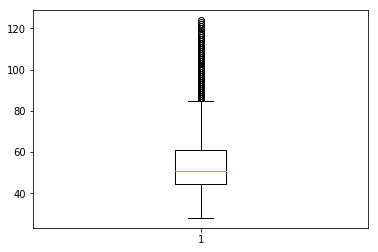

In [71]:
#Check the data distribution of Surface_Temperature_Celcius data (partition) column to determine best partition method

surface_temp_celcius = list(map(lambda x: float(x.replace(",", "")), fireDf['Surface_Temperature_Celcius'].tolist()))

min_temp = min(float(s) for s in surface_temp_celcius)
print("Minimum Surface Temp in celcius: ", min_temp)

max_temp = max(float(s) for s in surface_temp_celcius)
print("Maximum Surface Temp in celcius: ", max_temp)

mean_temp = sum(surface_temp_celcius)/len(surface_temp_celcius)
print("Mean Surface Temp in celcius: ", mean_temp)

surface_temp_celcius.sort()
median_temp = np.median(surface_temp_celcius)
print("Median Surface Temp in celcius: ", median_temp)

print("25th and 75th percentiles are: ", np.percentile(surface_temp_celcius,[25, 75]))

plt.boxplot(surface_temp_celcius)
plt.show()

**Analysis:** Max-Min range is high, and 50% of data lies between 45 and 61 and many outliers over 85. Hence a range partition on surface temperature (celcius) would lead to very unequal distribution of data over partitions. Thus Hash partition is more suitable to distribute data evenly over n processors. 

Convert partition column (Surface Temperature Celcius) to integer and date to timestamp.
Then recreate the fire dataset as a multidimensional array.

In [72]:
#Convert Partition column Surface_Temperature_Celcius from String to Integer for searching purposes.
fireDf['Surface_Temperature_Celcius'] = fireDf['Surface_Temperature_Celcius'].map(lambda x: int(x))

#converting date to timestamp format for partitioning and range comparison
fireDf['Date'] = pd.to_datetime(fireDf['Date']) 

#Create a multidimensional array (list) from the fire data
fireHeadings = list(fireDf)
fireData = fireDf.values.tolist()


## Task 1. Parallel Search

### Q1) Search Climate data for records on **15 Dec 2017**

Create Range Partitioning function

In [74]:
# Range data partitionining function (Need to modify as instructed above)
def range_partition(data, range_indices, partition_column):
    """
    Perform range data partitioning on data based on the join attribute

    Arguments:
    data -- an input dataset which is a list
    range_indices -- the index list of ranges to be split

    Return:
    result -- the partitioned subsets of D
    """
    
    result = []
    
  
    # First, we sort the dataset according their values  
    new_data = list(data)
    new_data = sorted(new_data, key=lambda new_data: new_data[partition_column])
    #new_data.sort() #--- This should be modified
    
    # Calculate the number of bins
    n_bin = len(range_indices) 

    # For each bin, perform the following
    for i in range(n_bin): 
        # Find elements to be belonging to each range
        s = [x for x in new_data if x[partition_column] < range_indices[i]] 
        # Add the partitioned list to the result
        result.append(s) 
        # Find the last element in the previous partition
        last_element = s[len(s)-1]
        # Find the index of of the last element
        last = new_data.index(last_element)
        # Remove the partitioned list from the dataset
        new_data = new_data[int(last)+1:] 

    # Append the last remaining data list
    result.append([x for x in new_data if x[partition_column] >= range_indices[n_bin-1]]) 

    return result


Create Binary Search function

In [75]:
# Binary search function
def binary_search(data, key, element):
    """
    Perform binary search on data for the given key

    Arguments:
    data -- an input dataset which is a list
    key -- an query record

    Return:
    result -- the position of searched record
    """
    
    matched_record = None
    position = -1 # not found position
    
    lower = 0
    middle = 0
    upper = len(data)-1
    
     
    while (lower <= upper):
        # calculate middle: the half of lower and upper
        middle = int((lower + upper)/2) 
        
        if (key == data[middle][element]):
            # if we find the matched one
            position = middle
            matched_record = data[middle]
            break
        elif (key > data[middle][element]):
            # reduce to the top half of the list
            lower = middle + 1
        else:
            # reduce to the bottom half of the list
            upper = middle - 1

    print("Process ID: %d", os.getpid()) #prints the parallel process id       

    return position, matched_record #returns the result consisting of position and matched record

Create Parallel Searching function 

In [76]:
# Parallel searching algorithm for exact match
def parallel_search_exact(data, query, query_element, n_processor, partition_column, range_indices):
    """
    Perform parallel search for exact match on data for the given key

    Arguments:
    data -- an input dataset which is a list
    query -- a query record
    n_processor -- the number of parallel processors
    m_partition -- a data partitioning method
    m_search -- a search method
    
    Return:
    results -- the matched record information
    """

    results = []

    # Pool: a Python method enabling parallel processing. 
    # We need to set the number of processes to n_processor, 
    # which means that the Pool class will only allow 'n_processor' processes 
    # running at the same time.
    pool = mp.Pool(processes=n_processor)

    print("data partitioning: Range Partition")
    print("searching method: Binary Search")

    
    # Perform data partitioning:
    # 2nd parameter is a list of maximum range dates (3 ranges)
    DD = range_partition(data, range_indices, partition_column)

        #Find the partition containing the query
        #for i in range(range_indices[0], range_indices[1]): #for each monthly partition 1..12
    for i in range(len(range_indices)): 
            if  query < range_indices[i]: #partition found, as month in query key matches the partition number/month
                m = DD[i] #set the data partition to be searched 
                m.sort(key=lambda x: x[query_element]) #sort the records within the partition by date for binary search 
                break
            else:
                m = DD[-1] #partition not found so assign the data to the last partition, month 12 (Dec)
                m.sort(key=lambda x: x[query_element]) #sort the records within the partition by date in order to binary search

    #execute the query on the partition. Only one processor required on selected partition.             
    result = pool.apply(binary_search, [m, query, query_element]) #run binary search against the matched partition 
                                                                  #to search the query against the element in each m record.
    results.append(result[1]) #Add the matched record only to Results, hence result[1], as result[0] contains the position.
    
    #return the query results
    return results

Execute the Exact Match Query

In [77]:
query = pd.to_datetime('2017-12-15') #the date key that is being queried (exact match)
query_element = 1 #Date is 2nd element of a climateData record (first element being 0)
n_processor = 3 #number of processors. Only 1 processor will be executed in this case.
partition_column = 1 #partitioned by Date (2nd element of a climateData record)
range_indices = [pd.to_datetime('2017-05-01'), pd.to_datetime('2017-09-01')]

#Run the Parallel exact match search with Range Partition and Binary Search
results = parallel_search_exact(climateData, query, query_element, n_processor, partition_column, range_indices)

#Print the Query Result
print(results)

Process ID: %d 3946
data partitioning: Range Partition
searching method: Binary Search
[['948702', Timestamp('2017-12-15 00:00:00'), '18', '52', '7.1', '14', ' 0.00I']]


**Justification for Data Partitioning method, Search method and Parallel Query method selection**

Given the query key is an exact match date, it is more efficient to partition the data by date range, so that only 1 partition gets searched and 1 processor activated. This limits the amount of data being searched, and optimises use of resource, so better performance. Hence Range partitioning was used to partition the data by month, with the ranges being Months 1-12 (Jan-Dec). Month was appropriate partition attribute since it created an almost equal data distribution for each partition (1-12). Although some months will have 1-2 more records, and some months may have 1-2 less, due to some 2016 and 2018 records present in the dataset.

Once the Partitions are chosen, Binary search is the best search method, since the data within a partition can be ordered by date. Hence Binary search was used.

An exact match parallel search algorithm was chosen because the query is based on an exact date, hence an exact match query was appropriate. 

Since 1 processor is only required to be activated (Range Partitioning, Exact Match query), parallel processing was not required as it was optimal to use just the processor containing the data using the parallel_search_exact function. Thus the pool_apply method was used.

### Q2) Search Fire data for Lat, Long, Surface Temp and Confidence when Surface Temperature between 65 and 100 degrees. 

Define a Hash function 

In [35]:
# Define a simple hash function.
def s_hash(x, n):
    """
    Define a simple hash function for demonstration

    Arguments:
    x -- an input record
    n -- the number of processors

    Return:
    result -- the hash value of x
    """
        
    result = x%n 
    
    return result

Create Hash Partition function

In [36]:
# Hash data partitionining function. 
# We will use the "s_hash" function defined above to realise this partitioning
def h_partition(data, n):
    """
    Perform hash data partitioning on data

    Arguments:
    data -- an input dataset which is a list
    n -- the number of processors

    Return:
    result -- the partitioned subsets of D
    """
    i = 0   
    dic = {} # We will use a dictionary
    for x in data: # For each data record, perform the following
        h = s_hash(int(x[7]), n) # Get the hash key of the input
        if (h in dic.keys()): # If the key exists
            s = dic[h]
            s.add(i)
            dic[h] = s # Add the new input to the value set of the key
            i += 1
        else: # If the key does not exist
            s = set() # Create an empty value set
            s.update({i})
            dic[h] = s # Add the value set to the key
            i += 1
   
    return dic

Create Parallel Search Range function 

**Note:** Uses Binary Search function from Question 1

In [37]:
def parallel_search_range(data, query_range, query_element, n_processor, m_search):
    """
    Perform parallel search for range selection on data for the given key

    Arguments:
    data -- the input dataset which is a list
    query_range -- a query record in the form of a range (e.g. [30, 50])
    n_processor -- the number of parallel processors
    
    Return:
    results -- the matched record information
    """
    
    results = []
    resultCollection = []
    
    pool = mp.Pool(processes=n_processor)
 
    print("searching method:" + str(m_search.__name__))
    
    # Perform data partitioning first
    DD = h_partition(data, n_processor) 

    start = time.time() #used to measure total time 
    print("**main program process ID: ",os.getpid(), '\n')

    for query in range(query_range[0], query_range[1], 1):
        # Each element in DD has a pair (hash key: records)
        query_hash = s_hash(query, n_processor)
        indexes = list(DD[query_hash])
        d = [data[i] for i in indexes] 
        if m_search == binary_search:
            d.sort(key=lambda x: x[query_element]) #sort the records within the partition by surface_temperature_celcius 
                                                   #for binary search
        result = pool.apply_async(m_search, [d, query, query_element]) #spawn result thread which 
                                                                       #will execute parallel search  
        results.append(result) #temporarily store the result object for later get. 
        
    end = time.time() #used to measure total time

    #Fetch the search results from each non-blocking thread
    for result in results:
        finalResult = result.get() #get the result
        #print("Process Id: %d", finalResult[2]) #print the parallel Process Id for each search
        
        #Add the matched record to the resultCollection with only the required fields (Lat, Long, Confidence, Surface_Temp_Celcius) 
        resultCollection.append({", ".join([finalResult[1][0], finalResult[1][1], finalResult[1][5], str(finalResult[1][7])])})
        

    print('Time taken: ', end - start)  
                       
    return resultCollection

Execute the Range query

In [38]:
query_range = [65, 100] #the surface_temperature_celcius key that is being queried in a range
query_element = 7 #surface_temperature_celcius is 7nd element of a fireData record (first element being 0)
n_processor = 3 #number of hash partitions.

#Run the Parallel exact match search with Range Partition and Binary Search
results = parallel_search_range(fireData, query_range, query_element, n_processor, binary_search)

#Print the Query Result
print(results)

Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3795
Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3795
Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3795
Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3793
Process ID: %d 3795
Process ID: %d 3794
Process ID: %d 3793
Process ID: %d 3795
Process ID: %d 3794
searching method:binary_search
**main program process ID:  3717 

Process ID: %d 3794
Process ID: %d 3793
Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3795
Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3795
Process ID: %d 3794
Process ID: %d 3793
Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3795
Process ID: %d 3793
Process ID: %d 3794
Process ID: %d 3795
Process ID: %d 3794
Process ID: %d 3793
Time taken:  0.029634952545166016
[{'-35.7642, 143.3321, 89, 65'}, {'-35.8071, 142.7318, 89, 66'}, {'-36.3435, 141.5513, 90, 67'}, {'-36.5568, 144.0538, 90, 68'}, {'-36.3153, 140.9789, 91, 69'}, {'-37.2082, 147.4368, 92, 70'}, {'-36.1

**Justification for Data Partitioning method, Search method and Parallel Query method selection**

From the earlier exploratory data analysis, given the data is not evenly distributed(ie. 50% of data lies between 45 and 61), Hash partitioning is more suitable over range partitioning, in order to distribute data evenly over n processors. 

The search method chosen was binary search, because once the surface temperature is hashed to find the partition, records can be easily sorted by surface temperature, and it is 60 times faster to search each key within the range (10 iterations compared to over 600 with linear). So the time taken to sort is compensated by minimising the search time which will reduce overall exeecution time over large query ranges. 

A parallel search range algorithm was chosen because given that hash partitioning is used with a continuous range query, all partitions/processors will be required to be activated. Hence 3 processes were spawned in parallel for the binary search on each key (one for each processor). This reduced execution time to milliseconds, where the query range was large and a search needs to be executed per query.  

## Task 2. Parallel Join

### Q1) Find Surface Temperature (c), Air Temperature (c), Relative Humidity, Maximum Wind Speed 

**Note:** Range Partition function reused from Task 1 Q1)

Create Sort-Merge Join function

In [45]:
def SM_join(T1, T2, T1_partition_column, T2_partition_column):
    """
    Perform the sort-merge join algorithm.
    The join attribute is the numeric attribute in the input tables T1 & T2

    Arguments:
    T1 & T2 -- Tables to be joined

    Return:
    result -- the joined table
    """
    result = []
    
    # sort T1 based on the join attribute
    s_T1 = list(T1)
    s_T1 = sorted(s_T1, key=lambda s_T1: s_T1[T1_partition_column])
    
    # sort T2 based on the join attribute
    s_T2 = list(T2)
    s_T2 = sorted(s_T2, key=lambda s_T2: s_T2[T2_partition_column])
   
    ### START CODE HERE ### 
    i = j = 0
    while True:
        r = s_T1[i][T1_partition_column]
        s = s_T2[j][T2_partition_column]
        
        # If join attribute s_T1(i) < join attribute s_T2(i)
        if r < s:
            i += 1
        
        # else 
        else:
            # if join attribute s_T1(1) > join attribute s_T2(1)
            if r > s:
                j += 1   

            
            # else 
            else:
                # put records s_T1(i) and s_T2(j) into the result and j++
                result.append({", ".join([str(s_T2[j][7]), s_T1[i][2], s_T1[i][3], s_T1[i][5]])})
                j += 1
                
        # if either s_T1(i) or s_T2(j) is EOF Then break
        if (i == len(s_T1)) or (j == len(s_T2)):
                break

    print("Process ID: %d", os.getpid()) #prints the parallel process id                        
                
    return result

Create Disjoint Partition Based Parallel Join Function

In [46]:
# Include this package for parallel processing
import multiprocessing as mp

def DPBP_join(T1, T2, n_processor, T1_partition_column, T2_partition_column, range_indices):
    """
    Perform a disjoint partitioning-based parallel join algorithm.
    The join attribute is the numeric attribute in the input tables T1 & T2

    Arguments:
    T1 & T2 -- Tables to be joined
    n_processor -- the number of parallel processors

    Return:
    result -- the joined table
    """
    
    results = []
    resultCollection = []
   
    # Partition T1 & T2 into sub-tables using range_partition() function from Q1).
    T1_subsets = range_partition(T1, range_indices, T1_partition_column) 
    T2_subsets = range_partition(T2, range_indices, T2_partition_column)
    
    # The number of the sub-tables must be the equal to the n_processor
    
    # Apply local join for each processor
    # Pool: a Python method enabling parallel processing. 
    pool = mp.Pool(processes = n_processor)
    processor = 0 #initialise processor number in order to loop through all processors 

    start = time.time() #used to measure total time 
    print("**main program process ID: ",os.getpid(), '\n')    
   
    for processor in range(n_processor): #for each processor

        # Select the table partitions on the processor
        t1 = T1_subsets[processor]
        t2 = T2_subsets[processor]
 
        # join the table partitions on the processor using a self-join algorithm
        result = pool.apply_async(SM_join, [t1, t2, T1_partition_column, T2_partition_column])
        results.append(result) #add join result of this processor to the overall result
        processor += 1 #next processor

    end = time.time() #used to measure total time

    #Fetch the search results from each non-blocking thread
    for result in results:
        finalResult = result.get() #get the result
        
        #Add the matched record to the resultCollection 
        resultCollection.append(finalResult)

    print('Time taken: ', end - start)
        
    return resultCollection

Execute the join query

In [47]:
n_processor = 3
T1_partition_column = 1
T2_partition_column = 6
range_indices = [pd.to_datetime('2017-05-01'), pd.to_datetime('2017-09-01')]

result = DPBP_join(climateData, fireData, n_processor, T1_partition_column, T2_partition_column, range_indices)
result

Process ID: %d 3907
Process ID: %d 3905
Process ID: %d 3906
**main program process ID:  3717 

Time taken:  0.0004105567932128906


[[{'62, 20, 52.9, 21'},
  {'59, 20, 52.9, 21'},
  {'64, 19, 51.5, 20'},
  {'55, 21, 51.7, 13'},
  {'48, 21, 51.7, 13'},
  {'41, 23, 53.4, 11.1'},
  {'44, 23, 53.4, 11.1'},
  {'55, 23, 53.4, 11.1'},
  {'105, 19, 60.2, 12'},
  {'109, 19, 60.2, 12'},
  {'73, 19, 60.2, 12'},
  {'80, 19, 60.2, 12'},
  {'55, 19, 60.2, 12'},
  {'42, 19, 60.2, 12'},
  {'43, 19, 60.2, 12'},
  {'48, 19, 60.2, 12'},
  {'105, 21, 58.1, 11.1'},
  {'71, 21, 58.1, 11.1'},
  {'99, 21, 58.1, 11.1'},
  {'68, 21, 58.1, 11.1'},
  {'98, 21, 58.1, 11.1'},
  {'42, 20, 62.2, 15'},
  {'35, 20, 62.2, 15'},
  {'67, 25, 58.3, 13'},
  {'72, 25, 58.3, 13'},
  {'68, 25, 58.3, 13'},
  {'48, 25, 58.3, 13'},
  {'75, 25, 58.3, 13'},
  {'65, 25, 58.3, 13'},
  {'52, 25, 58.3, 13'},
  {'55, 25, 58.3, 13'},
  {'79, 25, 58.3, 13'},
  {'75, 25, 58.3, 13'},
  {'50, 28, 58.4, 18.1'},
  {'48, 28, 58.4, 18.1'},
  {'43, 28, 58.4, 18.1'},
  {'43, 28, 58.4, 18.1'},
  {'44, 28, 58.4, 18.1'},
  {'49, 28, 58.4, 18.1'},
  {'45, 28, 58.4, 18.1'},
  {'56,

**Justification for Data Partitioning technique, Join technique and Parallel Join technique**

Range partitioning was chosen because even though partitions may not be evenly distributed, both tables can be partitioned the same way, by the date range. Given both tables are ordered by date, it makes it easier to partition as long as both tables are sorted the same way (ascending).  

Sort Merge local join was chosen because both tables are ordered by Date. Since they are ordered differently (Climate Data in ascending order and Fire Data in descending order), Sort Merge join can firstly sort both datasets in the same way (ascending) prior to joining. This join technique is also N(1) + N(2) efficient, which is N times more efficient than Nested Loop join. Furthermore the date partitioning column is not suitable for hashing, only sorting. Hence Sort-Merge join preferred over Hash based join.

Disjoint Partitioning Based Parallel Join was chose to execute the join because it is best suited to unevenly distributed partitions on processors, in comparison to Divide and Broadcast which needs more evenly distributed partitions. It is also best fit when both tables are partitioned using the same range indices like in this case. Joining both table partitions on each processor in parallel resulted in the job completing in milliseconds. 

### Q2) Find Datetime, Air Temperature (c), Surface Temperature (c), Confidence where the Confidence is between 80 and 100 (inclusive) 

**Note:** Assumption is that range is 80-100 inclusive

Create the Round Robin Partition function

In [48]:
# Round-robin data partitionining function
def rr_partition(data, n):
    """
    Perform data partitioning on data

    Arguments:
    data -- an input dataset which is a list
    n -- the number of processors

    Return:
    result -- the paritioned subsets of D
    """
    result = []
    for i in range(n):
        result.append([])
    
    # Calculate the number of the elements to be allocated to each bin
    n_bin = len(data)/n
    
    # For each bin, perform the following
    for index, element in enumerate(data): 
        # Calculate the index of the bin that the current data point will be assigned
        index_bin = (int) (index % n)
        #print(str(index) + ":" + str(element))
        result[index_bin].append(element)
        
    return result

Create the Sort Merge Join function

In [49]:
def SM_join(T1, T2, T1_join_column, T2_join_column, T1_criteria_column, range_indices):
    """
    Perform the sort-merge join algorithm.
    The join attribute is the numeric attribute in the input tables T1 & T2

    Arguments:
    T1 & T2 -- Tables to be joined

    Return:
    result -- the joined table
    """
    result = []
    
    # sort T1 based on the join attribute
    s_T1 = list(T1)
    s_T1 = sorted(s_T1, key=lambda s_T1: s_T1[T1_join_column])
    
    # sort T2 based on the join attribute
    s_T2 = list(T2)
    s_T2 = sorted(s_T2, key=lambda s_T2: s_T2[T2_join_column])
   
    i = j = 0
    while True:
        r = s_T1[i][T1_join_column]
        s = s_T2[j][T2_join_column]
        
        # If join attribute s_T1(i) < join attribute s_T2(i)
        if r < s:
            i += 1
        
        # else 
        else:
            # if join attribute s_T1(1) > join attribute s_T2(1)
            if r > s:
                j += 1   
            
            # else 
            else:
                # put records s_T1(i) and s_T2(j) into the result and i++, j++ only if criteria column 
                #is in between the range indices (inclusive)
                if (int(s_T1[i][T1_criteria_column]) >= range_indices[0]) and (int(s_T1[i][T1_criteria_column]) <= range_indices[1]): 
                    result.append({", ".join([s_T1[i][3], str(s_T2[j][2]), str(s_T1[i][7]), s_T1[i][5]])})
                i += 1

                
        # if either s_T1(i) or s_T2(j) is EOF Then break
        if (i == len(s_T1)) or (j == len(s_T2)):
                break

    print("Process ID: %d", os.getpid()) #prints the parallel process id               

    return result

Create the Divide and Broadcast Parallel Join (with Shared Memory) function

In [50]:
# Include this package for parallel processing
import multiprocessing as mp

def DDP_join(T1, T2, n_processor, T1_join_column, T2_join_column, T1_criteria_column, range_indices):
    """
    Perform a divide and broadcast-based parallel join algorithms.
    The join attribute is the numeric attribute in the input tables T1 & T2

    Arguments:
    T1 & T2 -- Tables to be joined
    n_processor -- the number of parallel processors

    Return:
    result -- the joined table
    """
    
    results = []
    resultCollection = []
    
    # Partition T1 into sub-tables using rr_partition().
    # The number of the sub-tables must be the equal to the n_processor
    T1_subsets = rr_partition(T1, n_processor)
    
    # Pool: a Python method enabling parallel processing. 
    pool = mp.Pool(processes = n_processor)

    start = time.time() #used to measure total time 
    print("**main program process ID: ",os.getpid(), '\n')    
    
    for t1 in T1_subsets:
        # Apply a join on each processor
        
        # Note that as we assume a shared-memory architecture, no replication
        # of the broadcast table (in this case: table T2 (smaller table) occurs.

        #spawn result thread which will execute parallel search
        result = pool.apply_async(SM_join, [t1, T2, T1_join_column, T2_join_column, T1_criteria_column, range_indices]) 
                                                                                                   
        results.append(result) #temporarily store the result object for later get.             
      
    end = time.time() #used to measure total time

    #Fetch the search results from each non-blocking thread
    for result in results:
        finalResult = result.get() #get the result
        
        #Add the matched record to the resultCollection 
        resultCollection.append(finalResult)

    print('Time taken: ', end - start)  
                       
    return resultCollection      
   

Execute the parallel join query 

In [51]:
n_processor = 3
T1_join_column = 6
T2_join_column = 1
T1_criteria_column = 5
range_indices = [80, 100]

result = DDP_join(fireData, climateData, n_processor, T1_join_column, T2_join_column, T1_criteria_column, range_indices)
result

Process ID: %d 3918
Process ID: %d 3917
Process ID: %d 3919
**main program process ID:  3717 

Time taken:  0.00021600723266601562


[[{'2017-03-06T05:06:20, 20, 59, 85'},
  {'2017-03-10T04:48:40, 19, 105, 100'},
  {'2017-03-10T04:45:30, 19, 80, 97'},
  {'2017-03-12T04:28:20, 21, 99, 100'},
  {'2017-03-14T04:20:50, 25, 68, 90'},
  {'2017-03-14T04:16:20, 25, 65, 89'},
  {'2017-03-14T04:14:30, 25, 79, 96'},
  {'2017-03-17T04:45:10, 18, 59, 84'},
  {'2017-03-19T04:39:50, 24, 60, 85'},
  {'2017-03-19T04:32:50, 24, 91, 100'},
  {'2017-03-19T04:32:40, 24, 113, 100'},
  {'2017-03-25T03:59:50, 23, 65, 82'},
  {'2017-03-25T03:57:10, 23, 59, 85'},
  {'2017-03-26T04:43:20, 23, 54, 81'},
  {'2017-03-26T04:39:10, 23, 68, 91'},
  {'2017-03-26T04:39:10, 23, 55, 82'},
  {'2017-03-26T04:39:10, 23, 58, 84'},
  {'2017-03-28T04:33:40, 18, 60, 86'},
  {'2017-03-28T04:30:10, 18, 74, 94'},
  {'2017-03-28T04:30:10, 18, 82, 98'},
  {'2017-03-28T04:27:00, 18, 55, 82'},
  {'2017-03-28T04:26:50, 18, 57, 83'},
  {'2017-03-28T04:26:50, 18, 59, 85'},
  {'2017-03-28T04:26:50, 18, 58, 84'},
  {'2017-03-28T04:26:50, 18, 57, 83'},
  {'2017-03-31T05:0

**Justification for Data Partitioning technique, Join technique and Parallel Join technique**

Round Robin Partitioning was used to give equal distribution to the processors. This avoids load imbalance problem when the Divide & Broadcast Parallel Join Algorithm is used. 

Sort Merge local join was chosen because both tables are ordered by Date. Since they are ordered differently (Climate Data in ascending order and Fire Data in descending order), Sort Merge join can firstly sort both datasets in the same way (ascending) prior to joining. This join technique is also N(1) + N(2) efficient, which is N times more efficient than Nested Loop join. Furthermore a hash based join may risk a memory shortage and thus increase the IO (overflow buffer) when Divide and Broadcast Parallel join is used. Hence Sort-Merge join preferred over Hash based join.

Divide and Broadcast with Shared memory was chosen because only 1 table (fireData) needed to be partitioned across the processors, due to its size. It was also best fit for an equal load balance across processors, such was the case here with Round Robin partitioning. The climateData table was small enough to share (in shared memory) among the processors,  meaning that data transfer and receiving costs, typically associated with broadcasting, were avoided. This along with parallelism of the local Sort-Merge joins meant the job completed in milliseconds and thus a more efficient solution. 

### Task 3 - Sort Fire Data based on Surface Temperature (c) in ascending order 

Create Quicksort function

In [52]:
def qsort(arr): 

    """ 
    Quicksort a list
    
    Arguments:
    arr -- the input list to be sorted

    Return:
    result -- the sorted arr
    """
    if len(arr) <= 1:
        return arr
    else:
        #take the first element as the pivot
        pivot = arr[0]
        left_arr = [x for x in arr[1:] if x < pivot]
        right_arr = [x for x in arr[1:] if x >= pivot]
        # uncomment this to see what to print 
        # print("Left:" + str(left_arr)+" Pivot : "+ str(pivot)+" Right: " + str(right_arr))
        value = qsort(left_arr) + [pivot] + qsort(right_arr)
        
        return value
            